<h1 style="color: ; text-align: center;">☕ Coffee Dataset Analysis</h1>
<p style="font-size: 16px; text-align: center;">An in-depth look at coffee quality ratings and their determinants.</p>

### Objectives
1. Research and gather data on coffee. 

2. Perform data cleaning and preprocessing to ensure high data quality for analysis. 

3. Conduct exploratory data analysis (EDA) to visualize and identify key features influencing coffee quality scores. 

4. Implement clustering algorithms to identify patterns and groups within the data, assessing different coffee characteristics. 

5. Develop predictive models with machine learning techniques (eg. Decision Trees, Naïve Bayes, and Linear Regression etc.) to estimate coffee quality and analyze how these models compare in performance. 

6. Explore neural network architectures (e.g., MLPs) to enhance prediction accuracy, comparing their performance with traditional models. 

### Data Description
**Comprehensive Evaluations:** Scores beans on aroma, flavor, acidity, and more. 

**Data Types:** Merges numerical scores with descriptive notes. 

**Total Cup Points:** Combines scores into a total quality score. 

**Standard Metrics:** Follows established coffee quality standards. 

### Problem Statement
The quality of Arabica coffee significantly impacts consumer preferences and market value, However, understanding the factors that contribute to coffee quality remains a challenge for producers and consumers alike. **This project aims to analyze the relationships between aroma, flavor, acidity, and farming conditions to identify key predictors of coffee quality by employing machine learning techniques for predictive modeling and clustering algorithms.** 

## Methodology

This analysis is structured around several key statistical and machine learning techniques aimed at extracting meaningful insights from the coffee quality dataset. The steps are as follows:

1. **Data Preparation**: Cleaning the data to handle missing values, outliers, and categorical variables. This ensures that the dataset is ready for analysis and modeling.

2. **Exploratory Data Analysis (EDA)**: Employing visual and quantitative methods to understand the distribution of key variables and the relationships between them.

3. **Modeling**: Applying clustering techniques to segment the coffee types based on quality metrics.

4. **Evaluation**: Assessing the models using appropriate metrics to ensure robustness and accuracy.

5. **Visualization**: Using graphs and charts to present the findings in an accessible and understandable form.

7. **Interpretation and Reporting**: Drawing conclusions from our analyses and modeling, discussing the implications of our findings, and suggesting possible actions based on these insights.

Each of these steps utilizes Python libraries such as Pandas for data manipulation, Matplotlib and Seaborn for plotting, Scikit-learn for modeling, and other specialized libraries as necessary.


#### Please Note:
In this analysis, we opted to use 3 clusters to represent the coffee grades, aligning with the majority of the data available in the dataset. While the dataset originally had five distinct coffee grades—Below Grade, Below Specialty Quality (Commercial), Very Good, Excellent, and Outstanding—two of these grades, Below Grade and Outstanding (Presidential), presented significant challenges. Specifically, there were no records in the dataset for the Below Grade category, and only one record for the Outstanding grade. This extreme imbalance made it impractical to include these two categories in the analysis.

To address this imbalance, one option was to perform synthetic sampling or imputation to artificially increase the number of records in these categories. However, this would have introduced a high proportion of synthetic data, undermining the originality and reliability of the dataset. Incorporating synthetic data for these grades would have diluted the integrity of the analysis and skewed the analysis process, as these grades lacked sufficient real-world representation in the data.

Instead, we focused on the three remaining grades—Below Specialty Quality (Commercial), Very Good, and Excellent—where sufficient data was available to support meaningful analysis. By limiting the clustering process to these three grades, we ensured that the analysis remained grounded in the actual data and avoided the risks associated with over-reliance on synthetic records. This approach not only improved the validity of the results but also aligned with the goal of extracting meaningful patterns from the data without compromising its authenticity.

### **Step 1: Load and Inspect the Data**
In this initial step, we load the data from the CSV file into a pandas DataFrame to begin our analysis. We will inspect the first few rows to understand the structure of the data.


In [1]:
# Imports necessary libraries for data manipulation and visualization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Load the coffee quality dataset from a CSV file into a pandas DataFrame
data = pd.read_csv('../data/arabica_data_cleaned.csv')


In [3]:
# Display the first 5 rows of the dataset to inspect the data and understand its structure
data.head()

Unnamed: 0  Species                     Owner Country.of.Origin  \
0           1  Arabica                 metad plc          Ethiopia   
1           2  Arabica                 metad plc          Ethiopia   
2           3  Arabica  grounds for health admin         Guatemala   
3           4  Arabica       yidnekachew dabessa          Ethiopia   
4           5  Arabica                 metad plc          Ethiopia   

                                  Farm.Name Lot.Number       Mill ICO.Number  \
0                                 metad plc        NaN  metad plc  2014/2015   
1                                 metad plc        NaN  metad plc  2014/2015   
2  san marcos barrancas "san cristobal cuch        NaN        NaN        NaN   
3     yidnekachew dabessa coffee plantation        NaN    wolensu        NaN   
4                                 metad plc        NaN  metad plc  2014/2015   

                                 Company       Altitude  ...  Color  \
0      metad agricultural developmet plc      1950-2200  ...  Green   
1      metad agricultural developmet plc      1950-2200  ...  Green   
2                                    NaN  1600 - 1800 m  ...    NaN   
3  yidnekachew debessa coffee plantation      1800-2200  ...  Green   
4      metad agricultural developmet plc      1950-2200  ...  Green   

  Category.Two.Defects        Expiration                  Certification.Body  \
0                    0   April 3rd, 2016  METAD Agricultural Development plc   
1                    1   April 3rd, 2016  METAD Agricultural Development plc   
2                    0    May 31st, 2011        Specialty Coffee Association   
3                    2  March 25th, 2016  METAD Agricultural Development plc   
4                    2   April 3rd, 2016  METAD Agricultural Development plc   

                      Certification.Address  \
0  309fcf77415a3661ae83e027f7e5f05dad786e44   
1  309fcf77415a3661ae83e027f7e5f05dad786e44   
2  36d0d00a3724338ba7937c52a378d085f2172daa   
3  309fcf77415a3661ae83e027f7e5f05dad786e44   
4  309fcf77415a3661ae83e027f7e5f05dad786e44   

                      Certification.Contact unit_of_measurement  \
0  19fef5a731de2db57d16da10287413f5f99bc2dd                   m   
1  19fef5a731de2db57d16da10287413f5f99bc2dd                   m   
2  0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660                   m   
3  19fef5a731de2db57d16da10287413f5f99bc2dd                   m   
4  19fef5a731de2db57d16da10287413f5f99bc2dd                   m   

  altitude_low_meters altitude_high_meters altitude_mean_meters  
0              1950.0               2200.0               2075.0  
1              1950.0               2200.0               2075.0  
2              1600.0               1800.0               1700.0  
3              1800.0               2200.0               2000.0  
4              1950.0               2200.0               2075.0  

[5 rows x 44 columns]

In [4]:
# Display the last 5 rows of the dataset to inspect the data and understand its structure
data.tail()

Unnamed: 0  Species                       Owner Country.of.Origin  \
1306        1307  Arabica    juan carlos garcia lopez            Mexico   
1307        1308  Arabica     myriam kaplan-pasternak             Haiti   
1308        1309  Arabica  exportadora atlantic, s.a.         Nicaragua   
1309        1310  Arabica   juan luis alvarado romero         Guatemala   
1310        1311  Arabica             bismarck castro          Honduras   

             Farm.Name                  Lot.Number  \
1306     el centenario                         NaN   
1307         200 farms                         NaN   
1308  finca las marías  017-053-0211/ 017-053-0212   
1309    finca el limon                         NaN   
1310      los hicaques                         103   

                                                   Mill  \
1306  la esperanza, municipio juchique de ferrer, ve...   
1307        coeb koperativ ekselsyo basen (350 members)   
1308                         beneficio atlantic condega   
1309                                   beneficio serben   
1310                                 cigrah s.a de c.v.   

                      ICO.Number                   Company Altitude  ...  \
1306                  1104328663                 terra mia      900  ...   
1307                         NaN              haiti coffee    ~350m  ...   
1308  017-053-0211/ 017-053-0212  exportadora atlantic s.a     1100  ...   
1309                  11/853/165                   unicafe     4650  ...   
1310                  13-111-053         cigrah s.a de c.v     1400  ...   

           Color Category.Two.Defects            Expiration  \
1306         NaN                   20  September 17th, 2013   
1307  Blue-Green                   16        May 24th, 2013   
1308       Green                    5        June 6th, 2018   
1309       Green                    4        May 24th, 2013   
1310       Green                    2      April 28th, 2018   

                Certification.Body                     Certification.Address  \
1306                       AMECAFE  59e396ad6e22a1c22b248f958e1da2bd8af85272   
1307  Specialty Coffee Association  36d0d00a3724338ba7937c52a378d085f2172daa   
1308  Instituto Hondureño del Café  b4660a57e9f8cc613ae5b8f02bfce8634c763ab4   
1309  Asociacion Nacional Del Café  b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53   
1310  Instituto Hondureño del Café  b4660a57e9f8cc613ae5b8f02bfce8634c763ab4   

                         Certification.Contact unit_of_measurement  \
1306  0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7                   m   
1307  0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660                   m   
1308  7f521ca403540f81ec99daec7da19c2788393880                   m   
1309  724f04ad10ed31dbb9d260f0dfd221ba48be8a95                  ft   
1310  7f521ca403540f81ec99daec7da19c2788393880                   m   

     altitude_low_meters altitude_high_meters altitude_mean_meters  
1306              900.00               900.00               900.00  
1307              350.00               350.00               350.00  
1308             1100.00              1100.00              1100.00  
1309             1417.32              1417.32              1417.32  
1310             1400.00              1400.00              1400.00  

[5 rows x 44 columns]

In [5]:
# Output the concise summary of the DataFrame, including the types of columns, and non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311 entries, 0 to 1310
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1311 non-null   int64  
 1   Species                1311 non-null   object 
 2   Owner                  1304 non-null   object 
 3   Country.of.Origin      1310 non-null   object 
 4   Farm.Name              955 non-null    object 
 5   Lot.Number             270 non-null    object 
 6   Mill                   1001 non-null   object 
 7   ICO.Number             1163 non-null   object 
 8   Company                1102 non-null   object 
 9   Altitude               1088 non-null   object 
 10  Region                 1254 non-null   object 
 11  Producer               1081 non-null   object 
 12  Number.of.Bags         1311 non-null   int64  
 13  Bag.Weight             1311 non-null   object 
 14  In.Country.Partner     1311 non-null   object 
 15  Harv

In [6]:
# Generate descriptive statistics summarizing the central tendency, dispersion, and shape of the dataset's numerical features
data.describe()

Unnamed: 0  Number.of.Bags        Aroma       Flavor   Aftertaste  \
count  1311.000000     1311.000000  1311.000000  1311.000000  1311.000000   
mean    656.000000      153.887872     7.563806     7.518070     7.397696   
std     378.597412      129.733734     0.378666     0.399979     0.405119   
min       1.000000        0.000000     0.000000     0.000000     0.000000   
25%     328.500000       14.500000     7.420000     7.330000     7.250000   
50%     656.000000      175.000000     7.580000     7.580000     7.420000   
75%     983.500000      275.000000     7.750000     7.750000     7.580000   
max    1311.000000     1062.000000     8.750000     8.830000     8.670000   

           Acidity         Body      Balance   Uniformity   Clean.Cup  \
count  1311.000000  1311.000000  1311.000000  1311.000000  1311.00000   
mean      7.533112     7.517727     7.517506     9.833394     9.83312   
std       0.381599     0.359213     0.406316     0.559343     0.77135   
min       0.000000     0.000000     0.000000     0.000000     0.00000   
25%       7.330000     7.330000     7.330000    10.000000    10.00000   
50%       7.500000     7.500000     7.500000    10.000000    10.00000   
75%       7.750000     7.670000     7.750000    10.000000    10.00000   
max       8.750000     8.580000     8.750000    10.000000    10.00000   

         Sweetness  Cupper.Points  Total.Cup.Points     Moisture  \
count  1311.000000    1311.000000       1311.000000  1311.000000   
mean      9.903272       7.497864         82.115927     0.088863   
std       0.530832       0.474610          3.515761     0.047957   
min       0.000000       0.000000          0.000000     0.000000   
25%      10.000000       7.250000         81.170000     0.090000   
50%      10.000000       7.500000         82.500000     0.110000   
75%      10.000000       7.750000         83.670000     0.120000   
max      10.000000      10.000000         90.580000     0.280000   

       Category.One.Defects      Quakers  Category.Two.Defects  \
count           1311.000000  1310.000000           1311.000000   
mean               0.426392     0.177099              3.591915   
std                1.832415     0.840583              5.350371   
min                0.000000     0.000000              0.000000   
25%                0.000000     0.000000              0.000000   
50%                0.000000     0.000000              2.000000   
75%                0.000000     0.000000              4.000000   
max               31.000000    11.000000             55.000000   

       altitude_low_meters  altitude_high_meters  altitude_mean_meters  
count          1084.000000           1084.000000           1084.000000  
mean           1759.548954           1808.843803           1784.196379  
std            8767.847252           8767.187498           8767.016913  
min               1.000000              1.000000              1.000000  
25%            1100.000000           1100.000000           1100.000000  
50%            1310.640000           1350.000000           1310.640000  
75%            1600.000000           1650.000000           1600.000000  
max          190164.000000         190164.000000         190164.000000

In [7]:
# Print the column names of the DataFrame to review all available features
data.columns

Index(['Unnamed: 0', 'Species', 'Owner', 'Country.of.Origin', 'Farm.Name',
       'Lot.Number', 'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region',
       'Producer', 'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner',
       'Harvest.Year', 'Grading.Date', 'Owner.1', 'Variety',
       'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
       'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Quakers',
       'Color', 'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

### **Step 2: Data Cleaning (R2)** 
In this step, we focus on removing unnecessary columns, handling missing values, and cleaning data for further analysis.

#### **A. Remove Unnecessary Columns**

In [8]:
# List of columns considered unnecessary for the analysis and drop them to simplify the dataset
columns_to_drop = [
    'Unnamed: 0', 'Owner','Farm.Name','Lot.Number', 'Mill', 'ICO.Number', 'Company','Altitude','Region','Producer','Number.of.Bags','Bag.Weight','In.Country.Partner','Harvest.Year','Grading.Date','Owner.1','Color','Expiration','Certification.Body',
       'Certification.Address', 'Certification.Contact',]

data.drop(columns=columns_to_drop, axis=1, inplace=True)

#### **B. Clean Column Names**

In [9]:
# Update column names: convert to lowercase, replace dots and spaces with underscores for consistency and ease of access
data.columns = data.columns.str.lower().str.replace('.', '_').str.replace(' ', '_')
data.columns

Index(['species', 'country_of_origin', 'variety', 'processing_method', 'aroma',
       'flavor', 'aftertaste', 'acidity', 'body', 'balance', 'uniformity',
       'clean_cup', 'sweetness', 'cupper_points', 'total_cup_points',
       'moisture', 'category_one_defects', 'quakers', 'category_two_defects',
       'unit_of_measurement', 'altitude_low_meters', 'altitude_high_meters',
       'altitude_mean_meters'],
      dtype='object')

#### **C.  Correct inconsistent entries**

In [10]:
# Correct specific country names in the 'country_of_origin' column
data['country_of_origin'] = data['country_of_origin'].replace({
    'Cote d?Ivoire': "Cote d'Ivoire",
    'Tanzania, United Republic Of': 'Tanzania'
})

#### **D. Handling Missing Values**

In [11]:
print(data.isnull().sum())

species                   0
country_of_origin         1
variety                 201
processing_method       152
aroma                     0
flavor                    0
aftertaste                0
acidity                   0
body                      0
balance                   0
uniformity                0
clean_cup                 0
sweetness                 0
cupper_points             0
total_cup_points          0
moisture                  0
category_one_defects      0
quakers                   1
category_two_defects      0
unit_of_measurement       0
altitude_low_meters     227
altitude_high_meters    227
altitude_mean_meters    227
dtype: int64


##### Remove rows with missing 'country_of_origin'

In [12]:
# Remove rows where 'country_of_origin' is missing to ensure data integrity
data = data.dropna(subset=['country_of_origin'])

##### Identify and remove rows with excessive missing data

In [13]:
# Calculate the number of missing values per row
max_missing = data.isnull().sum(axis=1).max()
records_with_max_missing = data[data.isnull().sum(axis=1) == max_missing]
# Display these rows
records_with_max_missing

species       country_of_origin variety processing_method  aroma  \
17    Arabica                Ethiopia     NaN               NaN   8.17   
26    Arabica                Ethiopia     NaN               NaN   7.83   
30    Arabica               Nicaragua     NaN               NaN   7.92   
37    Arabica  United States (Hawaii)     NaN               NaN   8.25   
38    Arabica                Ethiopia     NaN               NaN   7.92   
...       ...                     ...     ...               ...    ...   
1138  Arabica  United States (Hawaii)     NaN               NaN   7.50   
1214  Arabica               Nicaragua     NaN               NaN   7.08   
1220  Arabica  United States (Hawaii)     NaN               NaN   7.92   
1242  Arabica                Colombia     NaN               NaN   7.42   
1292  Arabica                  Brazil     NaN               NaN   7.25   

      flavor  aftertaste  acidity  body  balance  ...  cupper_points  \
17      8.33        8.25     8.33  8.42     8.33  ...           8.83   
26      8.25        8.08     8.17  8.17     8.17  ...           8.25   
30      8.25        8.00     8.33  8.00     8.08  ...           8.00   
37      8.42        8.08     7.75  7.67     7.83  ...           8.25   
38      7.75        8.08     8.08  8.08     8.17  ...           8.17   
...      ...         ...      ...   ...      ...  ...            ...   
1138    7.42        7.58     7.42  7.50     7.58  ...           7.58   
1214    7.00        6.75     6.83  7.08     6.92  ...           6.92   
1220    6.83        7.08     7.42  6.75     7.33  ...           7.25   
1242    7.17        7.00     7.17  7.67     7.17  ...           7.08   
1292    6.58        6.58     7.00  7.00     6.42  ...           6.67   

      total_cup_points  moisture  category_one_defects  quakers  \
17               87.33      0.05                     0      0.0   
26               86.92      0.05                     0      0.0   
30               86.58      0.08                     0      0.0   
37               86.25      0.00                     2      0.0   
38               86.25      0.10                     0      0.0   
...                ...       ...                   ...      ...   
1138             79.92      0.05                     3      0.0   
1214             78.58      0.10                     1      5.0   
1220             78.58      0.00                     0      0.0   
1242             78.00      0.10                     1      0.0   
1292             73.50      0.11                     0      1.0   

      category_two_defects  unit_of_measurement  altitude_low_meters  \
17                       2                    m                  NaN   
26                       2                    m                  NaN   
30                       2                    m                  NaN   
37                       1                   ft                  NaN   
38                       2                    m                  NaN   
...                    ...                  ...                  ...   
1138                     0                   ft                  NaN   
1214                     7                    m                  NaN   
1220                     0                   ft                  NaN   
1242                     3                    m                  NaN   
1292                     0                    m                  NaN   

      altitude_high_meters altitude_mean_meters  
17                     NaN                  NaN  
26                     NaN                  NaN  
30                     NaN                  NaN  
37                     NaN                  NaN  
38                     NaN                  NaN  
...                    ...                  ...  
1138                   NaN                  NaN  
1214                   NaN                  NaN  
1220                   NaN                  NaN  
1242                   NaN                  NaN  
1292                   NaN      

In [14]:
# Drop rows with maximum missing values
data = data.drop(records_with_max_missing.index)
#No more missing values for country of origin
print(data.isnull().sum())

species                   0
country_of_origin         0
variety                 137
processing_method        88
aroma                     0
flavor                    0
aftertaste                0
acidity                   0
body                      0
balance                   0
uniformity                0
clean_cup                 0
sweetness                 0
cupper_points             0
total_cup_points          0
moisture                  0
category_one_defects      0
quakers                   1
category_two_defects      0
unit_of_measurement       0
altitude_low_meters     163
altitude_high_meters    163
altitude_mean_meters    163
dtype: int64


#####  Impute missing values in 'quakers'

In [15]:
#Next we deal with null values for 'Quakers'
data[data['quakers'].isnull()]


species country_of_origin  variety processing_method  aroma  flavor  \
366  Arabica          Colombia  Caturra      Washed / Wet   7.58    7.67   

     aftertaste  acidity  body  balance  ...  cupper_points  total_cup_points  \
366        7.58     7.75  7.58     7.75  ...           7.58              83.5   

     moisture  category_one_defects  quakers  category_two_defects  \
366      0.11                     0      NaN                     2   

     unit_of_measurement  altitude_low_meters  altitude_high_meters  \
366                    m               1750.0                1750.0   

    altitude_mean_meters  
366               1750.0  

[1 rows x 23 columns]

In [16]:
# Calculate the median number of 'Quakers' specifically for Colombia to use for filling missing values in this subset.
colombia_quakers_median = data[data['country_of_origin'] == 'Colombia']['quakers'].median()

In [17]:
# Fill missing 'Quakers' values for Colombian entries with the calculated median, ensuring data consistency within this group.
data.loc[(data['country_of_origin'] == 'Colombia') & (data['quakers'].isnull()), 'quakers'] = colombia_quakers_median


In [18]:
instance_366 = data.iloc[366]
instance_366

species                      Arabica
country_of_origin           Colombia
variety                      Caturra
processing_method       Washed / Wet
aroma                            7.5
flavor                          7.75
aftertaste                      7.58
acidity                          7.5
body                            7.67
balance                         7.75
uniformity                      10.0
clean_cup                       10.0
sweetness                       10.0
cupper_points                   7.67
total_cup_points               83.42
moisture                        0.11
category_one_defects               0
quakers                          0.0
category_two_defects               2
unit_of_measurement                m
altitude_low_meters           1450.0
altitude_high_meters          1450.0
altitude_mean_meters          1450.0
Name: 391, dtype: object

##### Impute missing values in 'processing_method'

In [19]:
print(data.isnull().sum())

species                   0
country_of_origin         0
variety                 137
processing_method        88
aroma                     0
flavor                    0
aftertaste                0
acidity                   0
body                      0
balance                   0
uniformity                0
clean_cup                 0
sweetness                 0
cupper_points             0
total_cup_points          0
moisture                  0
category_one_defects      0
quakers                   0
category_two_defects      0
unit_of_measurement       0
altitude_low_meters     163
altitude_high_meters    163
altitude_mean_meters    163
dtype: int64


In [20]:
# We define a function to calculate the mode
def mode(series):
    # Return the mode of the series, the mode method returns a Series, so get the first element
    return series.mode()[0] if not series.mode().empty else None


In [21]:
# Group by 'Country.of.Origin' and aggregate using the custom mode function
country_aggregates = data.groupby('country_of_origin').agg({
    'processing_method': mode  # Apply the custom mode function
})
print(country_aggregates)


                                  processing_method
country_of_origin                                  
Brazil                                Natural / Dry
Burundi                                Washed / Wet
China                                  Washed / Wet
Colombia                               Washed / Wet
Costa Rica                             Washed / Wet
Cote d'Ivoire                          Washed / Wet
Ecuador                               Natural / Dry
El Salvador                            Washed / Wet
Ethiopia                              Natural / Dry
Guatemala                              Washed / Wet
Haiti                                  Washed / Wet
Honduras                               Washed / Wet
India                                 Natural / Dry
Indonesia                              Washed / Wet
Japan                        Pulped natural / honey
Kenya                                  Washed / Wet
Laos                                   Washed / Wet
Malawi      

In [22]:
# Identify entries with missing 'Processing.Method'
missing_processing = data[data['processing_method'].isnull()]
print("Entries with missing 'processing_method':")
missing_processing

Entries with missing 'processing_method':


species       country_of_origin  variety processing_method  aroma  \
2     Arabica               Guatemala  Bourbon               NaN   8.42   
7     Arabica                Ethiopia      NaN               NaN   8.25   
8     Arabica                Ethiopia      NaN               NaN   8.67   
13    Arabica  United States (Hawaii)      NaN               NaN   8.33   
14    Arabica                Ethiopia      NaN               NaN   8.25   
...       ...                     ...      ...               ...    ...   
1191  Arabica                  Mexico   Typica               NaN   6.75   
1246  Arabica               Nicaragua      NaN               NaN   7.42   
1261  Arabica                  Mexico   Typica               NaN   6.67   
1297  Arabica                   Haiti      NaN               NaN   6.92   
1310  Arabica                Honduras  Caturra               NaN   0.00   

      flavor  aftertaste  acidity  body  balance  ...  cupper_points  \
2       8.50        8.42     8.42  8.33     8.42  ...           9.25   
7       8.33        8.50     8.42  8.33     8.50  ...           9.00   
8       8.67        8.58     8.42  8.33     8.42  ...           8.67   
13      8.42        8.08     8.25  8.25     8.00  ...           8.58   
14      8.33        8.50     8.25  8.58     8.75  ...           8.50   
...      ...         ...      ...   ...      ...  ...            ...   
1191    6.75        6.83     7.25  7.58     7.08  ...           6.92   
1246    7.00        7.00     7.17  7.08     7.00  ...           7.17   
1261    6.33        6.42     6.83  7.00     6.92  ...           6.58   
1297    6.75        7.08     7.17  7.33     6.67  ...           6.42   
1310    0.00        0.00     0.00  0.00     0.00  ...           0.00   

      total_cup_points  moisture  category_one_defects  quakers  \
2                89.75      0.00                     0      0.0   
7                88.67      0.03                     0      0.0   
8                88.42      0.03                     0      0.0   
13               87.92      0.00                     0      0.0   
14               87.83      0.05                     0      0.0   
...                ...       ...                   ...      ...   
1191             79.17      0.01                     0      0.0   
1246             77.83      0.10                     0      0.0   
1261             76.75      0.00                     0      0.0   
1297             72.33      0.08                     1      0.0   
1310              0.00      0.12                     0      0.0   

      category_two_defects  unit_of_measurement  altitude_low_meters  \
2                        0                    m               1600.0   
7                        0                    m               1570.0   
8                        0                    m               1570.0   
13                       2                   ft                609.6   
14                       2                    m               1570.0   
...                    ...                  ...                  ...   
1191                     8                    m               1200.0   
1246                     0                    m               1000.0   
1261                     0                    m               1200.0   
1297                     0                    m                640.0   
1310                     2                    m               1400.0   

      altitude_high_meters altitude_mean_meters  
2                   1800.0               1700.0  
7                   1700.0               1635.0  
8                   1700.0               1635.0  
13                   609.6                609.6  
14                  1700.0               1635.0  
...                    ...                  ...  
1191                1200.0               1200.0  
1246                1000.0               1000.0  
1261                1200.0               1200.0  
1297                1400.0               1020.0  
1310                

In [23]:
# Map the modes from the aggregate table to the main DataFrame and fill missing 'Processing.Method' values
data['processing_method'] = data['processing_method'].fillna(
    data['country_of_origin'].map(country_aggregates['processing_method'])
)

In [24]:
# Calculate the number of missing values in the 'Processing Method' column after imputation
missing_count = data['processing_method'].isnull().sum()
print(f"Number of missing values in 'processing_method' after imputation: {missing_count}")
data[data['processing_method'].isnull()]

Number of missing values in 'processing_method' after imputation: 1


species country_of_origin variety processing_method  aroma  flavor  \
1071  Arabica         Mauritius     NaN              None   7.25    7.25   

      aftertaste  acidity  body  balance  ...  cupper_points  \
1071        7.17     7.17  7.25     7.17  ...           7.25   

      total_cup_points  moisture  category_one_defects  quakers  \
1071              80.5      0.12                     0      0.0   

      category_two_defects  unit_of_measurement  altitude_low_meters  \
1071                     0                    m                280.0   

      altitude_high_meters altitude_mean_meters  
1071                 280.0                280.0  

[1 rows x 23 columns]

In [25]:
# Directly fill missing 'processing_method' with "Other"
data['processing_method'] = data['processing_method'].fillna('Other')

# Verify the entries now to ensure no missing values in 'processing_method'
print("Entries with missing 'processing_method' after fill:")
print(data[data['processing_method'].isnull()])

Entries with missing 'processing_method' after fill:
Empty DataFrame
Columns: [species, country_of_origin, variety, processing_method, aroma, flavor, aftertaste, acidity, body, balance, uniformity, clean_cup, sweetness, cupper_points, total_cup_points, moisture, category_one_defects, quakers, category_two_defects, unit_of_measurement, altitude_low_meters, altitude_high_meters, altitude_mean_meters]
Index: []

[0 rows x 23 columns]


##### Impute missing values in 'variety'

In [26]:
# Next we deal with 'Variety'
# Group by 'Country.of.Origin' and aggregate using the custom mode function
country_aggregates2 = data.groupby('country_of_origin').agg({
    'variety': mode  # Apply the custom mode function
})
print(country_aggregates2)


                                   variety
country_of_origin                         
Brazil                             Bourbon
Burundi                            Bourbon
China                              Catimor
Colombia                           Caturra
Costa Rica                         Caturra
Cote d'Ivoire                         None
Ecuador                               None
El Salvador                        Bourbon
Ethiopia                             Other
Guatemala                          Bourbon
Haiti                               Typica
Honduras                           Caturra
India                                 None
Indonesia                            Other
Japan                           Mundo Novo
Kenya                                 SL28
Laos                               Catimor
Malawi                               Gesha
Mauritius                             None
Mexico                              Typica
Myanmar                             Catuai
Nicaragua  

In [27]:
# Identify entries with missing 'variety'
null_variety_val=data[data['variety'].isnull()]
print("Entries with missing 'variety':")
null_variety_val

Entries with missing 'variety':


species country_of_origin variety processing_method  aroma  flavor  \
0     Arabica          Ethiopia     NaN      Washed / Wet   8.67    8.83   
3     Arabica          Ethiopia     NaN     Natural / Dry   8.17    8.58   
5     Arabica            Brazil     NaN     Natural / Dry   8.58    8.42   
7     Arabica          Ethiopia     NaN     Natural / Dry   8.25    8.33   
8     Arabica          Ethiopia     NaN     Natural / Dry   8.67    8.67   
...       ...               ...     ...               ...    ...     ...   
1272  Arabica       Philippines     NaN      Washed / Wet   6.83    6.50   
1273  Arabica            Brazil     NaN     Natural / Dry   7.17    7.00   
1295  Arabica          Colombia     NaN     Natural / Dry   8.00    7.33   
1297  Arabica             Haiti     NaN      Washed / Wet   6.92    6.75   
1302  Arabica            Brazil     NaN     Natural / Dry   7.00    7.00   

      aftertaste  acidity  body  balance  ...  cupper_points  \
0           8.67     8.75  8.50     8.42  ...           8.75   
3           8.42     8.42  8.50     8.25  ...           8.67   
5           8.42     8.50  8.25     8.33  ...           8.33   
7           8.50     8.42  8.33     8.50  ...           9.00   
8           8.58     8.42  8.33     8.42  ...           8.67   
...          ...      ...   ...      ...  ...            ...   
1272        6.50     6.92  6.75     7.00  ...           6.67   
1273        6.83     7.50  7.17     7.00  ...           7.00   
1295        7.75     7.33  7.42     7.67  ...           7.33   
1297        7.08     7.17  7.33     6.67  ...           6.42   
1302        6.83     7.00  7.33     6.83  ...           6.67   

      total_cup_points  moisture  category_one_defects  quakers  \
0                90.58      0.12                     0      0.0   
3                89.00      0.11                     0      0.0   
5                88.83      0.11                     0      0.0   
7                88.67      0.03                     0      0.0   
8                88.42      0.03                     0      0.0   
...                ...       ...                   ...      ...   
1272             75.83      0.12                     0      0.0   
1273             75.67      0.11                     0      1.0   
1295             72.83      0.00                     0      0.0   
1297             72.33      0.08                     1      0.0   
1302             70.67      0.11                     0      1.0   

      category_two_defects  unit_of_measurement  altitude_low_meters  \
0                        0                    m               1950.0   
3                        2                    m               1800.0   
5                        1                    m                  NaN   
7                        0                    m               1570.0   
8                        0                    m               1570.0   
...                    ...                  ...                  ...   
1272                     2                    m               1000.0   
1273                     6                    m                  NaN   
1295                    15                    m                  NaN   
1297                     0                    m                640.0   
1302                    55                    m                  NaN   

      altitude_high_meters altitude_mean_meters  
0                   2200.0               2075.0  
3                   2200.0               2000.0  
5                      NaN                  NaN  
7                   1700.0               1635.0  
8                   1700.0               1635.0  
...                    ...                  ...  
1272                1000.0               1000.0  
1273                   NaN                  NaN  
1295                   NaN                  NaN  
1297                1400.0               1020.0  
1302                   NaN                  NaN  

[137 rows x 23 columns]

In [28]:
# Map the modes from the aggregate table to the main DataFrame and fill missing 'Variety' values
data['variety'] = data['variety'].fillna(
    data['country_of_origin'].map(country_aggregates2['variety'])
)

In [29]:
# Calculate the number of missing values in the 'variety' column after imputation
missing_count2 = data['variety'].isnull().sum()
print(f"Number of missing values in 'variety' after imputation: {missing_count2}")
data[data['variety'].isnull()]


Number of missing values in 'variety' after imputation: 5


species country_of_origin variety processing_method  aroma  flavor  \
61    Arabica  Papua New Guinea    None      Washed / Wet   8.33    8.42   
286   Arabica           Ecuador    None     Natural / Dry   7.50    7.67   
1071  Arabica         Mauritius    None             Other   7.25    7.25   
1177  Arabica     Cote d'Ivoire    None      Washed / Wet   7.42    7.25   
1260  Arabica             India    None     Natural / Dry   7.67    7.33   

      aftertaste  acidity  body  balance  ...  cupper_points  \
61          7.83     8.33  8.00     8.25  ...           7.92   
286         7.58     7.75  7.83     7.83  ...           7.67   
1071        7.17     7.17  7.25     7.17  ...           7.25   
1177        6.83     7.00  7.33     7.08  ...           7.08   
1260        7.17     6.67  7.17     7.42  ...           7.42   

      total_cup_points  moisture  category_one_defects  quakers  \
61               85.75      0.12                     0      0.0   
286              83.83      0.09                     0      0.0   
1071             80.50      0.12                     0      0.0   
1177             79.33      0.13                     1      0.0   
1260             76.83      0.00                     0      7.0   

      category_two_defects  unit_of_measurement  altitude_low_meters  \
61                       1                    m               1700.0   
286                      0                    m                800.0   
1071                     0                    m                280.0   
1177                     2                    m                200.0   
1260                     0                    m                  NaN   

      altitude_high_meters altitude_mean_meters  
61                  1700.0               1700.0  
286                  800.0                800.0  
1071                 280.0                280.0  
1177                 200.0                200.0  
1260                   NaN                  NaN  

[5 rows x 23 columns]

In [30]:
# Directly fill missing 'variety' with "Other"
data['variety'] = data['variety'].fillna('Other')

# Verify the entries now to ensure no missing values in 'variety'
print("Entries with missing 'variety' after fill:")
print(data[data['variety'].isnull()])

Entries with missing 'variety' after fill:
Empty DataFrame
Columns: [species, country_of_origin, variety, processing_method, aroma, flavor, aftertaste, acidity, body, balance, uniformity, clean_cup, sweetness, cupper_points, total_cup_points, moisture, category_one_defects, quakers, category_two_defects, unit_of_measurement, altitude_low_meters, altitude_high_meters, altitude_mean_meters]
Index: []

[0 rows x 23 columns]


##### Handle missing values in altitude columns - low, high and mean

In [31]:
print(data.isnull().sum())

species                   0
country_of_origin         0
variety                   0
processing_method         0
aroma                     0
flavor                    0
aftertaste                0
acidity                   0
body                      0
balance                   0
uniformity                0
clean_cup                 0
sweetness                 0
cupper_points             0
total_cup_points          0
moisture                  0
category_one_defects      0
quakers                   0
category_two_defects      0
unit_of_measurement       0
altitude_low_meters     163
altitude_high_meters    163
altitude_mean_meters    163
dtype: int64


In [32]:
print(data.count)

<bound method DataFrame.count of       species country_of_origin  variety processing_method  aroma  flavor  \
0     Arabica          Ethiopia    Other      Washed / Wet   8.67    8.83   
1     Arabica          Ethiopia    Other      Washed / Wet   8.75    8.67   
2     Arabica         Guatemala  Bourbon      Washed / Wet   8.42    8.50   
3     Arabica          Ethiopia    Other     Natural / Dry   8.17    8.58   
4     Arabica          Ethiopia    Other      Washed / Wet   8.25    8.50   
...       ...               ...      ...               ...    ...     ...   
1306  Arabica            Mexico  Bourbon      Washed / Wet   7.08    6.83   
1307  Arabica             Haiti   Typica     Natural / Dry   6.75    6.58   
1308  Arabica         Nicaragua  Caturra             Other   7.25    6.58   
1309  Arabica         Guatemala   Catuai      Washed / Wet   7.50    6.67   
1310  Arabica          Honduras  Caturra      Washed / Wet   0.00    0.00   

      aftertaste  acidity  body  balance  

In [33]:
data[data['altitude_low_meters'].isnull()]

species       country_of_origin        variety processing_method  aroma  \
5     Arabica                  Brazil        Bourbon     Natural / Dry   8.58   
6     Arabica                    Peru          Other      Washed / Wet   8.42   
24    Arabica                Ethiopia          Other     Natural / Dry   8.42   
31    Arabica                Tanzania          Other     Natural / Dry   8.42   
36    Arabica  United States (Hawaii)  Hawaiian Kona     Natural / Dry   8.08   
...       ...                     ...            ...               ...    ...   
1286  Arabica  United States (Hawaii)  Hawaiian Kona     Natural / Dry   7.50   
1291  Arabica  United States (Hawaii)  Hawaiian Kona     Natural / Dry   7.17   
1295  Arabica                Colombia        Caturra     Natural / Dry   8.00   
1296  Arabica  United States (Hawaii)  Hawaiian Kona     Natural / Dry   6.92   
1302  Arabica                  Brazil        Bourbon     Natural / Dry   7.00   

      flavor  aftertaste  acidity  body  balance  ...  cupper_points  \
5       8.42        8.42     8.50  8.25     8.33  ...           8.33   
6       8.50        8.33     8.50  8.25     8.25  ...           8.50   
24      8.17        7.92     8.17  8.33     8.00  ...           8.08   
31      8.17        8.17     8.00  7.58     8.00  ...           8.17   
36      8.17        8.00     7.92  7.92     7.83  ...           8.33   
...      ...         ...      ...   ...      ...  ...            ...   
1286    7.25        7.00     7.25  7.42     7.33  ...           7.33   
1291    7.17        7.17     7.58  7.67     6.92  ...           7.33   
1295    7.33        7.75     7.33  7.42     7.67  ...           7.33   
1296    6.92        6.92     7.50  7.58     7.17  ...           6.92   
1302    7.00        6.83     7.00  7.33     6.83  ...           6.67   

      total_cup_points  moisture  category_one_defects  quakers  \
5                88.83      0.11                     0      0.0   
6                88.75      0.11                     0      0.0   
24               87.08      0.11                     0      0.0   
31               86.50      0.11                     0      0.0   
36               86.25      0.00                     1      0.0   
...                ...       ...                   ...      ...   
1286             74.42      0.00                     1      0.0   
1291             73.67      0.00                     9      0.0   
1295             72.83      0.00                     0      0.0   
1296             72.58      0.11                     5      0.0   
1302             70.67      0.11                     0      1.0   

      category_two_defects  unit_of_measurement  altitude_low_meters  \
5                        1                    m                  NaN   
6                        0                    m                  NaN   
24                       1                    m                  NaN   
31                       1                    m                  NaN   
36                       4                   ft                  NaN   
...                    ...                  ...                  ...   
1286                     2                   ft                  NaN   
1291                    17                   ft                  NaN   
1295                    15                    m                  NaN   
1296                     9                   ft                  NaN   
1302                    55                    m                  NaN   

      altitude_high_meters altitude_mean_meters  
5                      NaN                  NaN  
6                      NaN                  NaN  
24                     NaN                  NaN  
31                     NaN                  NaN  
36                     NaN                  NaN  
...                    ...                  ...  
1286                   NaN                  NaN  
1291                   NaN                  NaN  
1295                   NaN                  NaN 

In [34]:
data[data['altitude_high_meters'].isnull()]

species       country_of_origin        variety processing_method  aroma  \
5     Arabica                  Brazil        Bourbon     Natural / Dry   8.58   
6     Arabica                    Peru          Other      Washed / Wet   8.42   
24    Arabica                Ethiopia          Other     Natural / Dry   8.42   
31    Arabica                Tanzania          Other     Natural / Dry   8.42   
36    Arabica  United States (Hawaii)  Hawaiian Kona     Natural / Dry   8.08   
...       ...                     ...            ...               ...    ...   
1286  Arabica  United States (Hawaii)  Hawaiian Kona     Natural / Dry   7.50   
1291  Arabica  United States (Hawaii)  Hawaiian Kona     Natural / Dry   7.17   
1295  Arabica                Colombia        Caturra     Natural / Dry   8.00   
1296  Arabica  United States (Hawaii)  Hawaiian Kona     Natural / Dry   6.92   
1302  Arabica                  Brazil        Bourbon     Natural / Dry   7.00   

      flavor  aftertaste  acidity  body  balance  ...  cupper_points  \
5       8.42        8.42     8.50  8.25     8.33  ...           8.33   
6       8.50        8.33     8.50  8.25     8.25  ...           8.50   
24      8.17        7.92     8.17  8.33     8.00  ...           8.08   
31      8.17        8.17     8.00  7.58     8.00  ...           8.17   
36      8.17        8.00     7.92  7.92     7.83  ...           8.33   
...      ...         ...      ...   ...      ...  ...            ...   
1286    7.25        7.00     7.25  7.42     7.33  ...           7.33   
1291    7.17        7.17     7.58  7.67     6.92  ...           7.33   
1295    7.33        7.75     7.33  7.42     7.67  ...           7.33   
1296    6.92        6.92     7.50  7.58     7.17  ...           6.92   
1302    7.00        6.83     7.00  7.33     6.83  ...           6.67   

      total_cup_points  moisture  category_one_defects  quakers  \
5                88.83      0.11                     0      0.0   
6                88.75      0.11                     0      0.0   
24               87.08      0.11                     0      0.0   
31               86.50      0.11                     0      0.0   
36               86.25      0.00                     1      0.0   
...                ...       ...                   ...      ...   
1286             74.42      0.00                     1      0.0   
1291             73.67      0.00                     9      0.0   
1295             72.83      0.00                     0      0.0   
1296             72.58      0.11                     5      0.0   
1302             70.67      0.11                     0      1.0   

      category_two_defects  unit_of_measurement  altitude_low_meters  \
5                        1                    m                  NaN   
6                        0                    m                  NaN   
24                       1                    m                  NaN   
31                       1                    m                  NaN   
36                       4                   ft                  NaN   
...                    ...                  ...                  ...   
1286                     2                   ft                  NaN   
1291                    17                   ft                  NaN   
1295                    15                    m                  NaN   
1296                     9                   ft                  NaN   
1302                    55                    m                  NaN   

      altitude_high_meters altitude_mean_meters  
5                      NaN                  NaN  
6                      NaN                  NaN  
24                     NaN                  NaN  
31                     NaN                  NaN  
36                     NaN                  NaN  
...                    ...                  ...  
1286                   NaN                  NaN  
1291                   NaN                  NaN  
1295                   NaN                  NaN 

In [35]:
data[data['altitude_mean_meters'].isnull()]

species       country_of_origin        variety processing_method  aroma  \
5     Arabica                  Brazil        Bourbon     Natural / Dry   8.58   
6     Arabica                    Peru          Other      Washed / Wet   8.42   
24    Arabica                Ethiopia          Other     Natural / Dry   8.42   
31    Arabica                Tanzania          Other     Natural / Dry   8.42   
36    Arabica  United States (Hawaii)  Hawaiian Kona     Natural / Dry   8.08   
...       ...                     ...            ...               ...    ...   
1286  Arabica  United States (Hawaii)  Hawaiian Kona     Natural / Dry   7.50   
1291  Arabica  United States (Hawaii)  Hawaiian Kona     Natural / Dry   7.17   
1295  Arabica                Colombia        Caturra     Natural / Dry   8.00   
1296  Arabica  United States (Hawaii)  Hawaiian Kona     Natural / Dry   6.92   
1302  Arabica                  Brazil        Bourbon     Natural / Dry   7.00   

      flavor  aftertaste  acidity  body  balance  ...  cupper_points  \
5       8.42        8.42     8.50  8.25     8.33  ...           8.33   
6       8.50        8.33     8.50  8.25     8.25  ...           8.50   
24      8.17        7.92     8.17  8.33     8.00  ...           8.08   
31      8.17        8.17     8.00  7.58     8.00  ...           8.17   
36      8.17        8.00     7.92  7.92     7.83  ...           8.33   
...      ...         ...      ...   ...      ...  ...            ...   
1286    7.25        7.00     7.25  7.42     7.33  ...           7.33   
1291    7.17        7.17     7.58  7.67     6.92  ...           7.33   
1295    7.33        7.75     7.33  7.42     7.67  ...           7.33   
1296    6.92        6.92     7.50  7.58     7.17  ...           6.92   
1302    7.00        6.83     7.00  7.33     6.83  ...           6.67   

      total_cup_points  moisture  category_one_defects  quakers  \
5                88.83      0.11                     0      0.0   
6                88.75      0.11                     0      0.0   
24               87.08      0.11                     0      0.0   
31               86.50      0.11                     0      0.0   
36               86.25      0.00                     1      0.0   
...                ...       ...                   ...      ...   
1286             74.42      0.00                     1      0.0   
1291             73.67      0.00                     9      0.0   
1295             72.83      0.00                     0      0.0   
1296             72.58      0.11                     5      0.0   
1302             70.67      0.11                     0      1.0   

      category_two_defects  unit_of_measurement  altitude_low_meters  \
5                        1                    m                  NaN   
6                        0                    m                  NaN   
24                       1                    m                  NaN   
31                       1                    m                  NaN   
36                       4                   ft                  NaN   
...                    ...                  ...                  ...   
1286                     2                   ft                  NaN   
1291                    17                   ft                  NaN   
1295                    15                    m                  NaN   
1296                     9                   ft                  NaN   
1302                    55                    m                  NaN   

      altitude_high_meters altitude_mean_meters  
5                      NaN                  NaN  
6                      NaN                  NaN  
24                     NaN                  NaN  
31                     NaN                  NaN  
36                     NaN                  NaN  
...                    ...                  ...  
1286                   NaN                  NaN  
1291                   NaN                  NaN  
1295                   NaN                  NaN 

In [36]:
# Group the data by 'country_of_origin' and calculate the mean of the average altitude using the midpoint of 'altitude_low_meters' and 'altitude_high_meters'
country_mean_altitude = data.groupby('country_of_origin').apply(
    lambda group: ((group['altitude_low_meters'] + group['altitude_high_meters']) / 2).mean()
)
print("Mean Altitude for Each Country:")
print(country_mean_altitude)

# Update 'altitude_mean_meters' column: 
# If a row has a missing value in 'altitude_mean_meters', replace it with the mean altitude for its country
data['altitude_mean_meters'] = data.apply(
    lambda row: country_mean_altitude[row['country_of_origin']]
    if pd.isna(row['altitude_mean_meters']) else row['altitude_mean_meters'], axis=1
)


Mean Altitude for Each Country:
country_of_origin
Brazil                         1016.771429
Burundi                        1790.000000
China                          1463.125000
Colombia                       1585.640000
Costa Rica                     1380.134783
Cote d'Ivoire                   200.000000
Ecuador                         800.000000
El Salvador                    1333.157895
Ethiopia                       1800.300667
Guatemala                      3860.261492
Haiti                           883.360000
Honduras                       1425.411765
India                                  NaN
Indonesia                      1481.944444
Japan                           170.000000
Kenya                          1502.347826
Laos                           1283.333333
Malawi                         1403.545455
Mauritius                       280.000000
Mexico                         1235.362069
Myanmar                        2869.800000
Nicaragua                      7142.361111
Pana

/var/folders/2f/gvbr6px11vl14d_d7t9jmz180000gn/T/ipykernel_59911/146367604.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  country_mean_altitude = data.groupby('country_of_origin').apply(


In [37]:
print(data.count)

<bound method DataFrame.count of       species country_of_origin  variety processing_method  aroma  flavor  \
0     Arabica          Ethiopia    Other      Washed / Wet   8.67    8.83   
1     Arabica          Ethiopia    Other      Washed / Wet   8.75    8.67   
2     Arabica         Guatemala  Bourbon      Washed / Wet   8.42    8.50   
3     Arabica          Ethiopia    Other     Natural / Dry   8.17    8.58   
4     Arabica          Ethiopia    Other      Washed / Wet   8.25    8.50   
...       ...               ...      ...               ...    ...     ...   
1306  Arabica            Mexico  Bourbon      Washed / Wet   7.08    6.83   
1307  Arabica             Haiti   Typica     Natural / Dry   6.75    6.58   
1308  Arabica         Nicaragua  Caturra             Other   7.25    6.58   
1309  Arabica         Guatemala   Catuai      Washed / Wet   7.50    6.67   
1310  Arabica          Honduras  Caturra      Washed / Wet   0.00    0.00   

      aftertaste  acidity  body  balance  

In [38]:
print(data.isnull().sum())

species                   0
country_of_origin         0
variety                   0
processing_method         0
aroma                     0
flavor                    0
aftertaste                0
acidity                   0
body                      0
balance                   0
uniformity                0
clean_cup                 0
sweetness                 0
cupper_points             0
total_cup_points          0
moisture                  0
category_one_defects      0
quakers                   0
category_two_defects      0
unit_of_measurement       0
altitude_low_meters     163
altitude_high_meters    163
altitude_mean_meters      1
dtype: int64


In [39]:
#Drop record with a missing value
data = data.dropna(subset=['altitude_mean_meters'])

In [40]:
# Drop the columns 'altitude_low_meters' and 'altitude_high_meters' since we already have 'altitude_mean_meters'
data = data.drop(columns=['altitude_low_meters', 'altitude_high_meters'])


In [41]:
print(data.isnull().sum())

species                 0
country_of_origin       0
variety                 0
processing_method       0
aroma                   0
flavor                  0
aftertaste              0
acidity                 0
body                    0
balance                 0
uniformity              0
clean_cup               0
sweetness               0
cupper_points           0
total_cup_points        0
moisture                0
category_one_defects    0
quakers                 0
category_two_defects    0
unit_of_measurement     0
altitude_mean_meters    0
dtype: int64


#### **E. Remove Invalid Entries**

In [42]:
#Dropping this record beacuse it has '0' Values 
data = data.drop(index=1310)

#### **F. Classify Coffee into Grades**

We have classified the coffees into five grades based on their total cup points:

| Grade                                    | Total Cup Points Range  | Description                                                         |
|------------------------------------------|-------------------------|---------------------------------------------------------------------|
| **Outstanding**                          | ≥ 90 points         | Exceptional coffees with remarkable quality and flavor characteristics. |
| **Excellent**                            | 85 to 89.99 points  | High-quality coffees with superior taste profiles and distinct attributes. |
| **Very Good**                            | 80 to 84.99 points  | Specialty-grade coffees offering pleasant flavors and free from defects. |
| **Below Specialty Quality (Commercial)** | 50 to 79.99 points  | Commercial-grade coffees with acceptable but unremarkable quality.   |
| **Below Grade**                          | < 50 points         | Coffees with significant defects resulting in poor quality.          |


In [43]:
# Function to calculate the coffee grade based on total_cup_points
def calculate_coffee_grade(points):
    if points >= 90:
        return 'Outstanding'
    elif 85 <= points < 89.99:
        return 'Excellent'
    elif 80 <= points < 84.99:
        return 'Very Good'
    elif 50 <= points < 79.99:
        return 'Below Speciality Quality(Commercial)'
    else:
        return 'Below Grade'

# Applying the function to create a new column 'coffee_grade'
data['coffee_grade'] = data['total_cup_points'].apply(calculate_coffee_grade)

In [44]:
data[['total_cup_points', 'coffee_grade']]

total_cup_points                          coffee_grade
0                90.58                           Outstanding
1                89.92                             Excellent
2                89.75                             Excellent
3                89.00                             Excellent
4                88.83                             Excellent
...                ...                                   ...
1305             69.17  Below Speciality Quality(Commercial)
1306             68.33  Below Speciality Quality(Commercial)
1307             67.92  Below Speciality Quality(Commercial)
1308             63.08  Below Speciality Quality(Commercial)
1309             59.83  Below Speciality Quality(Commercial)

[1245 rows x 2 columns]

In [45]:
# Count the number of records under each coffee_grade
coffee_grade_counts = data['coffee_grade'].value_counts()

# Display the counts
print(coffee_grade_counts)

coffee_grade
Very Good                               976
Below Speciality Quality(Commercial)    173
Excellent                                95
Outstanding                               1
Name: count, dtype: int64


### **Step 3: Visualization & EDA (R2)**
Exploratory Data Analysis (EDA) is a crucial part of data analysis where we statistically and visually examine the dataset to uncover patterns, trends, and insights. This step also helps identify potential anomalies and data quality issues before training any model.
 
This section is divided into the following parts:
 
1.**[Data Overview & Summary Statistics](#a-data-overview--summary-statistics)**: Provides an initial look at the dataset, including data types, missing values, and summary statistics for numerical columns. This helps in understanding the basic structure and descriptive properties of the data.
 
2.**[Distribution of Features](#b-distribution-of-features)**: Examines the distributions of sensory and quality attributes using histograms, boxplots, and bar charts. This visualization highlights data concentration, spread, and potential outliers, providing insights into the dataset's overall characteristics.
 
3.**[Missing Data Visualization](#c-missing-data-visualization)**: Visualizes any missing data within the dataset using a heatmap, allowing for quick identification of incomplete data entries.
 
4.**[Correlation Matrices](#d-correlation-matrices)**: Explores relationships between variables using correlation matrices and heatmaps. This analysis helps to identify strong correlations among sensory attributes and other quality measures, which can be useful for feature selection and understanding data dependencies.
 
Each section includes visualizations and detailed explanations to facilitate a comprehensive understanding of the dataset's structure and attributes.

#### **A. Data Overview & Summary Statistics**

In [46]:
# Check data types and get a summary of the Data
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1245 entries, 0 to 1309
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   species               1245 non-null   object 
 1   country_of_origin     1245 non-null   object 
 2   variety               1245 non-null   object 
 3   processing_method     1245 non-null   object 
 4   aroma                 1245 non-null   float64
 5   flavor                1245 non-null   float64
 6   aftertaste            1245 non-null   float64
 7   acidity               1245 non-null   float64
 8   body                  1245 non-null   float64
 9   balance               1245 non-null   float64
 10  uniformity            1245 non-null   float64
 11  clean_cup             1245 non-null   float64
 12  sweetness             1245 non-null   float64
 13  cupper_points         1245 non-null   float64
 14  total_cup_points      1245 non-null   float64
 15  moisture              1245

In [47]:
# Summary statistics of the dataset
# This will provide a statistical summary of the numerical columns in the DataFrame,
# including count, mean, standard deviation, min, max, and quartiles.
data.describe()

aroma       flavor   aftertaste      acidity         body  \
count  1245.000000  1245.000000  1245.000000  1245.000000  1245.000000   
mean      7.569020     7.519912     7.397486     7.535871     7.520562   
std       0.316504     0.341161     0.347781     0.317405     0.283213   
min       5.080000     6.080000     6.170000     5.250000     6.330000   
25%       7.420000     7.330000     7.250000     7.330000     7.330000   
50%       7.580000     7.500000     7.420000     7.500000     7.500000   
75%       7.750000     7.750000     7.580000     7.750000     7.670000   
max       8.750000     8.830000     8.670000     8.750000     8.580000   

           balance   uniformity    clean_cup    sweetness  cupper_points  \
count  1245.000000  1245.000000  1245.000000  1245.000000    1245.000000   
mean      7.518104     9.847470     9.841430     9.914225       7.489365   
std       0.348808     0.488639     0.735308     0.453454       0.410853   
min       6.080000     6.000000     0.000000     1.330000       5.170000   
25%       7.330000    10.000000    10.000000    10.000000       7.250000   
50%       7.500000    10.000000    10.000000    10.000000       7.500000   
75%       7.750000    10.000000    10.000000    10.000000       7.750000   
max       8.750000    10.000000    10.000000    10.000000      10.000000   

       total_cup_points     moisture  category_one_defects      quakers  \
count       1245.000000  1245.000000           1245.000000  1245.000000   
mean          82.153743     0.090474              0.421687     0.161446   
std            2.695851     0.046200              1.843040     0.781904   
min           59.830000     0.000000              0.000000     0.000000   
25%           81.170000     0.100000              0.000000     0.000000   
50%           82.500000     0.110000              0.000000     0.000000   
75%           83.670000     0.120000              0.000000     0.000000   
max           90.580000     0.200000             31.000000    11.000000   

       category_two_defects  altitude_mean_meters  
count           1245.000000           1245.000000  
mean               3.676305           1761.370002  
std                5.433059           8195.754266  
min                0.000000              1.000000  
25%                0.000000           1094.992080  
50%                2.000000           1310.640000  
75%                5.000000           1600.000000  
max               55.000000         190164.000000

#### **B. Distribution of Features**

##### Initialization

In [48]:
# Set the visualization style for Seaborn to "darkgrid" for a consistent background and grid lines
sns.set_style("darkgrid")

# Define a list of sensory attributes that will be visualized in plots
sensory_attributes = ['aroma', 'flavor', 'acidity', 'aftertaste', 'body', 'cupper_points']

Attributes:
- `sensory_attributes` 
    - `aroma`: The smell of the coffee.
    - `flavor`: The taste of the coffee.
    - `acidity`: The brightness or sharpness of the coffee's taste.
    - `aftertaste`: The lingering taste after swallowing the coffee.
    - `body`: The weight or thickness of the coffee in the mouth.
    - `cupper_points`: The overall score given by a coffee taster.

##### 1. Distribution of Total Cupping Scores

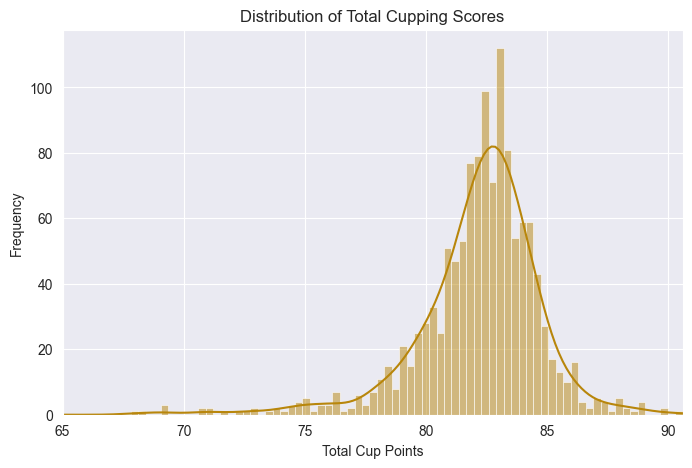

In [49]:
# Set the figure size to 8x5 inches
plt.figure(figsize=(8, 5))

# Plot the histogram of 'total_cup_points' with 100 bins and a dark goldenrod color
# Add a KDE (Kernel Density Estimate) overlay to the histogram
sns.histplot(data['total_cup_points'], kde=True, bins=100, color='darkgoldenrod')

# Set the title of the plot
plt.title('Distribution of Total Cupping Scores')

# Set the x-axis limit from 65 to the maximum value in 'total_cup_points'
plt.xlim(65, max(data['total_cup_points']))

# Label the x-axis as 'Total Cup Points' and the y-axis as 'Frequency'
plt.xlabel('Total Cup Points')
plt.ylabel('Frequency')

# Enable the grid for better readability
plt.grid(True)

# Display the plot
plt.show()

##### 2. Histogram for Sensory Attributes

These histograms show the distributions of various sensory attributes (aroma, flavor, acidity, aftertaste, body, and cupper points) for coffee samples, each with a calculated skewness value. The high negative skewness in each plot indicates that the data is heavily concentrated at the upper end of the scale, suggesting that most coffee samples have high sensory scores across these attributes. Understanding these distributions and skewness helps in assessing the data's quality and potential preprocessing steps.

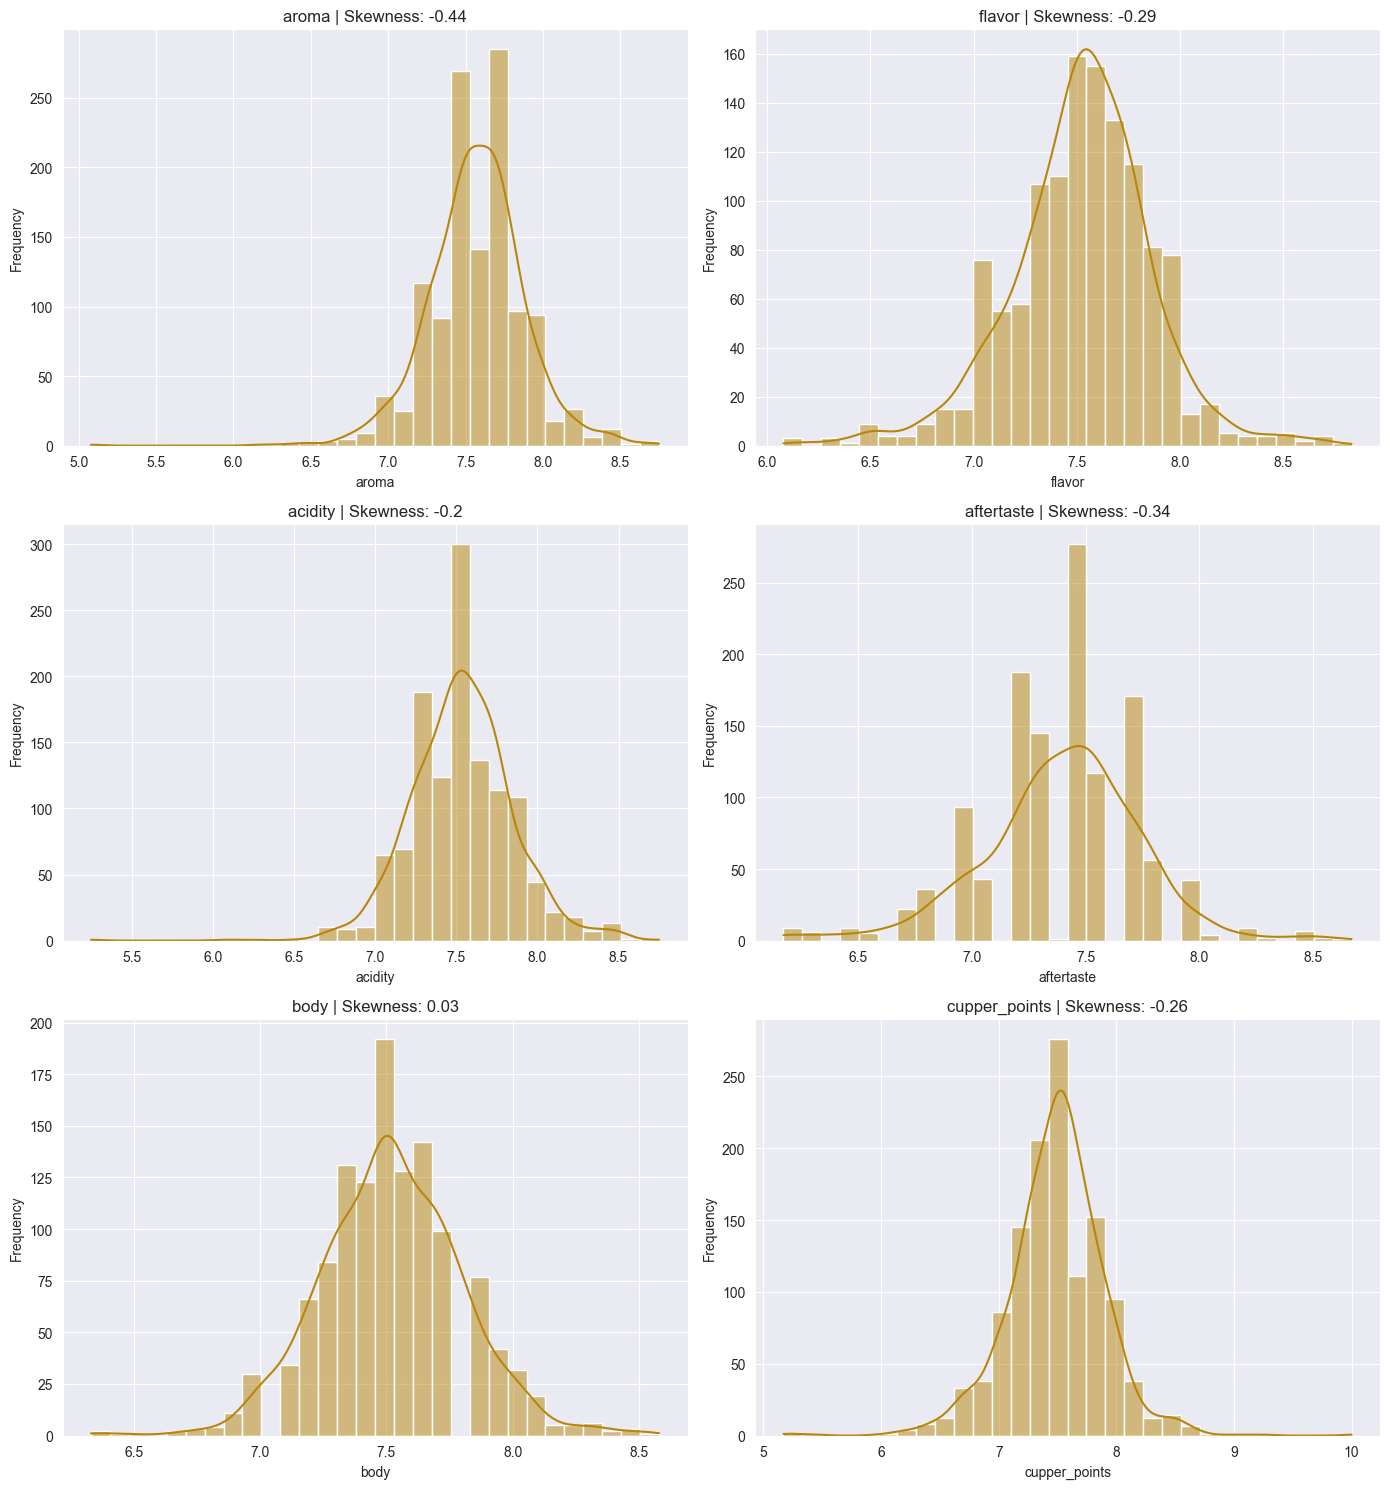

In [50]:
# Set the figure size dynamically based on the number of sensory attributes
plt.figure(figsize=(14, len(sensory_attributes) * 2.5))

# Loop through the sensory attributes and plot histograms
for idx, attribute in enumerate(sensory_attributes, 1):
    # Create a subplot for each attribute
    plt.subplot(len(sensory_attributes) // 2 + len(sensory_attributes) % 3, 2, idx)
    
    # Plot histogram with KDE for the current attribute
    sns.histplot(data[attribute], kde=True, bins=30, color='darkgoldenrod')
    
    # Calculate skewness for the current attribute
    skewness = round(data[attribute].skew(), 2)
    
    # Set the title with the attribute name and its skewness
    plt.title(f"{attribute} | Skewness: {skewness}")
    
    # Label the x-axis with the attribute name
    plt.xlabel(attribute)
    
    # Label the y-axis as 'Frequency'
    plt.ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

##### 3. Distribution of Top Countries of Origin and Processing Methods

These bar charts provide insights into the most common countries of origin and processing methods for coffee samples in the dataset. The "Top 5 Countries of Origin" plot highlights major coffee-producing regions, while the "Frequency of Processing Methods" chart shows popular processing techniques.

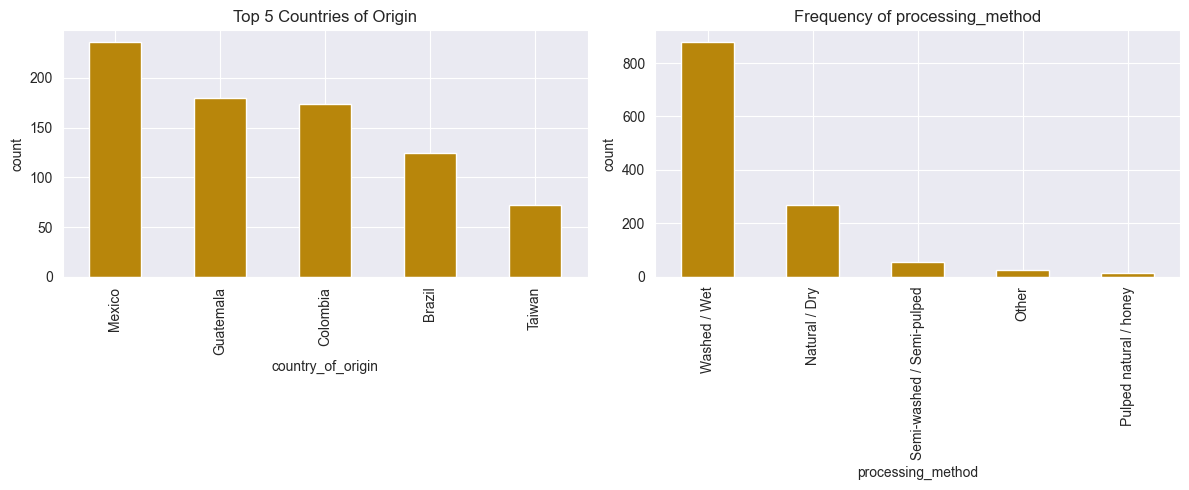

In [51]:
# Define a list of categorical columns to plot
categorical_columns = ['country_of_origin', 'processing_method']

# Set the figure size for the subplots
plt.figure(figsize=(12, 5))

# Loop through each categorical column, creating a bar chart for each
for i, column in enumerate(categorical_columns, 1):
    # Create a subplot for each categorical variable (1 row, 2 columns, current position i)
    plt.subplot(1, 2, i)
    
    # If the column is 'country_of_origin', plot only the top 5 countries
    if column == 'country_of_origin':
        # Get the top 5 countries by count
        top_countries = data['country_of_origin'].value_counts().nlargest(5)
        # Plot a bar chart for the top 5 countries
        top_countries.plot(kind='bar', color='darkgoldenrod')
        # Set the title to indicate the plot is for the top 5 countries
        plt.title('Top 5 Countries of Origin')
    else:
        # For other categorical variables, plot the frequency of each unique value
        data[column].value_counts().plot(kind='bar', color='darkgoldenrod')
        # Set the title to indicate the plot is for the entire column's frequency
        plt.title(f'Frequency of {column}')
    
    # Label the x-axis with the column name
    plt.xlabel(column)
    # Label the y-axis to indicate the count of occurrences
    plt.ylabel('count')

# Adjust layout to prevent overlap between subplots
plt.tight_layout()

# Display the plots
plt.show()


##### 4. Scatterplot of Acidity vs Flavor

The scatter plot illustrates the relationship between "Acidity" and "Flavor" scores in coffee samples, with each point representing an individual sample. Different colors indicate various "Processing Methods," allowing us to observe how processing techniques might affect this relationship.

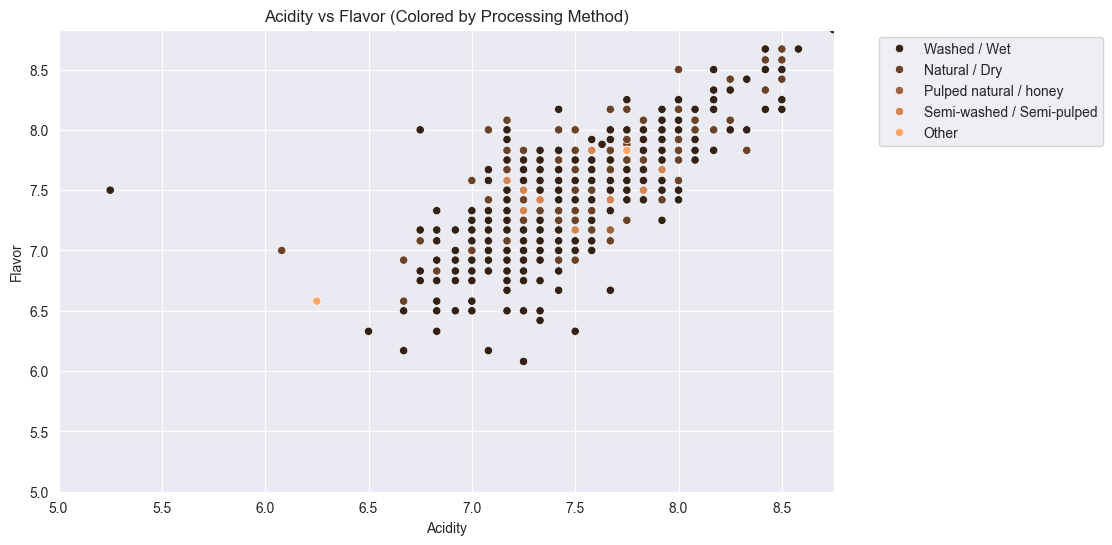

In [52]:
# Set the figure size for the scatterplot
plt.figure(figsize=(10, 6))

# Create a scatterplot of 'Acidity' vs 'Flavor', coloring points by 'Processing Method'
sns.scatterplot(x=data['acidity'], y=data['flavor'], hue=data['processing_method'], palette='copper')

# Set the x-axis limits to start from 5 to hide lower Acidity values (0-4)
plt.xlim(5, data['acidity'].max())

# Set the y-axis limits to start from 5 to hide lower Flavor values (0-4)
plt.ylim(5, data['flavor'].max())

# Set the plot title and label axes
plt.title('Acidity vs Flavor (Colored by Processing Method)')
plt.xlabel('Acidity')
plt.ylabel('Flavor')

# Position the legend outside the plot to the right for better readability
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

# Add a grid for easier interpretation of data points
plt.grid(True)

# Display the plot
plt.show()


##### 5. Flavor Rating by Processing Method

This strip plot shows the distribution of "Flavor" ratings across different coffee "Processing Methods." Each dot represents a coffee sample, with points spread out along the x-axis (jittered) to reduce overlap and show individual values more clearly. The color of the dots corresponds to the processing method, providing a visual grouping of flavor scores by method. This plot allows for a comparison of flavor ratings across methods, revealing potential differences in flavor profiles associated with each processing technique.

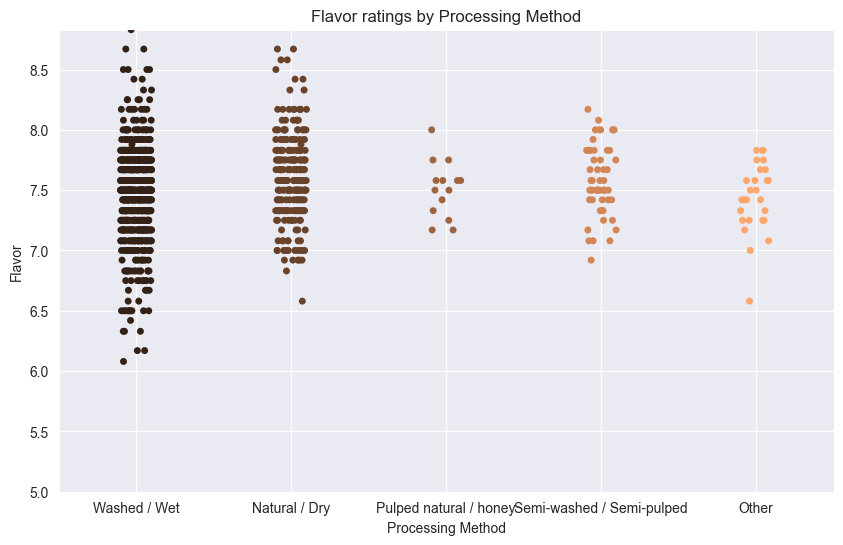

In [53]:
# Set the figure size for the strip plot
plt.figure(figsize=(10, 6))

# Create a strip plot to display 'Flavor' ratings across different 'Processing Methods'
# Each point represents a sample, and 'jitter=True' spreads points along the x-axis to reduce overlap
# Colors represent different processing methods, enhancing visual differentiation
sns.stripplot(x=data['processing_method'], y=data['flavor'], hue=data['processing_method'], jitter=True, palette='copper', legend=False)

# Set the y-axis limits to start from 5 to hide lower Flavor values (0-5), focusing on relevant data
plt.ylim(5, data['flavor'].max())

# Set the plot title and label axes for clarity
plt.title('Flavor ratings by Processing Method')
plt.xlabel('Processing Method')
plt.ylabel('Flavor')

# Add a grid to improve readability and make comparisons easier
plt.grid(True)

# Display the plot
plt.show()

##### 6. Boxplots for Sensory Attributes

These boxplots display the distributions of various sensory attributes (e.g., aroma, flavor, acidity) in the coffee dataset, highlighting their central tendency and spread, as well as potential outliers. Each box represents the interquartile range (IQR) for an attribute, with the line inside the box indicating the median score. Points outside the "whiskers" are potential outliers, which may indicate unusual values or variability in quality scores. This visualization helps identify attributes with significant outliers and provides a quick summary of the distribution of each sensory attribute.

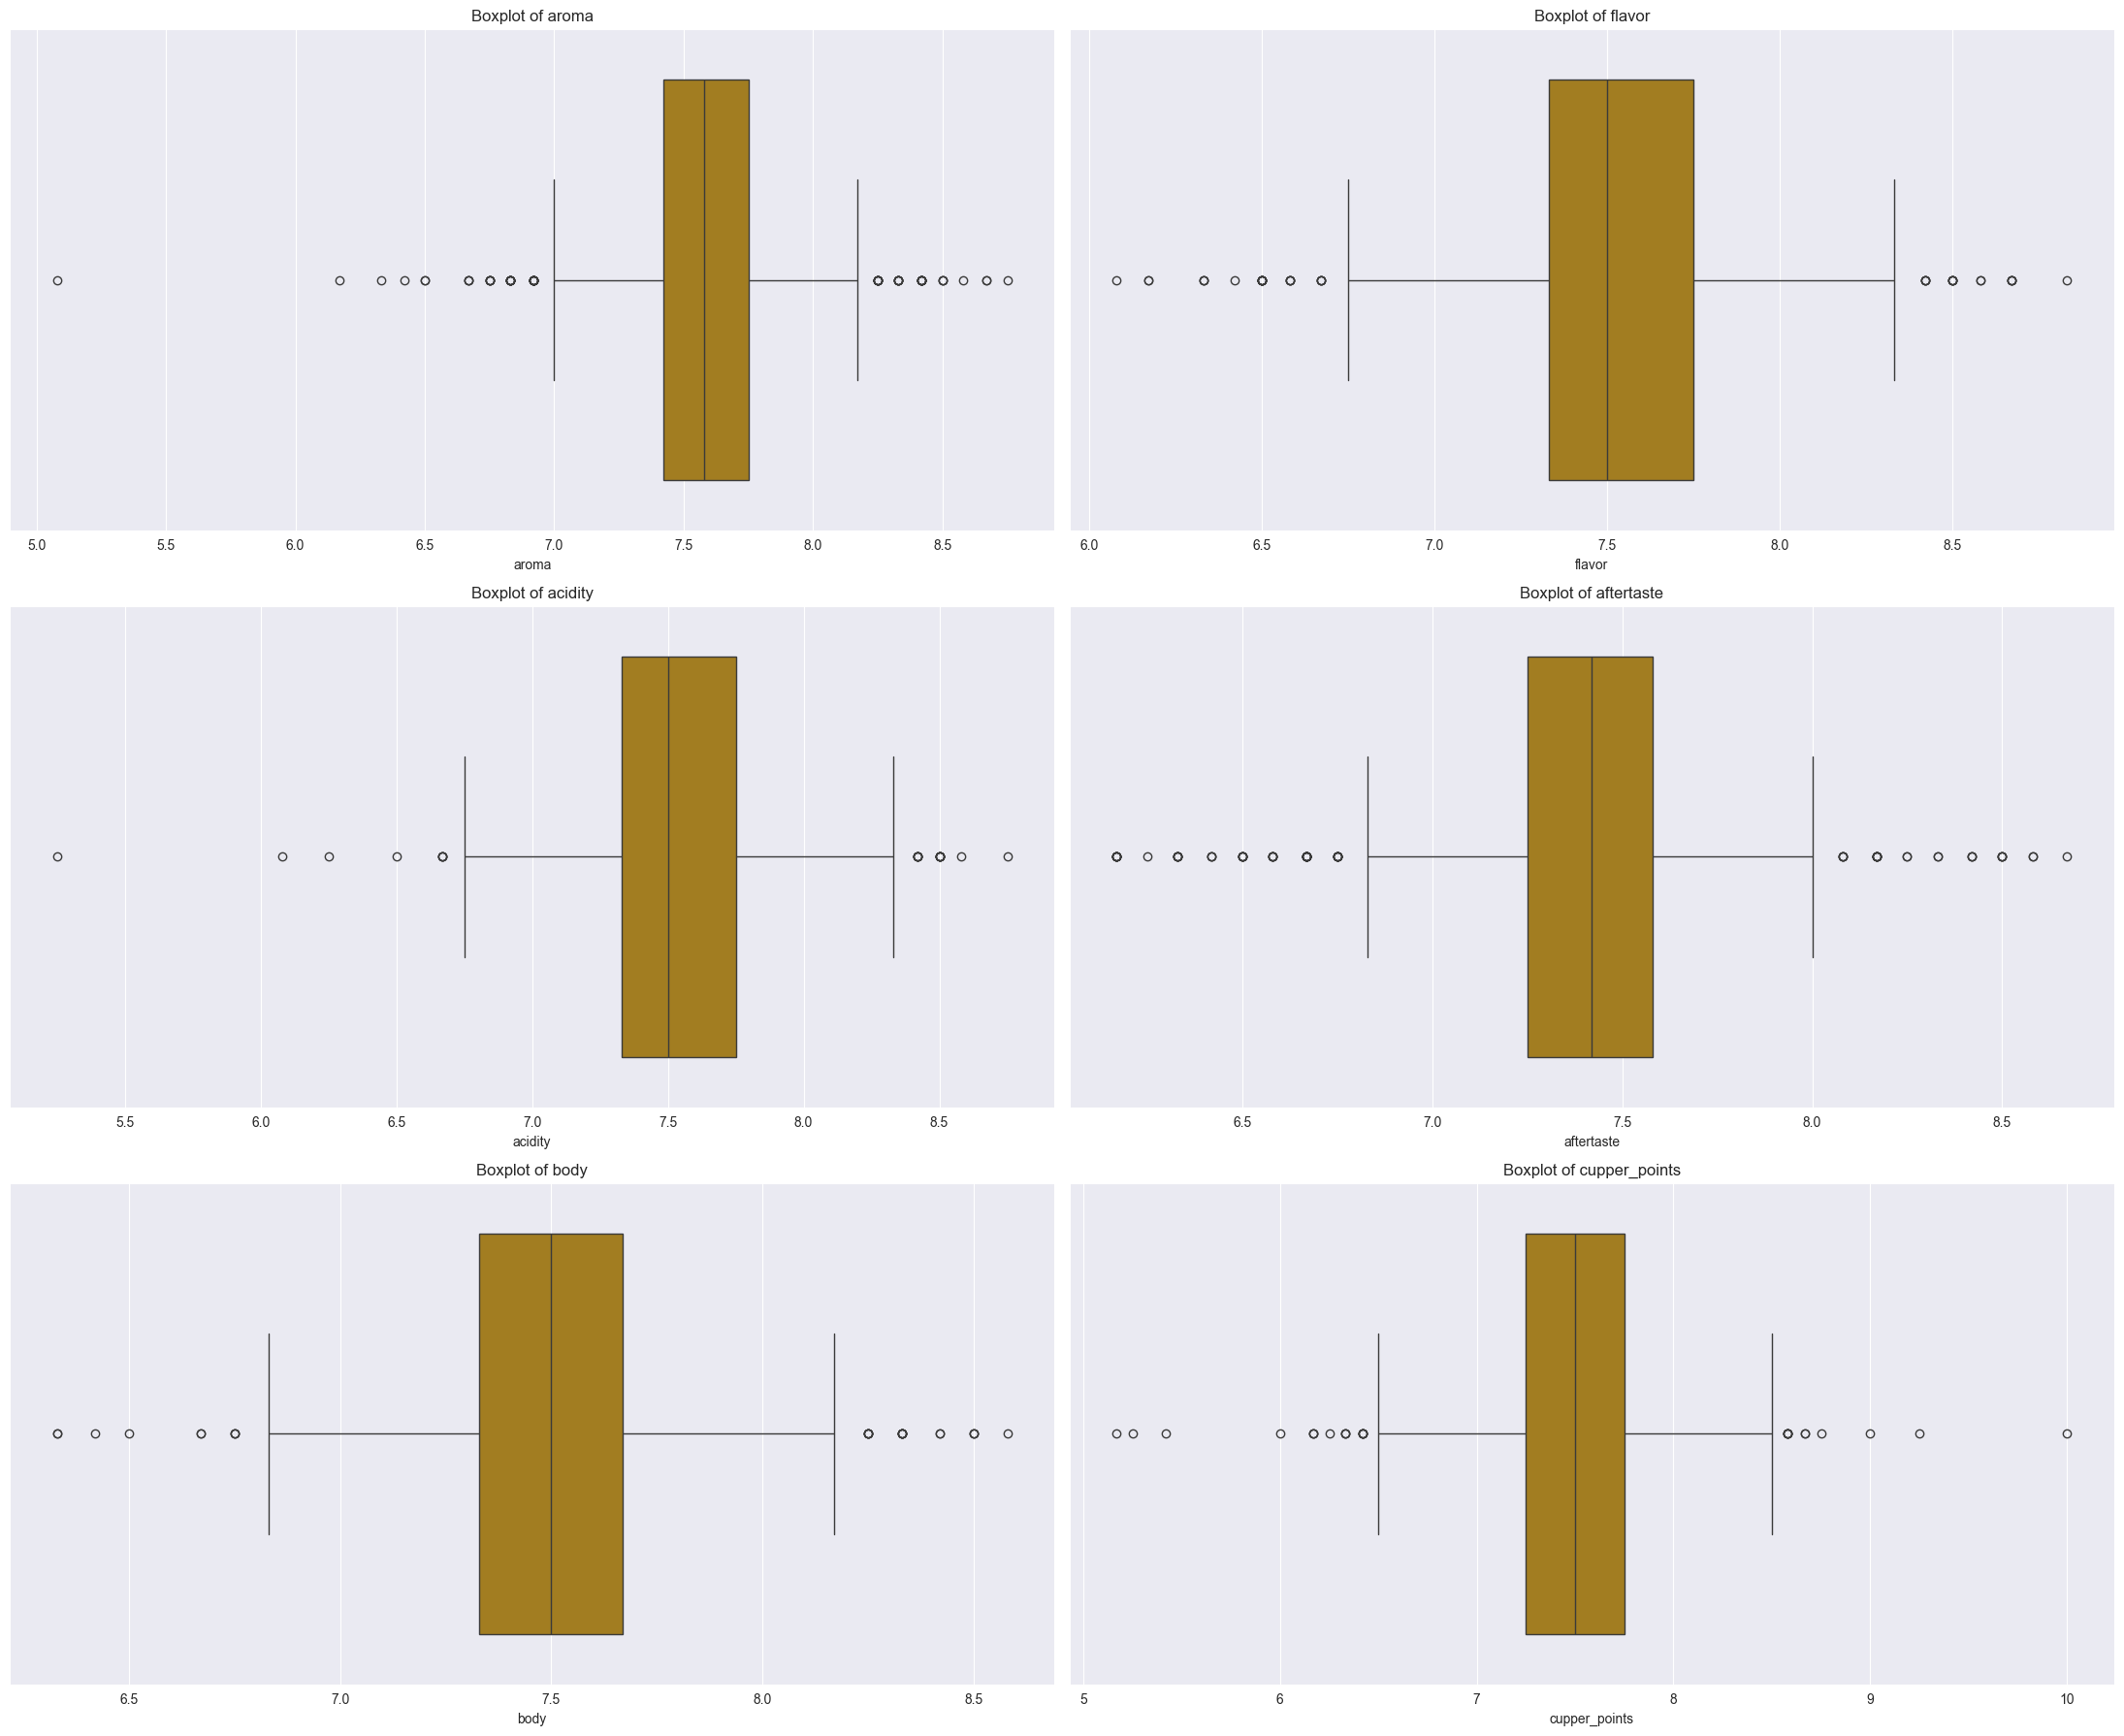

In [54]:
# Set the figure size to accommodate multiple boxplots in a grid layout
plt.figure(figsize=(22, 18))

# Loop through each sensory attribute to create individual boxplots
for i, attribute in enumerate(sensory_attributes, 1):
    # Create a subplot for each attribute in a 3x2 grid
    plt.subplot(3, 2, i)
    # Generate a boxplot for the current attribute, with a specific color for consistency
    sns.boxplot(x=data[attribute], color='darkgoldenrod')
    # Set the title to indicate the attribute being plotted
    plt.title(f'Boxplot of {attribute}')
    # Label the x-axis with the attribute name
    plt.xlabel(attribute)

# Adjust the layout to prevent overlap between plots and labels
plt.tight_layout()

# Display the plots
plt.show()

##### 7. Total Cup Points by Country

This point plot visualizes the "Total Cup Points" for the top 10 coffee-producing countries in the dataset, representing an average quality score for each country. Each point reflects the mean score for a country, with vertical lines indicating the spread or variability around the mean. This visualization highlights differences in coffee quality among countries, with countries like Ethiopia and the United States (Hawaii) achieving higher average scores. This plot helps identify regions known for high-quality coffee and provides insights into consistency and variability in coffee quality by country.

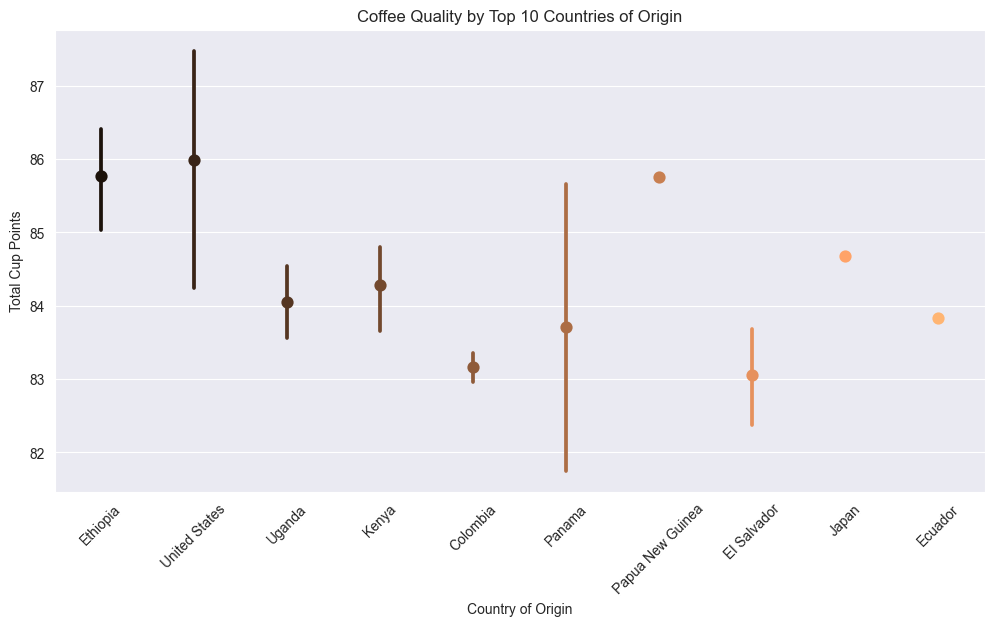

In [55]:
# Calculate the average Total Cup Points by country
top_countries = data.groupby('country_of_origin')['total_cup_points'].mean().nlargest(10).index

# Filter the dataset to include only the top 10 countries
filtered_data = data[data['country_of_origin'].isin(top_countries)]

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.pointplot(x='country_of_origin', y='total_cup_points', hue='country_of_origin', data=filtered_data, palette='copper', legend=False)
plt.title('Coffee Quality by Top 10 Countries of Origin')
plt.xlabel('Country of Origin')
plt.ylabel('Total Cup Points')
plt.xticks(rotation=45)
plt.show()

##### 8. Cup Points Distribution By Top Coffee Varieties

This point plot shows the mean "Total Cup Points" for the top 7 most frequent coffee varieties. Each point represents the average score for a specific variety, with vertical lines indicating the variation or spread around the mean. The plot helps compare the quality scores across different varieties, highlighting which ones tend to achieve higher or more consistent ratings. For example, "Other" and "Yellow Bourbon" varieties appear to have relatively high mean scores, suggesting a trend in quality for these types.

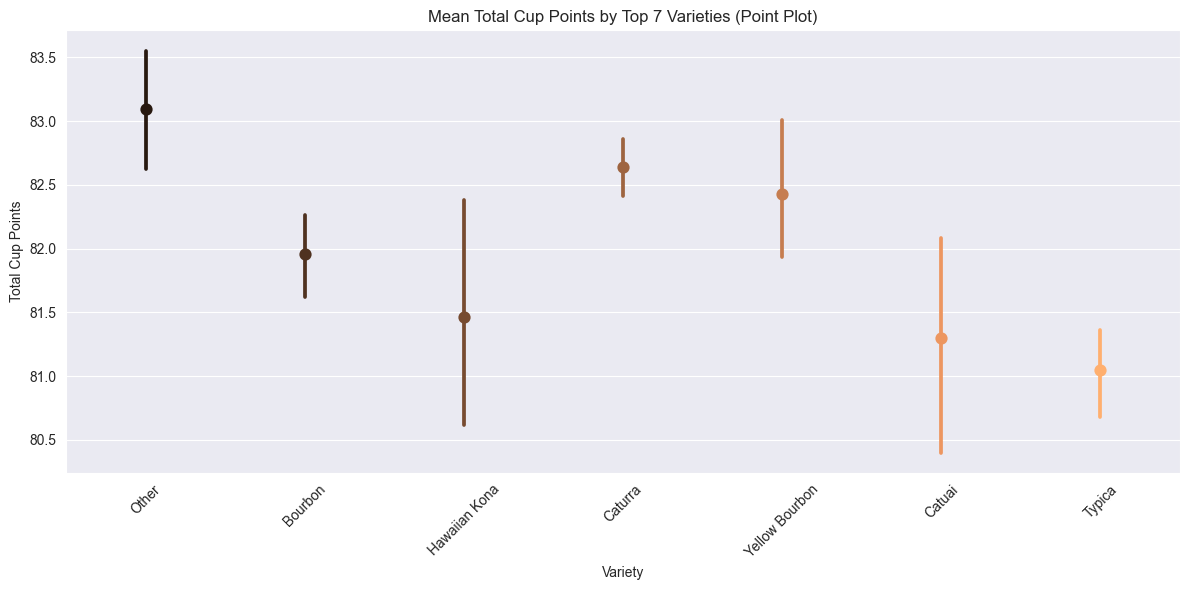

In [56]:
# Get the top 7 most frequent coffee varieties in the dataset
top_varieties = data['variety'].value_counts().head(7).index

# Filter the dataset to include only the samples that belong to the top 7 varieties
top_variety_data = data[data['variety'].isin(top_varieties)]

# Set the figure size for the point plot
plt.figure(figsize=(12, 6))

# Create a point plot to show the mean total cup points for each of the top 7 varieties
# Each point represents the mean total cup points for a variety, with different colors for each variety
sns.pointplot(x='variety', y='total_cup_points', hue='variety', data=top_variety_data, palette='copper', legend=False)

# Set the title and labels for the plot
plt.title('Mean Total Cup Points by Top 7 Varieties (Point Plot)')
plt.xlabel('Variety')
plt.ylabel('Total Cup Points')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent overlapping of elements
plt.tight_layout()

# Display the plot
plt.show()

#### **C. Missing Data Visualization**

This heatmap shows missing data in the dataset, with each row representing a record and each column representing a feature. Black indicates missing values, while blank (or colored differently if present) indicates non-missing values. In this particular heatmap, there appear to be no missing values, as the plot is completely black, signifying the dataset is complete for all entries across features. This visualization quickly reveals the completeness of the data, making it easier to identify any potential gaps in records.

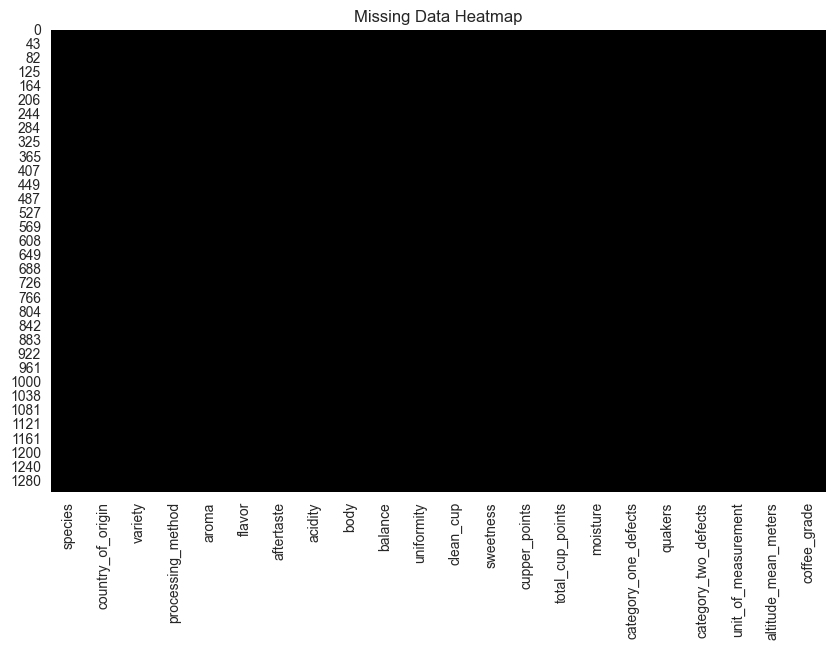

In [57]:
# Visualizing missing data using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='copper')
plt.title('Missing Data Heatmap')
plt.show()

#### **D. Correlation Matrices**

##### Sensory Attributes Correlation

This correlation matrix heatmap visualizes the relationships between selected sensory and quality attributes in the coffee dataset. Each cell shows the correlation coefficient between two attributes, with values close to 1 indicating a strong positive correlation and values close to -1 indicating a strong negative correlation. For example, "total_cup_points" has a high positive correlation with "flavor" and "cupper_points," suggesting that these attributes strongly influence the overall quality score. This heatmap helps identify closely related features, which is useful for feature selection and understanding underlying patterns in the data.

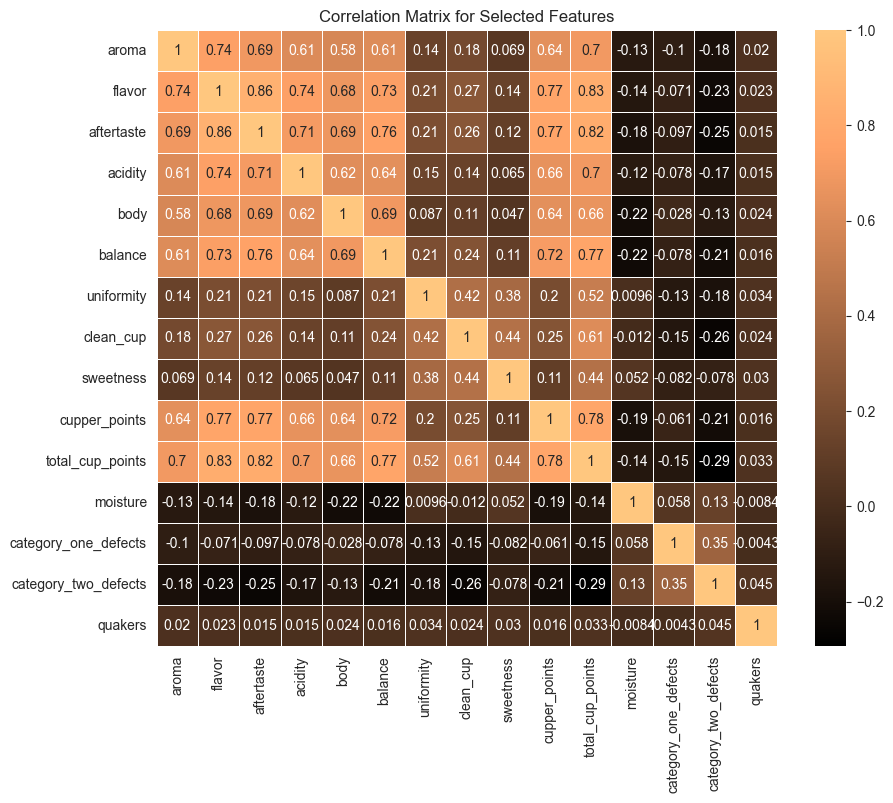

In [58]:
# Define a list of columns to analyze for correlation, focusing on sensory and quality attributes
correlation_columns = ['aroma', 'flavor', 'aftertaste', 'acidity', 'body', 
                      'balance', 'uniformity', 'clean_cup', 'sweetness', 
                      'cupper_points', 'total_cup_points', 'moisture', 
                      'category_one_defects', 'category_two_defects', 'quakers']

# Filter the dataset to only include the columns listed above for correlation analysis
subset_data = data[correlation_columns]

# Compute the correlation matrix for the selected columns to understand relationships between attributes
correlation_matrix = subset_data.corr()

# Set the figure size for the correlation heatmap
plt.figure(figsize=(10, 8))

# Create a heatmap to visualize the correlation matrix
# 'annot=True' displays the correlation values on the heatmap, 'cmap="copper"' sets the color scheme,
# and 'linewidths=0.5' adds separation between cells for readability
sns.heatmap(correlation_matrix, annot=True, cmap='copper', linewidths=0.5)

# Set the title to indicate that the heatmap shows correlations for the selected features
plt.title('Correlation Matrix for Selected Features')

# Display the heatmap
plt.show()

##### Average "Cupper Points" based on the Country of Origin and Processing Method

This heatmap displays the mean "Cupper Points" by "Country of Origin" and "Processing Method." Each cell represents the average cupping score for a specific combination of country and processing method, with darker colors indicating higher mean scores. This visualization helps identify which countries and processing methods tend to yield higher cupping points, providing insights into regional and methodological impacts on coffee quality. For instance, countries like Ethiopia and Honduras show relatively high scores for certain processing methods.

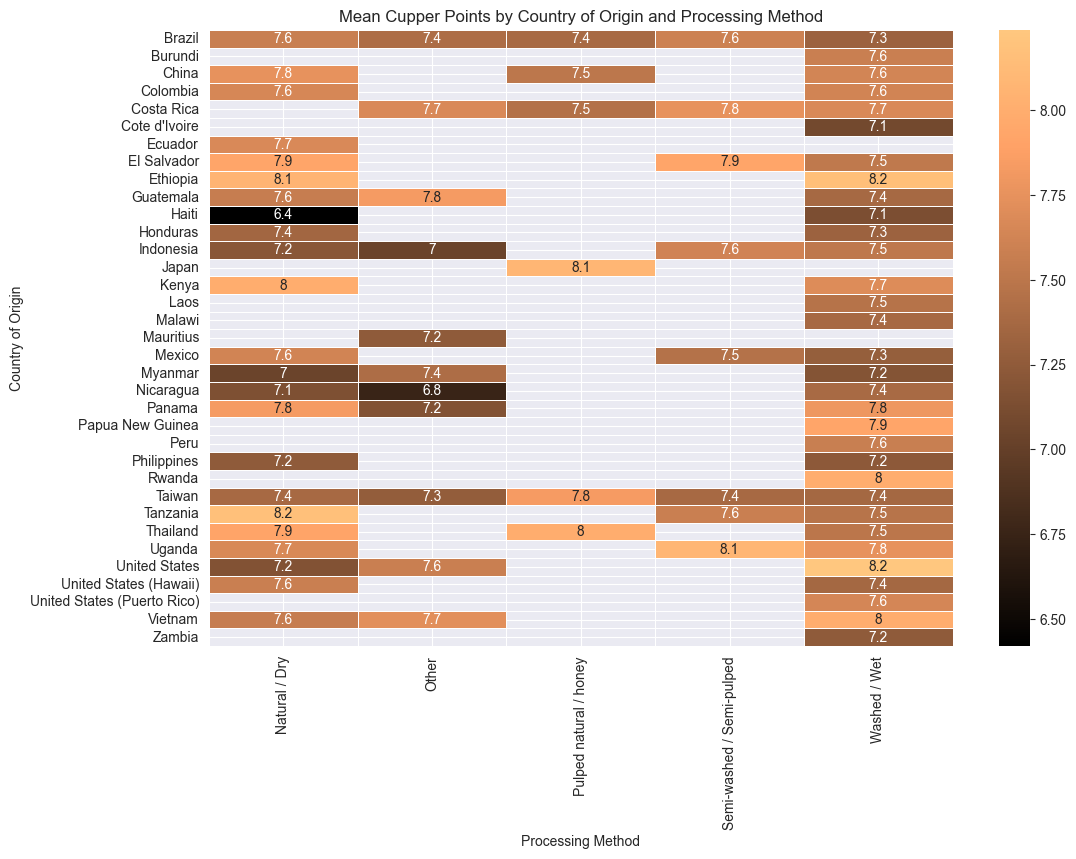

In [59]:
# Create a pivot table to calculate the mean of 'Cupper Points' for each combination of 'Country of Origin' and 'Processing Method'
pivot_data = data.pivot_table(values='cupper_points', index='country_of_origin', columns='processing_method', aggfunc='mean')

# Set the figure size for the heatmap
plt.figure(figsize=(12, 8))

# Create a heatmap to visualize the pivot table, displaying mean Cupper Points by country and processing method
# 'annot=True' shows the mean values on the heatmap, 'cmap="copper"' sets the color scheme, and 'linewidths=0.5' adds spacing between cells
sns.heatmap(pivot_data, annot=True, cmap='copper', linewidths=0.5)

# Set the title and labels for the heatmap
plt.title('Mean Cupper Points by Country of Origin and Processing Method')
plt.ylabel('Country of Origin')
plt.xlabel('Processing Method')

# Display the heatmap
plt.show()

### **Step 4: Clustering (R3)**

In our analysis of the Arabica coffee dataset, we aimed to uncover natural groupings based on sensory attributes and quality metrics. To achieve this, we used several clustering algorithms that were suitable for different aspects of our data.

Firstly, we implemented Hierarchical Clustering, specifically Agglomerative Clustering with Ward's linkage. This method was suitable because it doesn't require us to specify the number of clusters beforehand, allowing us to observe how coffee samples group together at various levels of similarity. The dendrogram produced by hierarchical clustering provided insights into the relationships among the samples, revealing hierarchical structures that could correspond to different quality grades. This approach was particularly effective for our dataset, as it helped us capture nested clusters and understand the underlying patterns in coffee quality.

Next, we used the Gaussian Mixture Model (GMM) clustering. GMM is a probabilistic model that assumes the data is generated from a mixture of several Gaussian distributions. We found GMM suitable for our dataset because it can model clusters of different shapes and sizes, which is important since our coffee data may not form perfect spherical clusters. Additionally, GMM provides soft clustering by assigning probabilities to data points belonging to each cluster, which is beneficial in capturing the overlapping nature of coffee quality attributes. This allowed us to understand the probabilistic distribution of the data and identify small distinctions between clusters.

We also applied K-Means Clustering, a widely used clustering method due to its simplicity and efficiency. K-Means was suitable for our dataset because it works well with large datasets and provides clear cluster assignments that can be directly compared with known coffee grades. By using the Elbow Method, we determined the optimal number of clusters and gained insights into the overall structure of our data. Although K-Means assumes clusters of equal variance and may not capture complex cluster shapes, it served as a good baseline to compare with more advanced clustering methods as mentioned above.

Lastly, we utilized the DBSCAN (Density-Based Spatial Clustering of Applications with Noise) algorithm. DBSCAN was appropriate because it identifies clusters based on the density of data points and is robust to outliers, which is essential when dealing with real-world data that may contain anomalies. It does not require specifying the number of clusters beforehand, which was good since the optimal number of clusters in our data was not known. DBSCAN helped us identify dense regions corresponding to common coffee qualities and isolate noise or rare samples, providing a different perspective on the clustering structure.

#### Imports

In [60]:
# All imports required for Clustering
import sklearn as sk
import numpy as np

#Standardization
from sklearn.preprocessing import StandardScaler

#Principal Component Analysis
from sklearn.decomposition import PCA

#Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
import matplotlib.cm as cm
from scipy.cluster.hierarchy import dendrogram, linkage

#Gaussion Mixture Model
from sklearn.mixture import GaussianMixture

#Silhouette Score
from sklearn.metrics import silhouette_samples, silhouette_score

#K-Means Clustering
from sklearn.cluster import KMeans

#DBSCAN Clustering
from sklearn.cluster import DBSCAN




#### Load and Standardize Data
Standardization is a data preprocessing technique that transforms features to have a mean of zero and a standard deviation of one. This process rescales the data so that different features contribute equally to the analysis, regardless of their original scale. 

**Why have we done it?** <br>
Standardization was applied before performing Principal Component Analysis (PCA), clustering algorithms, and training the Multi-Layer Perceptron (MLP) classifier. The primary reason for standardizing the data is that these methods are sensitive to the scale of the input features. Features in the dataset have different units or scales, those with larger magnitudes could dominate the analysis, leading to biased results.

In [61]:
# Step 1: Prepare dataset (with sensory columns)
clustering_columns = ['aroma', 'flavor', 'aftertaste', 'acidity', 'body', 
                      'balance', 'uniformity', 'clean_cup', 'sweetness', 
                      'cupper_points']

In [62]:
# Visualize the data
data[clustering_columns].head()

aroma  flavor  aftertaste  acidity  body  balance  uniformity  clean_cup  \
0   8.67    8.83        8.67     8.75  8.50     8.42        10.0       10.0   
1   8.75    8.67        8.50     8.58  8.42     8.42        10.0       10.0   
2   8.42    8.50        8.42     8.42  8.33     8.42        10.0       10.0   
3   8.17    8.58        8.42     8.42  8.50     8.25        10.0       10.0   
4   8.25    8.50        8.25     8.50  8.42     8.33        10.0       10.0   

   sweetness  cupper_points  
0       10.0           8.75  
1       10.0           8.58  
2       10.0           9.25  
3       10.0           8.67  
4       10.0           8.58

In [63]:
# Step 2: Standardize the data
scaler = StandardScaler()

# Scaled dataset for clustering
scaled_data = scaler.fit_transform(data[clustering_columns])

# Visualize the scaled data as a DataFrame
pd.DataFrame(scaled_data, columns=clustering_columns).head()

aroma    flavor  aftertaste   acidity      body   balance  uniformity  \
0  3.479961  3.841630    3.660418  3.826705  3.459693  2.586690    0.312279   
1  3.732824  3.372455    3.171408  3.290897  3.177107  2.586690    0.312279   
2  2.689765  2.873956    2.941286  2.786607  2.859198  2.586690    0.312279   
3  1.899568  3.108544    2.941286  2.786607  3.459693  2.099120    0.312279   
4  2.152431  2.873956    2.452277  3.038752  3.177107  2.328565    0.312279   

   clean_cup  sweetness  cupper_points  
0   0.215738   0.189235       3.069567  
1   0.215738   0.189235       2.655627  
2   0.215738   0.189235       4.287035  
3   0.215738   0.189235       2.874772  
4   0.215738   0.189235       2.655627

#### Principle Component Analysis
PCA is a dimensionality reduction technique that transforms high-dimensional data into a lower-dimensional space while retaining most of the variance.

**Why have we done it?** <br>
We applied PCA to reduce the dataset's sensory attribute features to two principal components before clustering. This simplification made it possible to visualize the data and clusters in 2D plots and enhanced the performance of clustering algorithms by focusing on the most significant patterns in the data.

In [64]:
# Step 3: Perform PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
# Convert the PCA result to a DataFrame for better readability
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
print(pca_df.head())

        PC1       PC2
0  8.919652 -1.524713
1  8.185687 -1.377874
2  7.857609 -1.207504
3  7.174879 -1.155084
4  6.970475 -1.129265


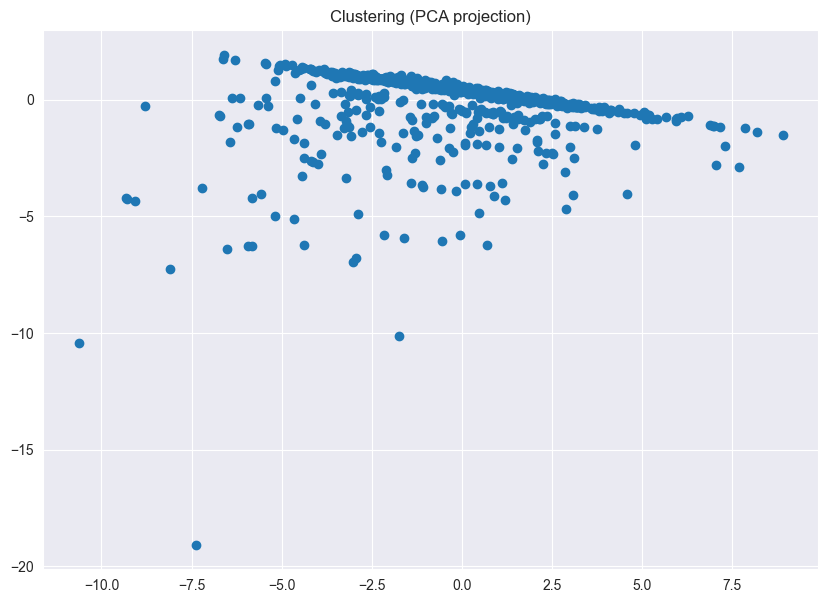

In [65]:
# Step 4: Visualize data BEFORE clustering (PCA projection without clusters)
plt.figure(figsize=(10, 7))
plt.scatter(pca_data[:, 0], pca_data[:, 1])
plt.title('Clustering (PCA projection)')
plt.show()

#### 1 - Hierarchical Clustering
Hierarchical clustering is an unsupervised machine learning technique used to group similar data points into clusters, forming a tree-like structure known as a dendrogram. This method is particularly useful for identifying natural groupings within data without prior knowledge of the number of clusters.

Our approach uses Agglomerative Hierarchical Clustering with Ward's Linkage:

- **Agglomerative Clustering**: A bottom-up method where each data point starts as its own cluster, and clusters are iteratively merged based on similarity.
- **Ward's Linkage**: A criterion that minimizes the total within-cluster variance after merging. It ensures compact, well-defined clusters.

##### Perform Clustering

For n_clusters = 2, The average silhouette_score is: 0.48
For n_clusters = 3, The average silhouette_score is: 0.41
For n_clusters = 4, The average silhouette_score is: 0.45
For n_clusters = 5, The average silhouette_score is: 0.46
For n_clusters = 6, The average silhouette_score is: 0.41
For n_clusters = 7, The average silhouette_score is: 0.41


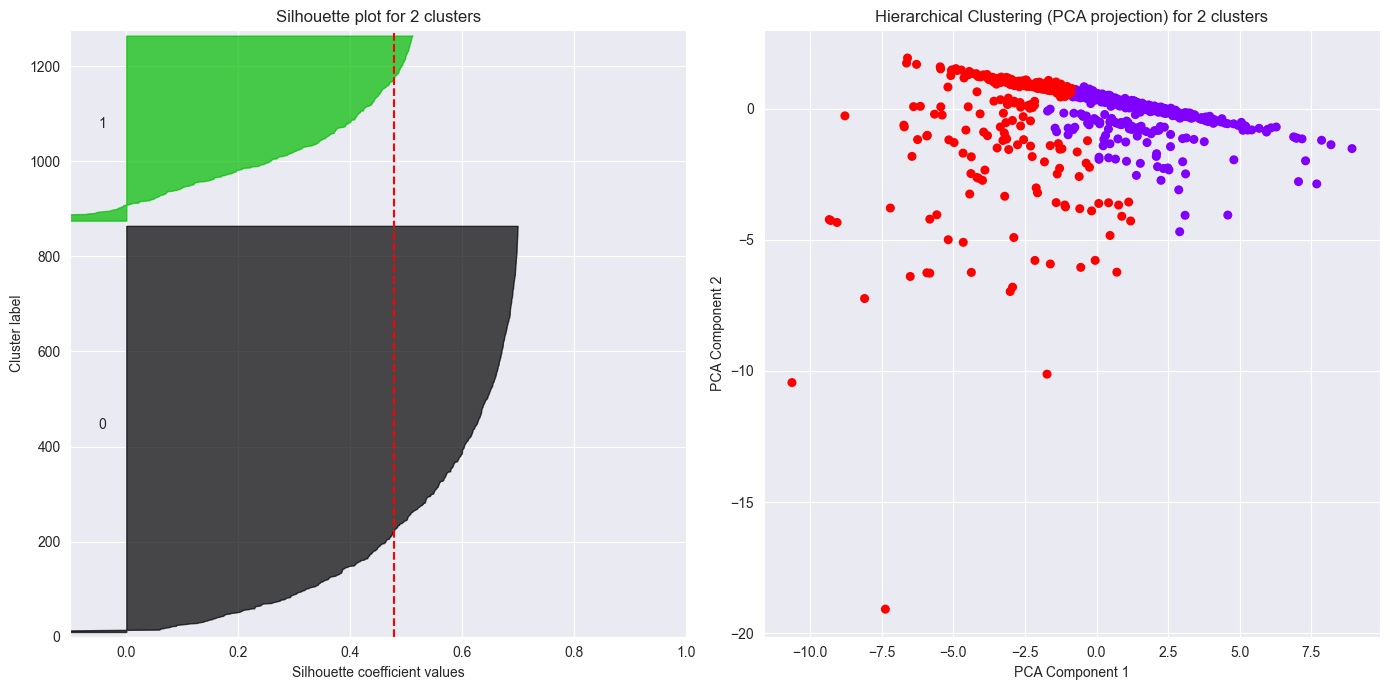

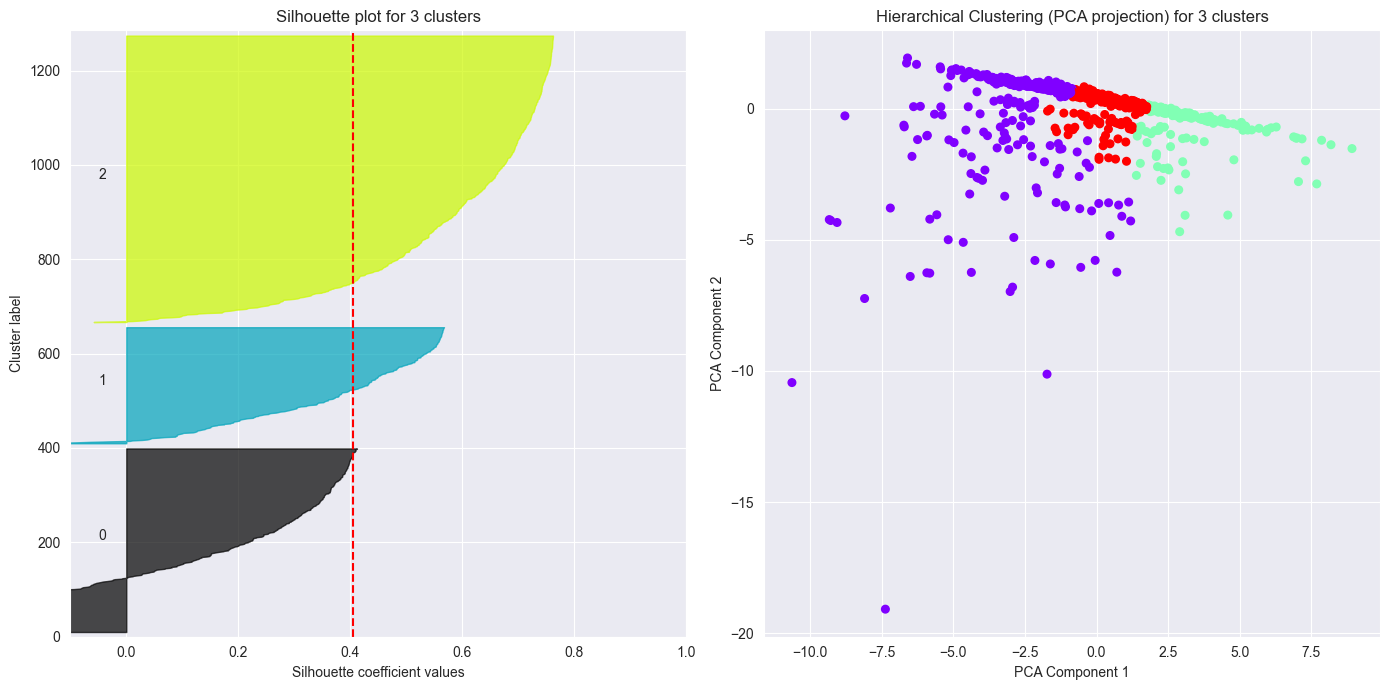

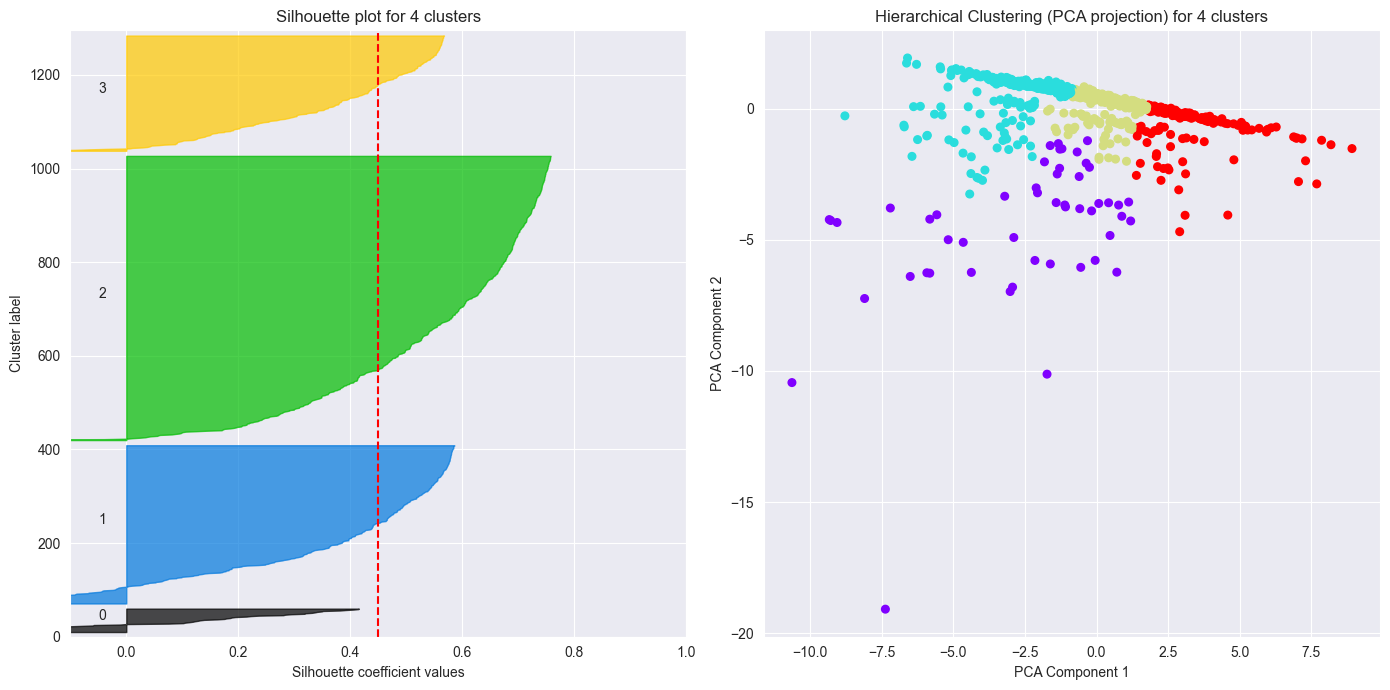

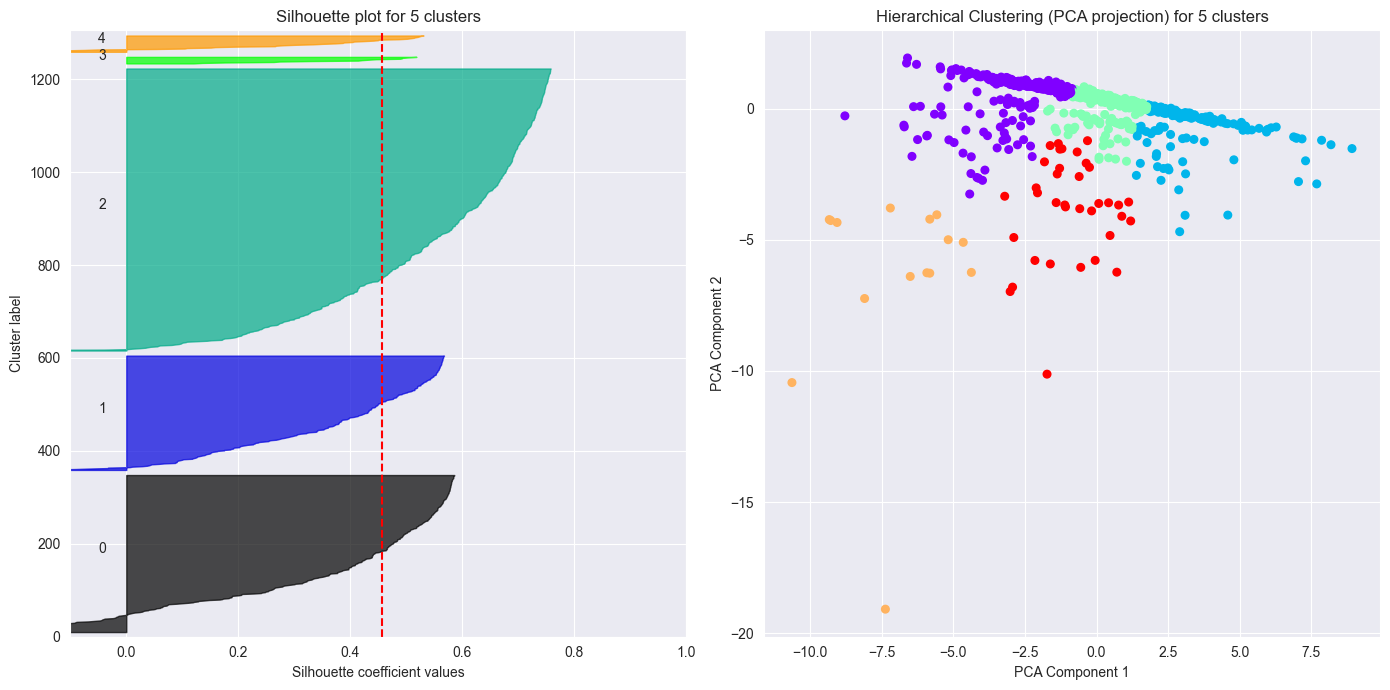

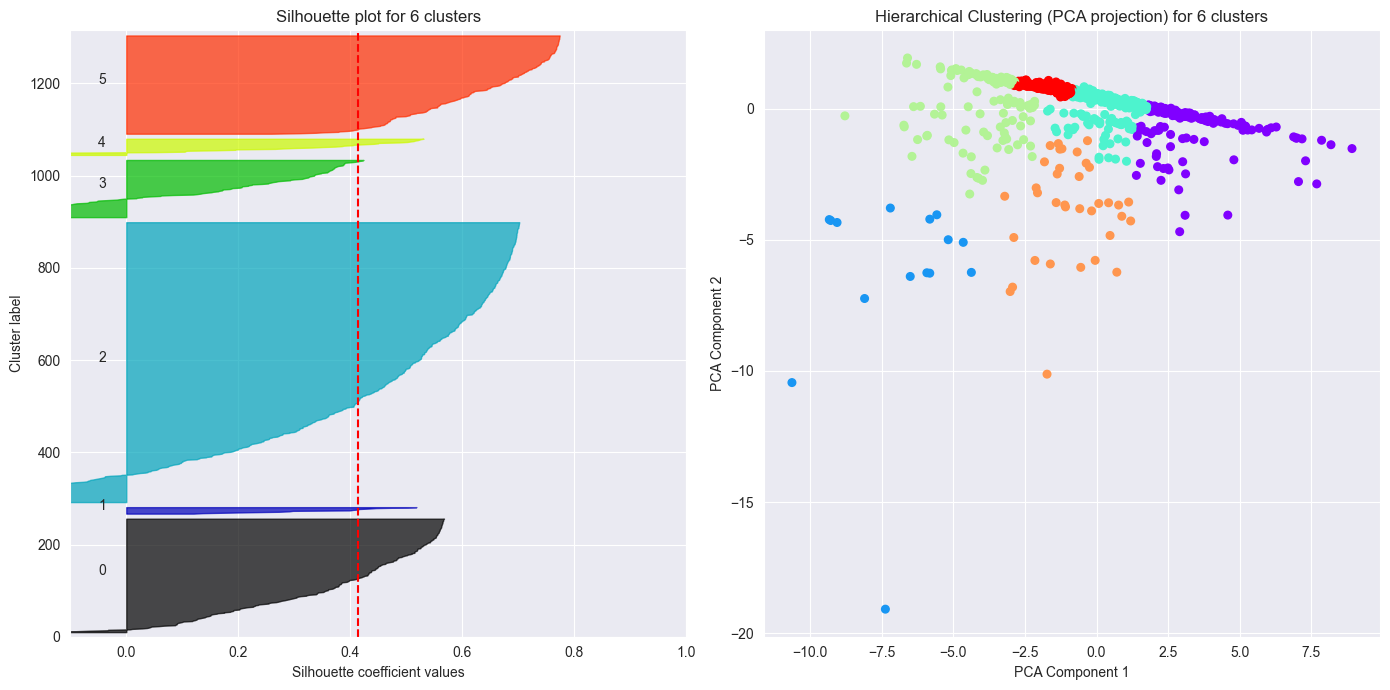

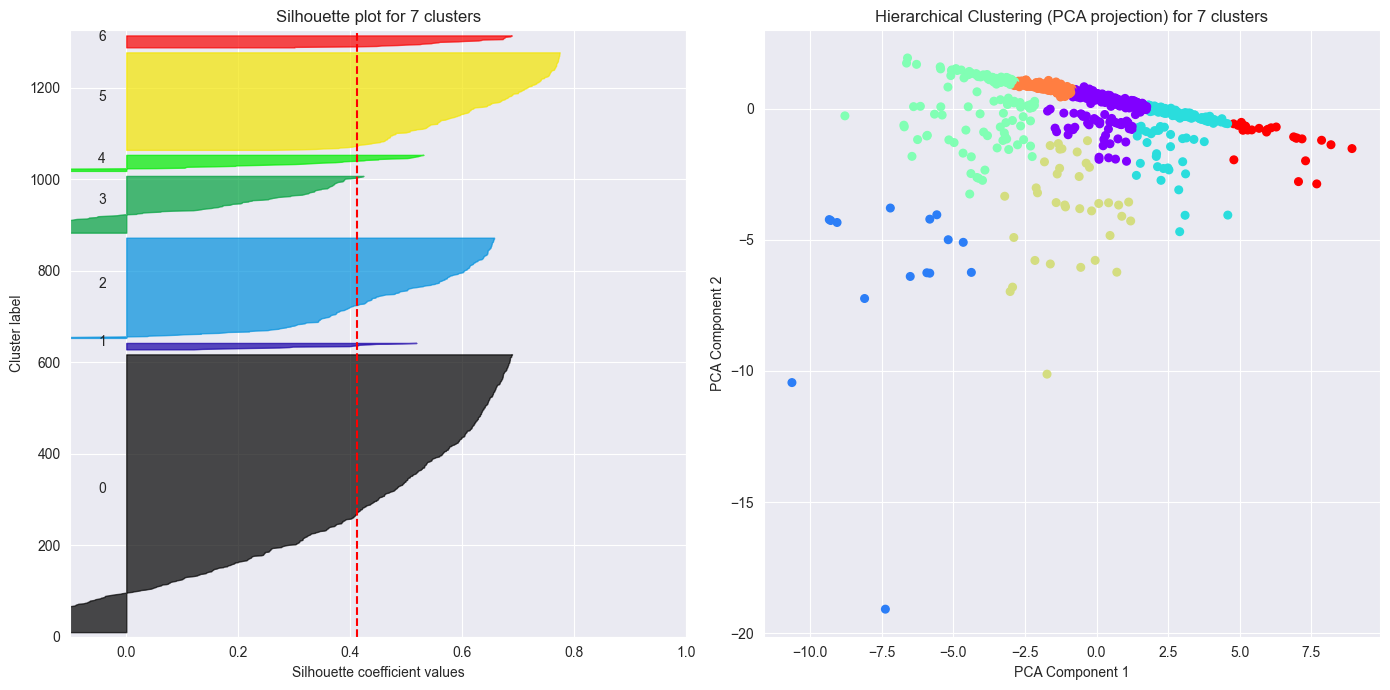

In [66]:
# Perform Hierarchical Clustering for varying numbers of clusters
range_n_clusters = [2, 3, 4, 5, 6, 7]  # Define the range of cluster numbers to evaluate
clustering_results = []  # Initialize a list to store clustering results
agglo_data = pca_data  # Use PCA-reduced data for clustering

# Step 1: Train clustering models and calculate silhouette scores
for n_clusters in range_n_clusters:
    # Create an Agglomerative Clustering model with the specified number of clusters and Ward's linkage
    clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    
    # Fit the model to the data and predict cluster labels
    cluster_labels = clustering.fit_predict(agglo_data)
    
    # Calculate the average silhouette score to evaluate the quality of clustering
    silhouette_avg = silhouette_score(agglo_data, cluster_labels)
    
    # Store the results (number of clusters, cluster labels, silhouette score) for later use
    clustering_results.append((n_clusters, cluster_labels, silhouette_avg))

# Step 2: Print the silhouette scores for all evaluated numbers of clusters
for n_clusters, _, silhouette_avg in clustering_results:
    # Display the silhouette score for the current number of clusters
    print(f"For n_clusters = {n_clusters}, The average silhouette_score is: {silhouette_avg:.2f}")

# Step 3: Visualize the clustering results with silhouette plots and PCA projections
for n_clusters, cluster_labels, silhouette_avg in clustering_results:
    # Create a figure with two subplots: one for the silhouette plot and one for the PCA projection
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(14, 7)  # Set the size of the figure
    
    # Silhouette Plot
    sample_silhouette_values = silhouette_samples(agglo_data, cluster_labels)  # Compute silhouette coefficients for each point
    y_lower = 10  # Initialize the vertical starting point for the first cluster
    ax1.set_xlim([-0.1, 1])  # Silhouette coefficient values range between -1 and 1
    ax1.set_ylim([0, len(agglo_data) + (n_clusters + 1) * 10])  # Adjust the plot height based on the number of clusters

    # Plot each cluster's silhouette values
    for i in range(n_clusters):
        # Extract and sort the silhouette values for the current cluster
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Calculate the size of the cluster and the upper limit of the y-axis for this cluster
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # Choose a color for the cluster and fill the area of the silhouette plot
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        
        # Add cluster labels on the left side of the silhouette plot
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        # Update y_lower for the next cluster
        y_lower = y_upper + 10

    # Add labels, title, and average silhouette score indicator to the silhouette plot
    ax1.set_title(f"Silhouette plot for {n_clusters} clusters")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")  # Show the average silhouette score as a vertical line

    # PCA Projection with Clusters
    ax2.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels, cmap='rainbow', s=30)
    ax2.set_title(f"Hierarchical Clustering (PCA projection) for {n_clusters} clusters")
    ax2.set_xlabel("PCA Component 1")
    ax2.set_ylabel("PCA Component 2")

    # Display the figure
    plt.tight_layout()
    plt.show()

##### Dendogram

A dendrogram is a tree-like diagram that visualizes the results of hierarchical clustering, illustrating how data points or smaller clusters are merged step by step into larger clusters based on their similarity. In the provided dendrogram, two major clusters (orange and green) emerge at a high distance (~80), representing a natural division in the data. Within these two main clusters, smaller sub-clusters form at lower distances, providing finer segmentation. By cutting the dendrogram at different distances, such as around 50, two clusters can be identified, while cutting at lower distances (e.g., 20–30) reveals more granular sub-clusters. This structure highlights a clear hierarchy, where the main clusters could represent broad coffee categories, and sub-clusters capture more specific characteristics like flavor profiles or processing methods.

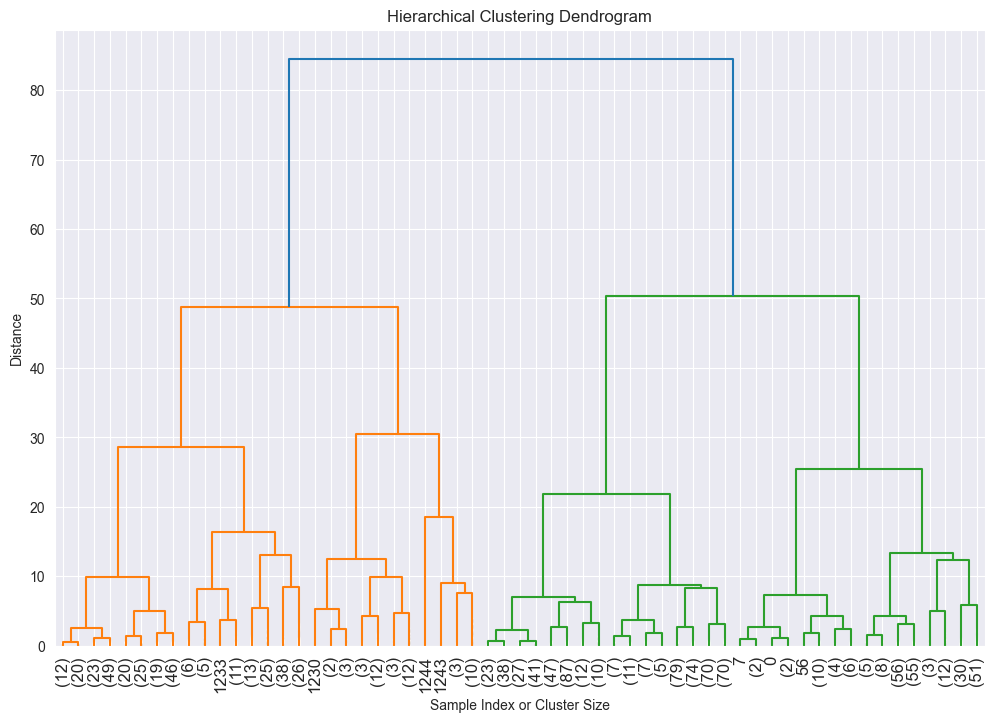

In [67]:
# Step 1: Create a linkage matrix using Ward's method
# Ward's method minimizes the variance within clusters as they are merged
linkage_matrix = linkage(agglo_data, method='ward')

# Step 2: Set up the plot for the dendrogram
plt.figure(figsize=(12, 8))  # Define the figure size for better visualization

# Step 3: Plot the dendrogram
dendrogram(
    linkage_matrix,
    truncate_mode='level',  # Limit the display to the top levels of the dendrogram
    p=5,  # Show only the top 5 levels of the hierarchical tree
    leaf_rotation=90.,  # Rotate leaf labels for better readability
    leaf_font_size=12.,  # Set the font size for the leaf labels
    color_threshold=0.7 * max(linkage_matrix[:, 2]),  # Set a color threshold for cluster differentiation
    show_contracted=True  # Display summary branches for clusters below the threshold
)

# Step 4: Add title and axis labels for clarity
plt.title("Hierarchical Clustering Dendrogram")  # Title of the dendrogram
plt.xlabel("Sample Index or Cluster Size")  # X-axis label
plt.ylabel("Distance")  # Y-axis label showing the distance between merged clusters

# Step 5: Show the plot
plt.show()  # Display the dendrogram

#### 2 - Gaussian Mixture Model Clustering (GMM)
A Gaussian Mixture Model (GMM) is a probabilistic model that represents a dataset as a combination of multiple Gaussian distributions, each characterized by its own mean and variance. This approach is particularly effective in clustering, as it can model clusters of various shapes and sizes, making it suitable for complex datasets. By assuming that data points are generated from a mixture of several Gaussian distributions, GMMs provide a flexible method for identifying underlying patterns in the data. (GeeksforGeeks, 2018)

##### Perform GMM


Silhouette Scores:
 - For n_clusters = 2, the average silhouette score is: 0.37
 - For n_clusters = 3, the average silhouette score is: 0.23
 - For n_clusters = 4, the average silhouette score is: 0.19
 - For n_clusters = 5, the average silhouette score is: 0.11
 - For n_clusters = 6, the average silhouette score is: 0.16
 - For n_clusters = 7, the average silhouette score is: 0.28


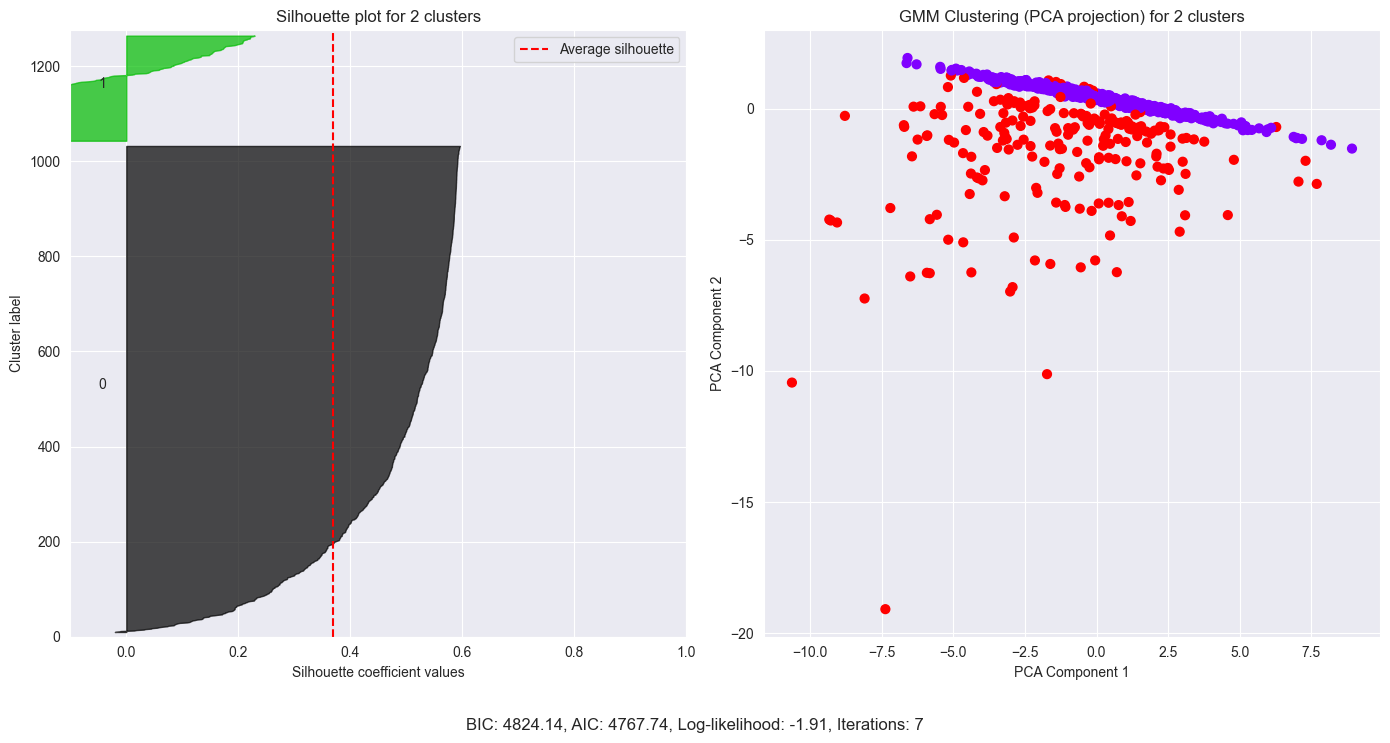

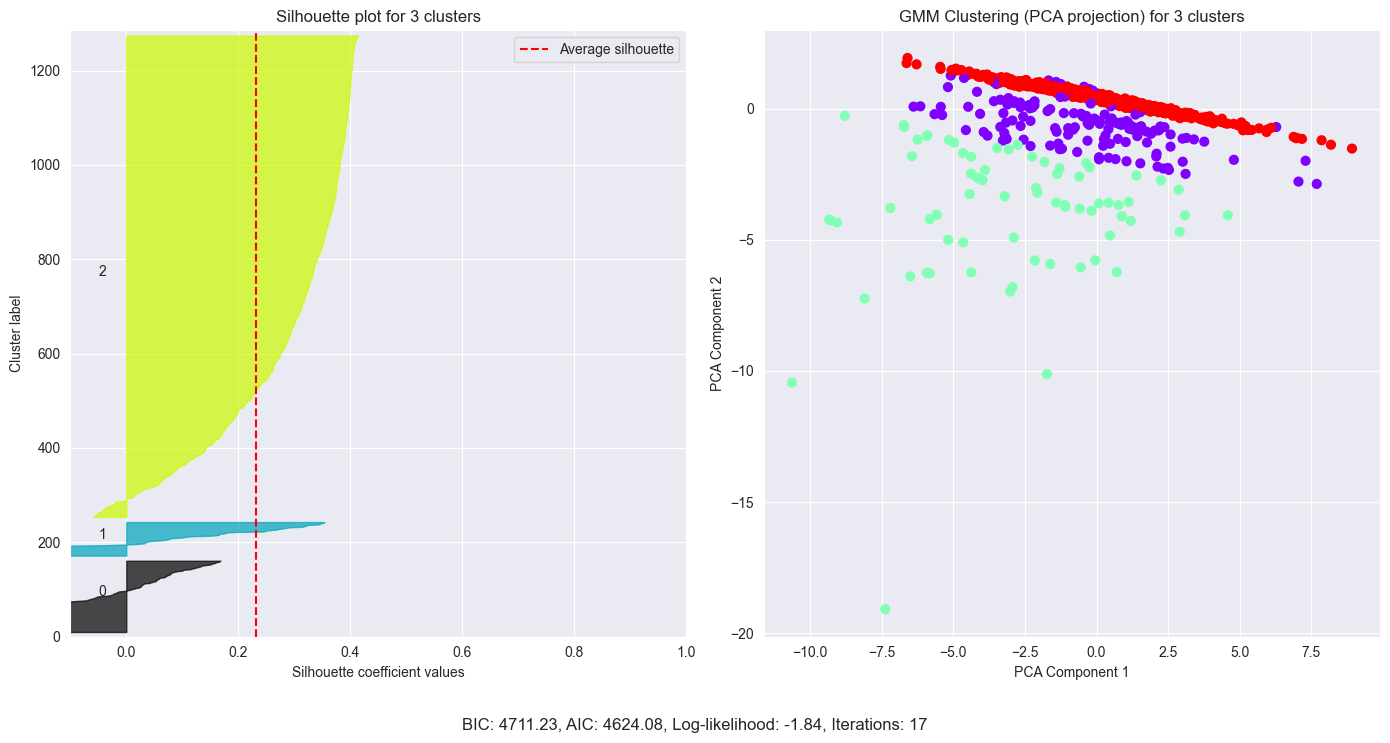

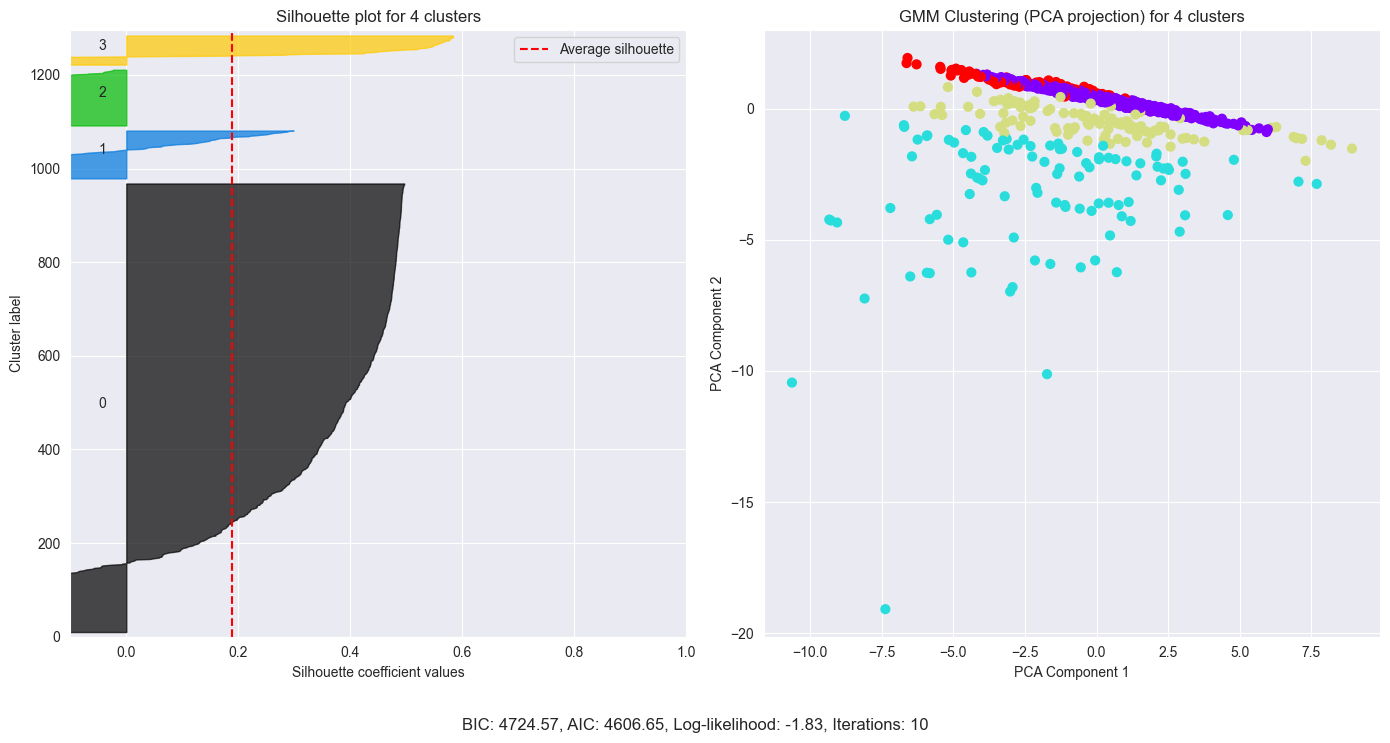

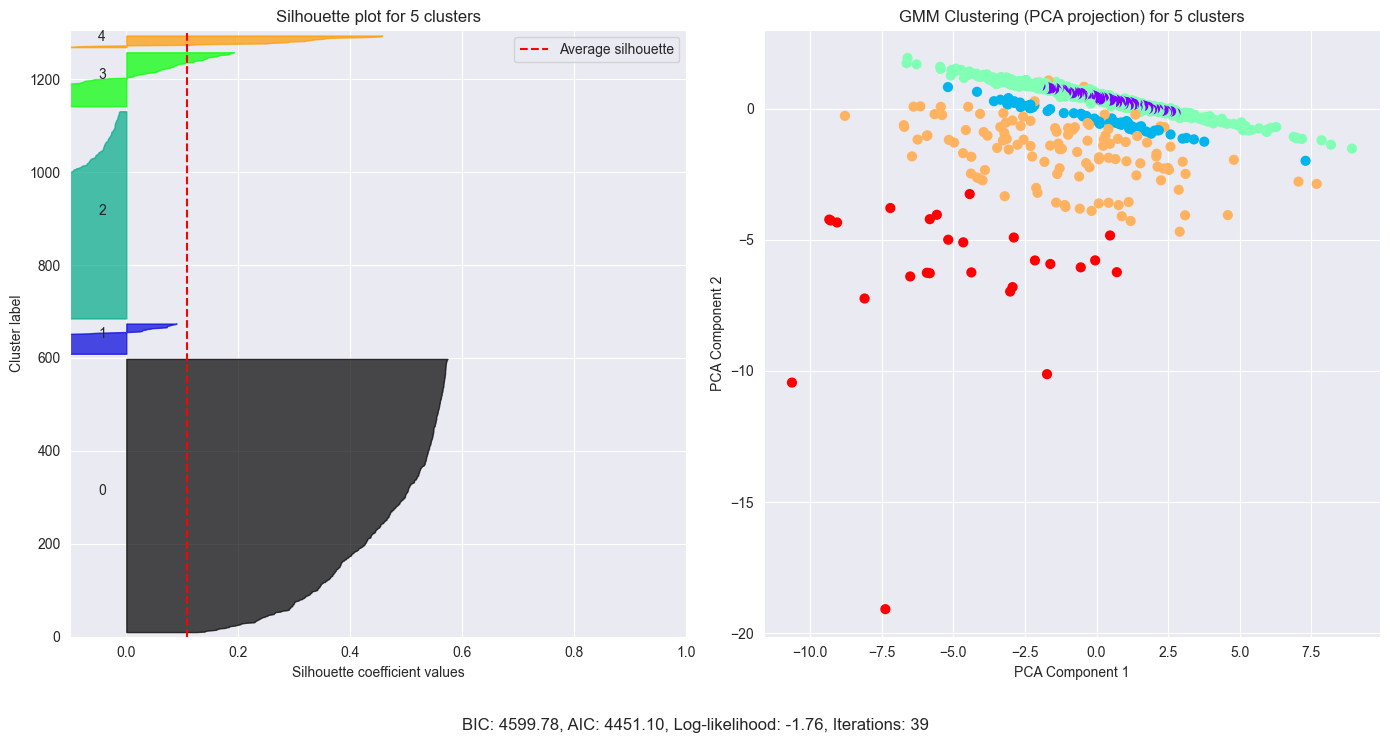

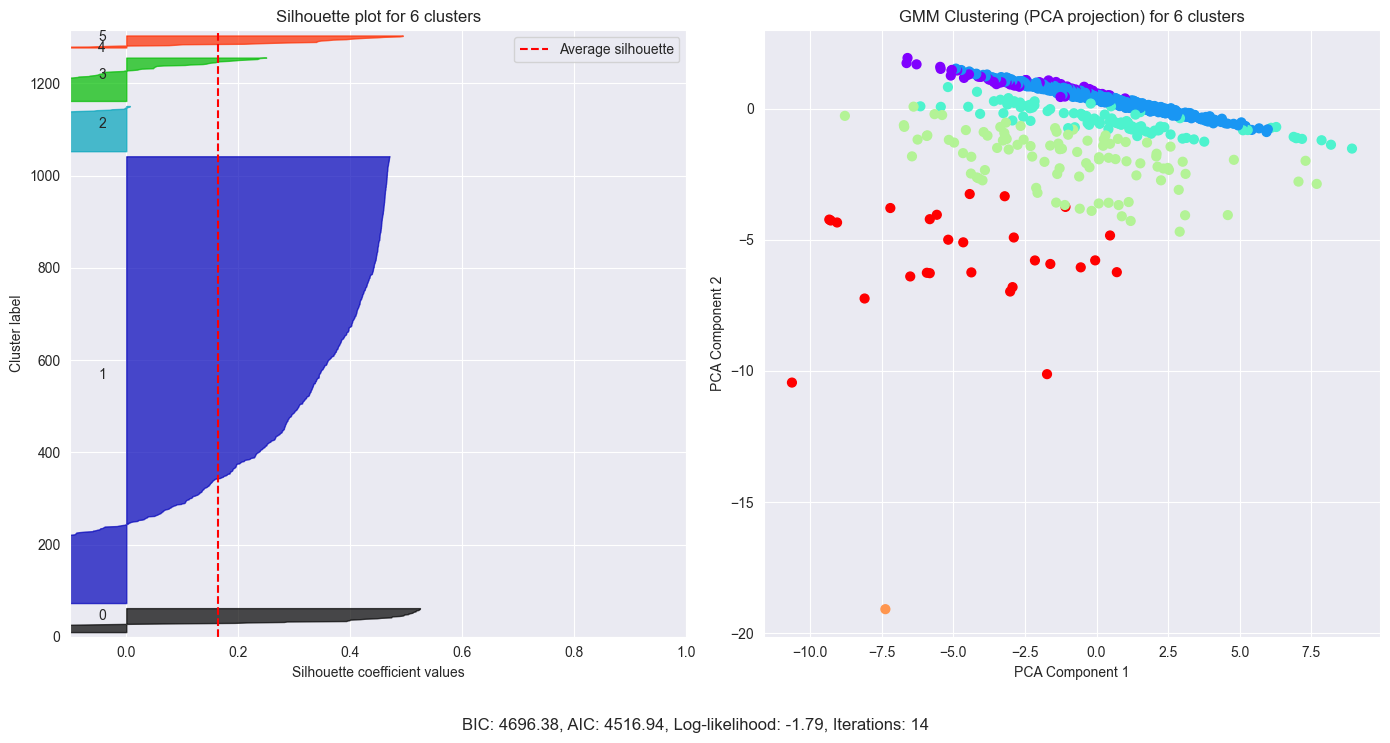

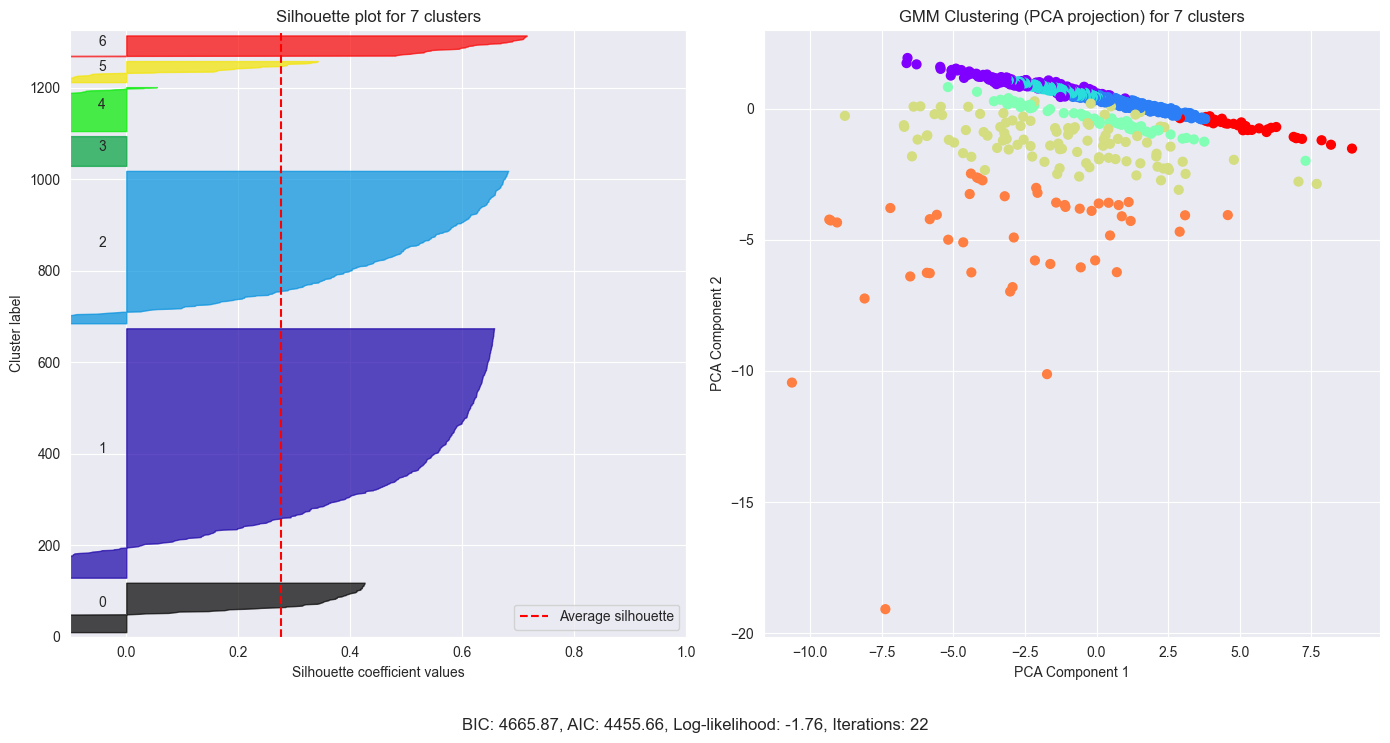

In [68]:
# Define the range of clusters to evaluate
range_n_clusters = [2, 3, 4, 5, 6, 7]
gmm_clustering_results = []  # List to store GMM clustering results
gmm_data = pca_data  # Use PCA-reduced data for clustering

# Train GMM models, calculate metrics, and store results
for n_clusters in range_n_clusters:
    # Initialize and fit the Gaussian Mixture Model
    gmm = GaussianMixture(n_components=n_clusters)
    gmm.fit(gmm_data)

    # Predict cluster labels
    labels = gmm.predict(gmm_data)

    # Compute model selection metrics: BIC and AIC
    bic = gmm.bic(gmm_data)  # Bayesian Information Criterion
    aic = gmm.aic(gmm_data)  # Akaike Information Criterion

    # Calculate the silhouette score to assess cluster quality
    silhouette_avg = silhouette_score(gmm_data, labels)

    # Store results including metrics and clustering details
    gmm_clustering_results.append((n_clusters, labels, silhouette_avg, bic, aic, gmm.lower_bound_, gmm.n_iter_))

# Print silhouette scores for each number of clusters
print("\nSilhouette Scores:")
for n_clusters, _, silhouette_avg, _, _, _, _ in gmm_clustering_results:
    print(f" - For n_clusters = {n_clusters}, the average silhouette score is: {silhouette_avg:.2f}")

# Visualize clustering results using silhouette plots and PCA projections
for n_clusters, labels, silhouette_avg, bic, aic, log_likelihood, n_iter in gmm_clustering_results:
    # Create figure with two subplots: silhouette plot and PCA projection
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(14, 7)  # Set figure size

    # Generate silhouette plot
    sample_silhouette_values = silhouette_samples(gmm_data, labels)
    y_lower = 10  # Initialize y-axis position for the first cluster
    ax1.set_xlim([-0.1, 1])  # Silhouette coefficient range
    ax1.set_ylim([0, len(gmm_data) + (n_clusters + 1) * 10])  # Adjust y-axis based on the number of clusters

    for i in range(n_clusters):
        # Extract and sort silhouette values for the current cluster
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()

        # Calculate cluster size and position for plotting
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # Assign color and plot silhouette values
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Add cluster label on the left of the silhouette plot
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # Update y_lower for the next cluster

    # Add titles and labels to the silhouette plot
    ax1.set_title(f"Silhouette plot for {n_clusters} clusters")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--", label="Average silhouette")
    ax1.legend()

    # Generate PCA projection with clustering labels
    ax2.scatter(gmm_data[:, 0], gmm_data[:, 1], c=labels, s=40, cmap='rainbow')
    ax2.set_title(f"GMM Clustering (PCA projection) for {n_clusters} clusters")
    ax2.set_xlabel("PCA Component 1")
    ax2.set_ylabel("PCA Component 2")

    # Display BIC, AIC, log-likelihood, and number of iterations on the plot
    plt.figtext(0.5, -0.05, f"BIC: {bic:.2f}, AIC: {aic:.2f}, Log-likelihood: {log_likelihood:.2f}, Iterations: {n_iter}",
                ha="center", fontsize=12)

    # Show the plots
    plt.tight_layout()
    plt.show()

#### 3 - K-Means Clustering
K-Means is an unsupervised clustering algorithm used to group data into K distinct clusters based on similarity. The algorithm works by minimizing the sum of squared distances between data points and their nearest cluster center, known as the centroid.

Number of clusters = 1 and the inertia is 8766.042704705487
Number of clusters = 2 and the inertia is 5015.478646381101
Number of clusters = 3 and the inertia is 3655.811464082775
Number of clusters = 4 and the inertia is 2560.9802054002657
Number of clusters = 5 and the inertia is 2293.573356360324
Number of clusters = 6 and the inertia is 1778.2428440705717
Number of clusters = 7 and the inertia is 1501.5570939211511
Number of clusters = 8 and the inertia is 1236.336737894572
Number of clusters = 9 and the inertia is 1089.4383429230832


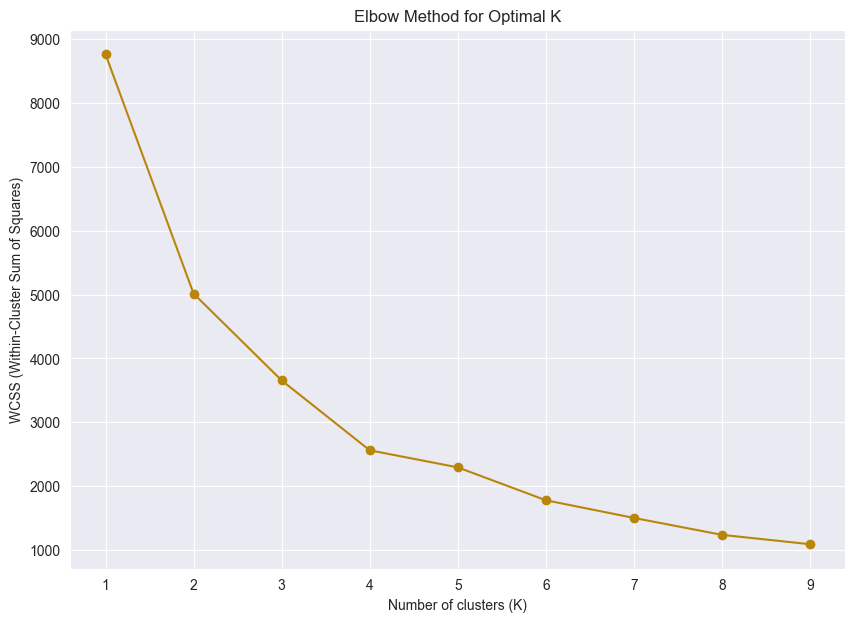

In [69]:
# We implement the Elbow Method to identify the optimal number of clusters for K-means clustering.
# The Elbow Method evaluates the Within-Cluster Sum of Squares (WCSS) for different numbers of clusters (K).
# By plotting WCSS values, we aim to find an "elbow point" where the rate of decrease in WCSS slows down,
# suggesting a balance between cluster cohesion and separation.

sum_of_squares = [] 
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pca_data)
    sum_of_squares.append(kmeans.inertia_)
    print("Number of clusters =",i , "and the inertia is", kmeans.inertia_)

plt.figure(figsize=(10, 7))
plt.plot(range(1, 10), sum_of_squares, marker='o', linestyle='-', color='darkgoldenrod')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(range(1, 10))
plt.grid(True)
plt.show()

##### Elbow Method Analysis
The graph above shows the Elbow Method applied to determine the optimal number of clusters for K-means clustering. The Within-Cluster Sum of Squares (WCSS) is plotted against the number of clusters (K).

Initially, WCSS decreases sharply as the number of clusters increases from 1 to 3, indicating that adding more clusters significantly improves the clustering by reducing intra-cluster distances. However, after K=3, the rate of decrease slows down considerably, forming a bend or "elbow." This suggests that K=3 is an optimal number of clusters as it balances minimizing WCSS while avoiding excessive splitting into many clusters.

For n_clusters = 2, The average silhouette_score is: 0.47
For n_clusters = 3, The average silhouette_score is: 0.44
For n_clusters = 4, The average silhouette_score is: 0.45
For n_clusters = 5, The average silhouette_score is: 0.46
For n_clusters = 6, The average silhouette_score is: 0.45
For n_clusters = 7, The average silhouette_score is: 0.43


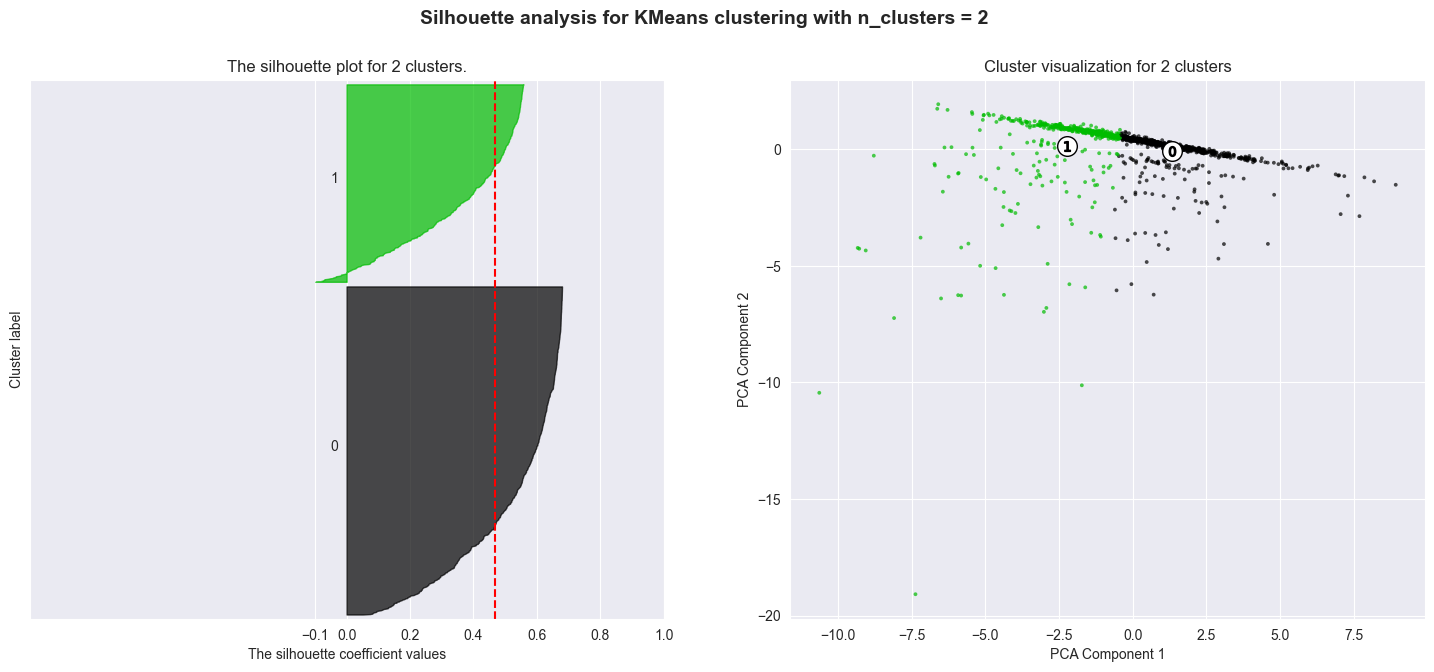

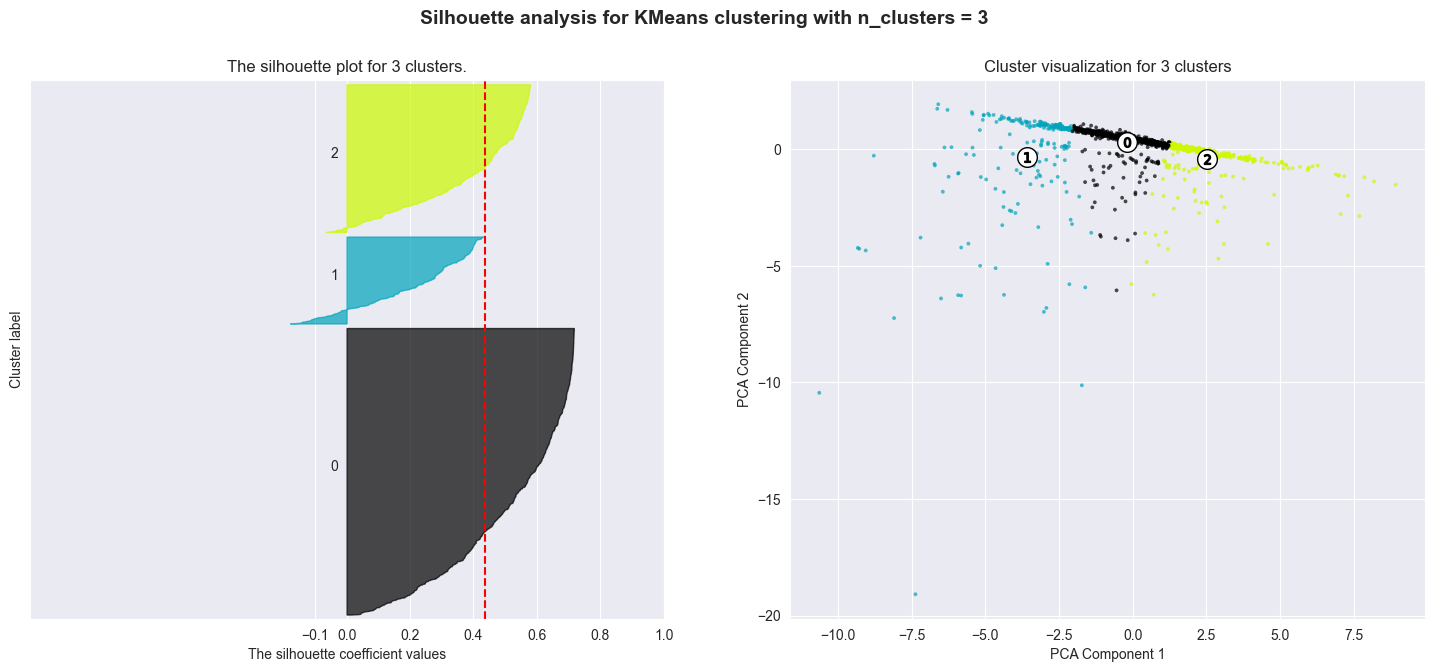

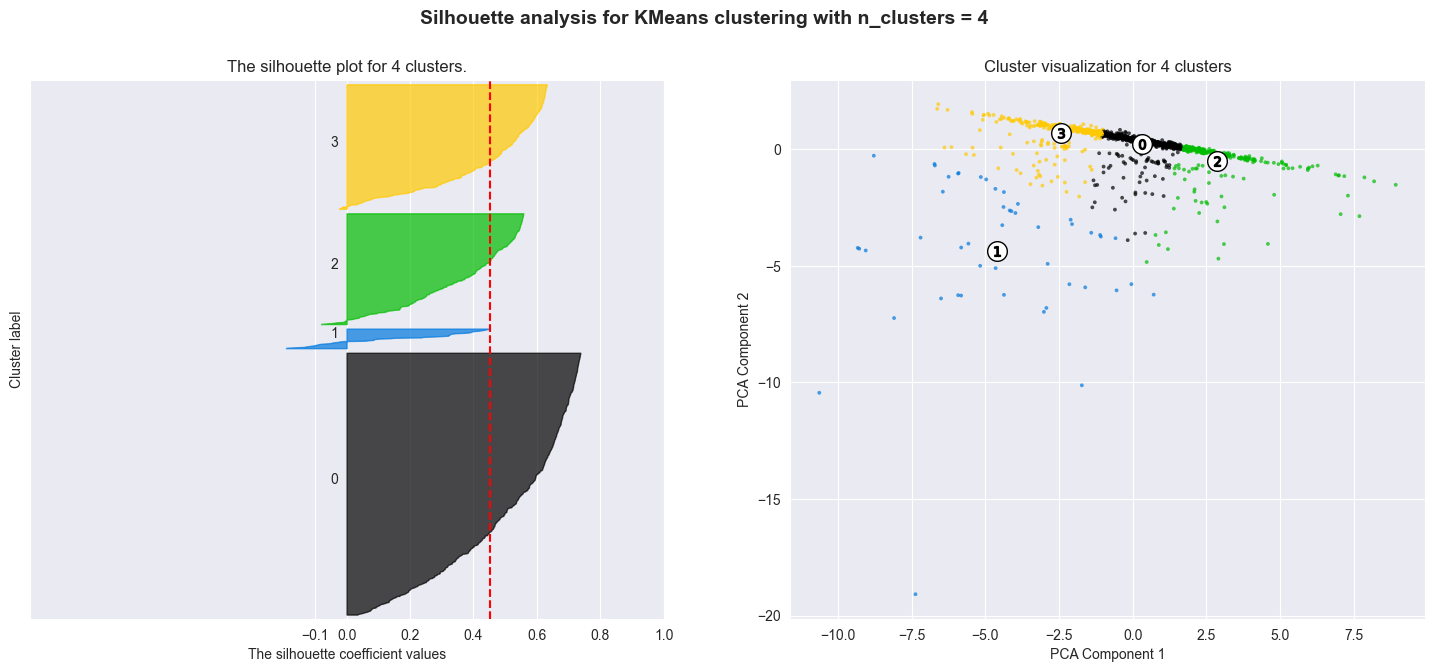

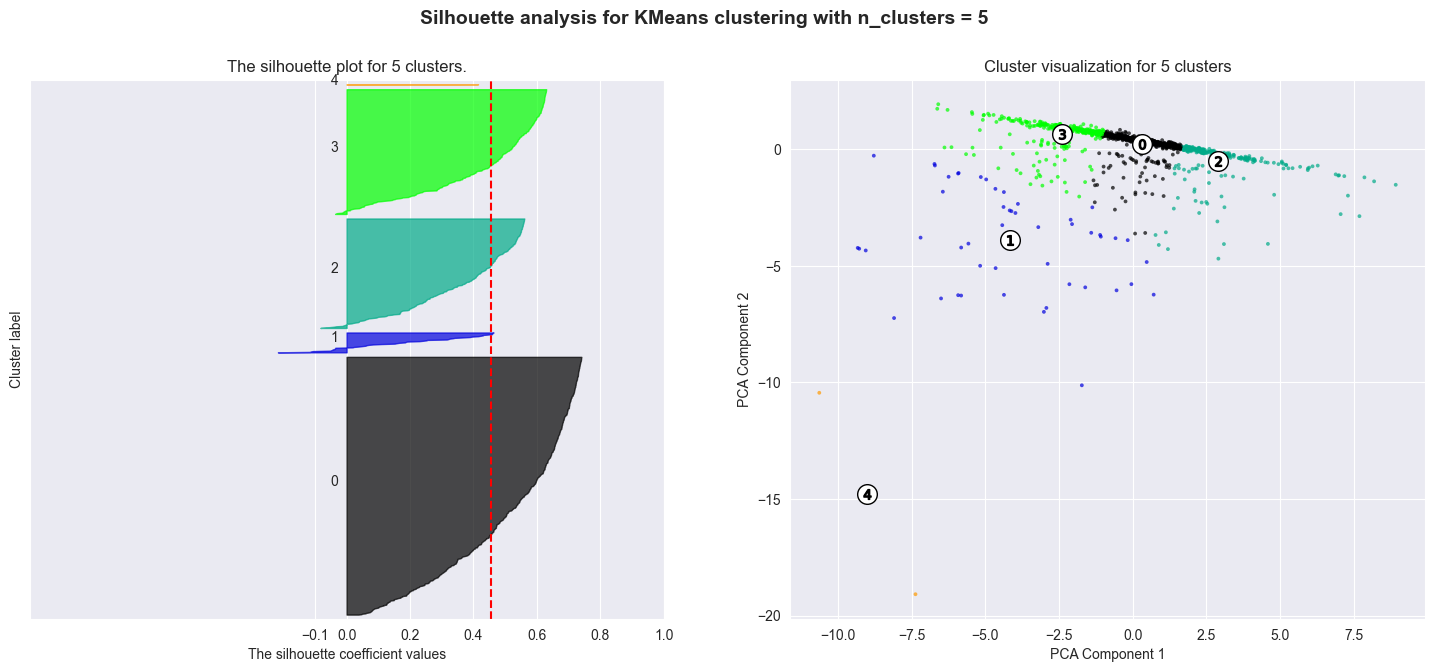

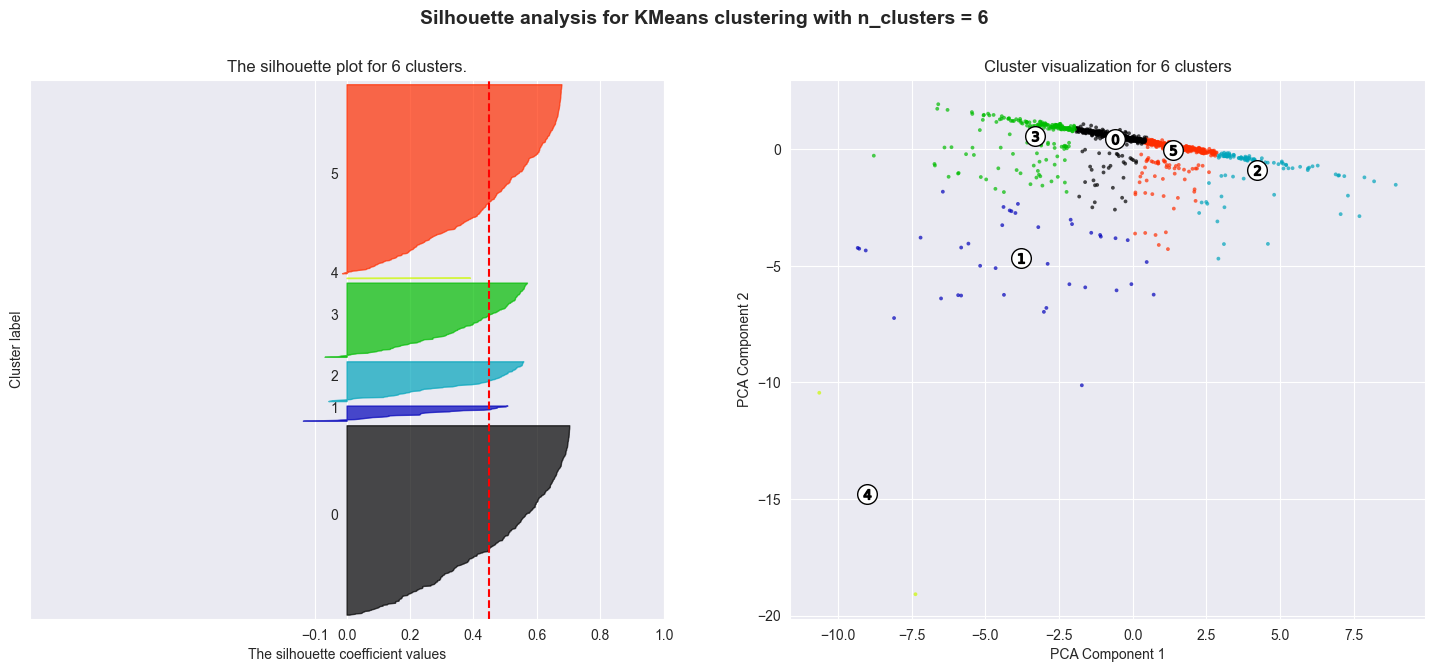

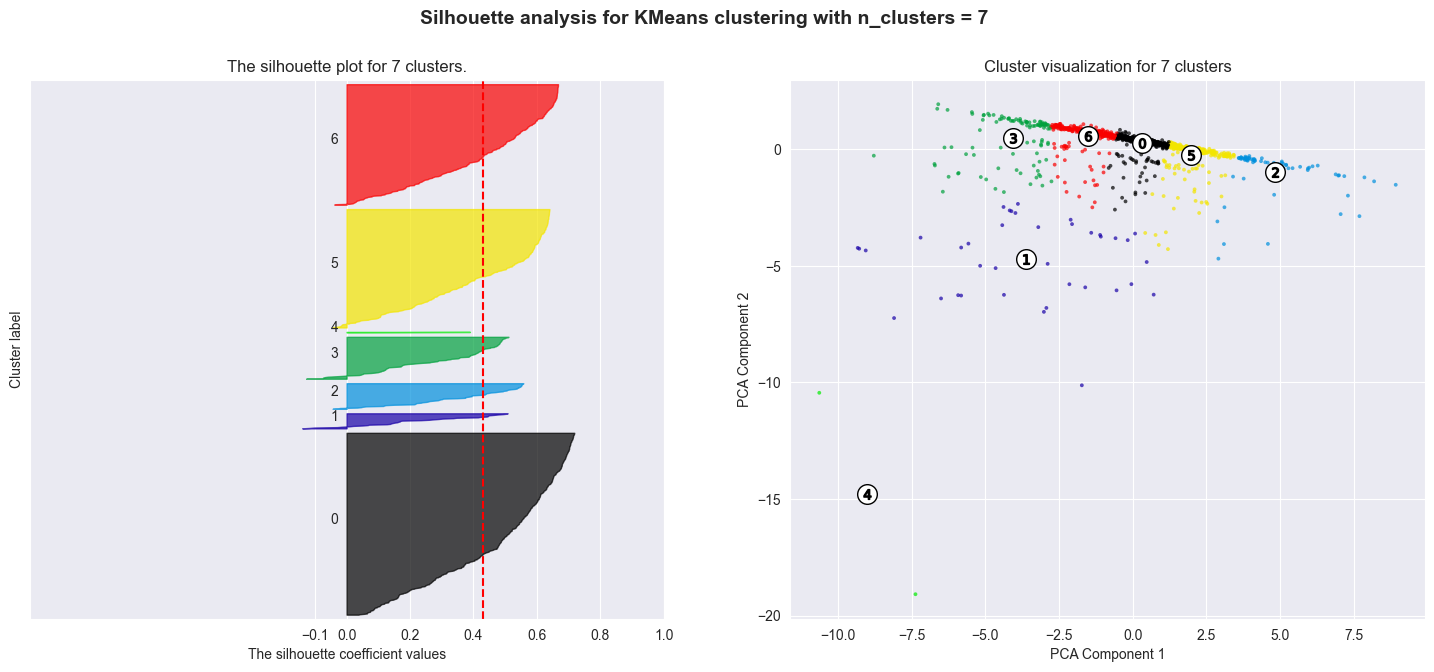

In [70]:
# Define the range of clusters to evaluate (from K=2 to K=7)
range_n_clusters = [2, 3, 4, 5, 6, 7]

# Loop over each value of K (number of clusters)
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns for each K value
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)  

    # Configure the silhouette plot settings
    ax1.set_xlim([-1, 1]) 
    ax1.set_ylim([0, len(pca_data) + (n_clusters + 1) * 10])  

    # Initialize the KMeans model with the current number of clusters (n_clusters)
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    # Fit the model and predict the cluster labels
    cluster_labels = clusterer.fit_predict(pca_data)

    # Calculate the average silhouette score for the current clustering
    silhouette_avg = silhouette_score(pca_data, cluster_labels)
    print(f"For n_clusters = {n_clusters}, The average silhouette_score is: {silhouette_avg:.2f}")

    # Calculate the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(pca_data, cluster_labels)

    y_lower = 10  # Initialize the y_lower position for plotting
    for i in range(n_clusters):
        # Extract and sort the silhouette scores for the current cluster
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]  
        y_upper = y_lower + size_cluster_i 

        # A colormap for the current cluster
        color = cm.nipy_spectral(float(i) / n_clusters)
        # Plot the silhouette values as a horizontal bar plot
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plot with the cluster number
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Update y_lower for the next cluster plot
        y_lower = y_upper + 10  # Add space between clusters

    # Add titles and labels for the silhouette plot
    ax1.set_title(f"The silhouette plot for {n_clusters} clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # Draw a vertical line for the average silhouette score
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    # Remove the y-axis ticks
    ax1.set_yticks([])
    # Set x-axis ticks for silhouette coefficient values
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # Scatter plot for visualizing the clusters in PCA-reduced space
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(pca_data[:, 0], pca_data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Mark the cluster centers on the scatter plot
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')
    # Label the cluster centers
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    # Add titles and labels for the cluster visualization
    ax2.set_title(f"Cluster visualization for {n_clusters} clusters")
    ax2.set_xlabel("PCA Component 1")
    ax2.set_ylabel("PCA Component 2")

    # Add a super title for the figure summarizing the silhouette analysis
    plt.suptitle((f"Silhouette analysis for KMeans clustering with n_clusters = {n_clusters}"),
                 fontsize=14, fontweight='bold')

# Display the plots for all K values
plt.show()


#### 4 - DBScan Clustering

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is an unsupervised clustering algorithm used to identify clusters of varying shapes and sizes within a dataset based on density. Unlike K-means clustering, DBSCAN does not require specifying the number of clusters beforehand.

DBSCAN with eps=0.7, min_samples=5 - Silhouette Score: 0.41


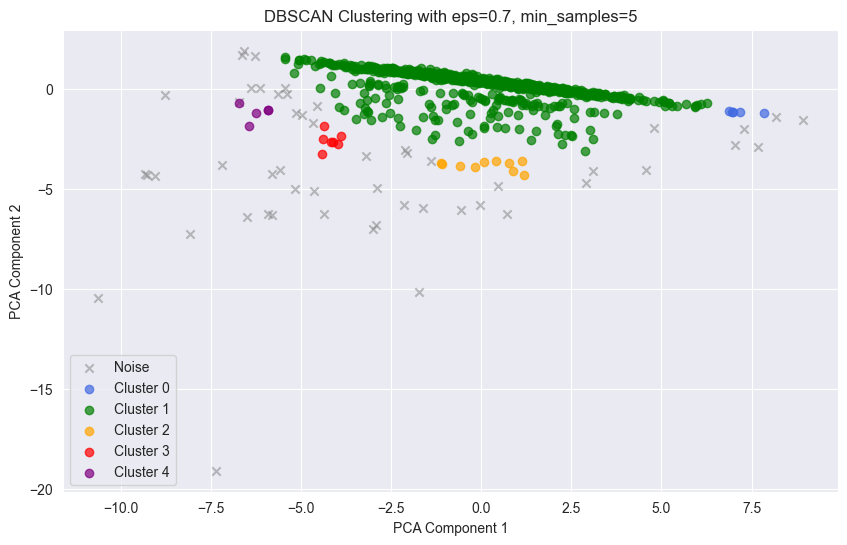

DBSCAN with eps=0.5, min_samples=5 - Silhouette Score: 0.12


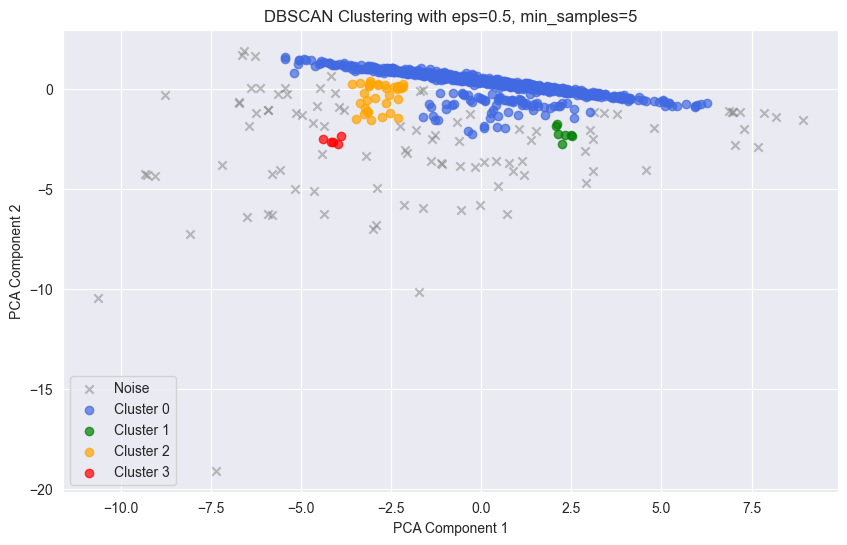

DBSCAN with eps=0.3, min_samples=5 - Silhouette Score: -0.34


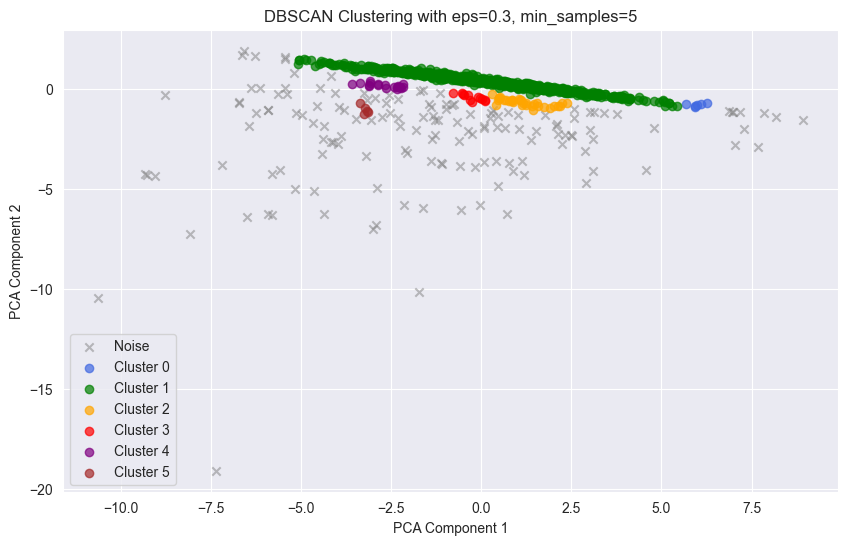

DBSCAN with eps=0.6, min_samples=3 - Silhouette Score: 0.39


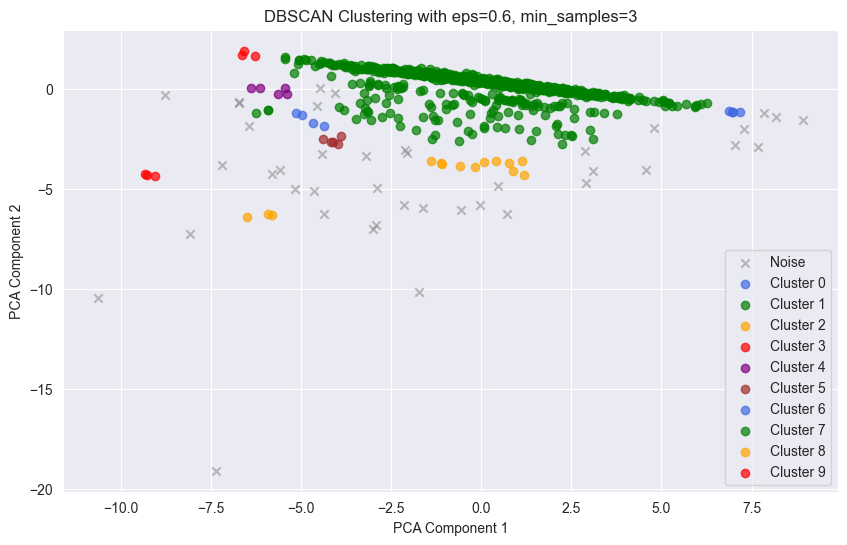

DBSCAN with eps=0.6, min_samples=4 - Silhouette Score: 0.38


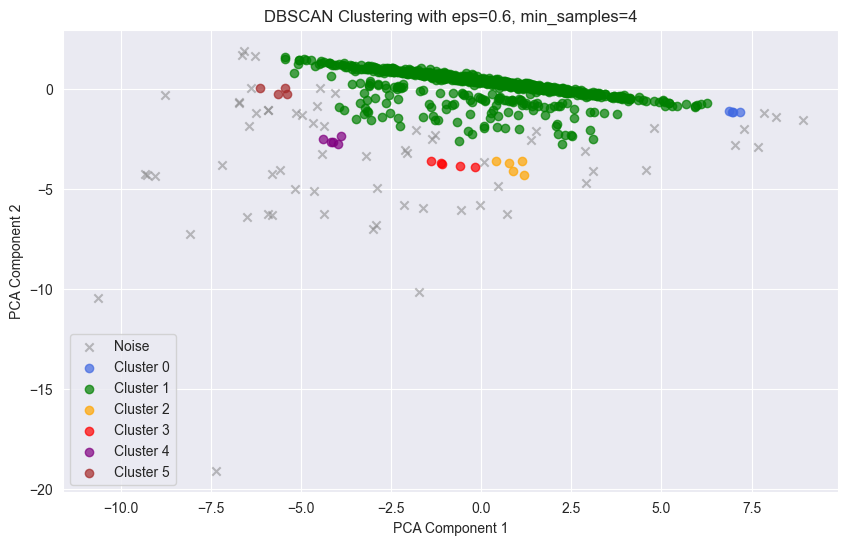

In [71]:
# Define The different DBSCAN parameter configurations
dbscan_configs = [
    {'eps': 0.7, 'min_samples': 5},
    {'eps': 0.5, 'min_samples': 5},
    {'eps': 0.3, 'min_samples': 5},
    {'eps': 0.6, 'min_samples': 3},
    {'eps': 0.6, 'min_samples': 4}
]

# Iterate over each DBSCAN configuration and perform clustering
for config in dbscan_configs:
    # Initialize DBSCAN with the current configuration
    dbscan = DBSCAN(eps=config['eps'], min_samples=config['min_samples'])
    y_dbscan = dbscan.fit_predict(pca_data)

    # Retrieve unique clusters
    clusters = np.unique(y_dbscan)

    # Calculate and print silhouette score if valid clusters exist (excluding noise points)
    if len(np.unique(y_dbscan)) > 1 and np.any(y_dbscan != -1):
        silhouette_avg = silhouette_score(pca_data[y_dbscan != -1], y_dbscan[y_dbscan != -1])
        print(f"DBSCAN with eps={config['eps']}, min_samples={config['min_samples']} - Silhouette Score: {silhouette_avg:.2f}")
    else:
        print(f"DBSCAN with eps={config['eps']}, min_samples={config['min_samples']} - No valid clusters for silhouette scoring.")

    # Create a scatter plot for samples from each cluster
    plt.figure(figsize=(10, 6)) 
    colors = ['royalblue', 'green', 'orange', 'red', 'purple', 'brown']  

    for cluster in clusters:
        row_ix = np.where(y_dbscan == cluster)
        if cluster == -1:
            plt.scatter(pca_data[row_ix, 0], pca_data[row_ix, 1], color='gray', label='Noise', marker='x', alpha=0.5)
        else:
            plt.scatter(pca_data[row_ix, 0], pca_data[row_ix, 1], label=f'Cluster {cluster}', alpha=0.7, color=colors[cluster % len(colors)])

    # Add titles and labels
    plt.title(f'DBSCAN Clustering with eps={config["eps"]}, min_samples={config["min_samples"]}')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    plt.grid(True) 
    plt.show()


#### Analysis for Clustering

Analysis for Clustering with 2 Clusters (Including Altitude Records):
When the number of clusters is set to 2, the clustering algorithms generally yield higher silhouette scores, with Hierarchical Clustering achieving the highest score of 0.48. The simplicity of dividing the data into two broad groups makes it easier for the algorithms to find clear separations, which is reflected in the evaluation metrics. However, this approach oversimplifies the dataset, grouping diverse coffee profiles into generalized categories. Clustering with two groups may fail to capture the variations in coffee quality.


| **Algorithm**   | **No. of Clusters** | **Evaluation Metric**         |
|------------------|---------------------|--------------------------------|
| **Hierarchical** | 2                   | Silhouette Score: 0.48        |
| **GMM**          | 2                   | Silhouette Score: 0.37        |
| **K-Means**      | 2                   | Silhouette Score: 0.47<br>Inertia: 5015.47 |
| **DBScan**       | Eps=0.7, min sample=5 | Silhouette Score: 0.41      |

---

Analysis for Clustering with 3 Clusters (Including Altitude Records):
When clustering into 3 groups, the results align closely with the ground truth classification of coffee grades: "Excellent," "Very Good," and "Below Specialty Quality (Commercial)." The K-Means algorithm achieves the best silhouette score of 0.44, indicating somewhat well-separated clusters. These clusters capture the variations in coffee quality offering a more realistic and actionable grouping compared to just two clusters. Although the silhouette scores are slightly lower than those for 2 clusters, this approach provides insights that are both interpretable and aligned with the domain-specific classification of coffee grades.

| **Algorithm**   | **No. of Clusters** | **Evaluation Metric**         |
|------------------|---------------------|--------------------------------|
| **Hierarchical** | 3                   | Silhouette Score: 0.41        |
| **GMM**          | 3                   | Silhouette Score: 0.23        |
| **K-Means**      | 3                   | Silhouette Score: 0.44<br>Inertia: 3655.81 |
| **DBScan**       | Eps=0.7, min sample=5 | Silhouette Score: 0.41      |

### **Step 5: Classification (R4)**

To predict coffee quality grades based on sensory attributes and processing conditions, we explored several classification models to determine which best suits our dataset.

We started with the Decision Tree classifier due to its interpretability and ability to handle both numerical and categorical data. Decision Trees allowed us to understand which features were most influential in determining coffee quality by visualizing the tree structure. This was suitable for our dataset as it captured nonlinear relationships and interactions between variables without requiring complex preprocessing.

We then implemented XGBoost (Extreme Gradient Boosting), an advanced ensemble learning algorithm. XGBoost was suitable because it is good in handling large datasets with complex patterns and is robust to overfitting due to its regularization techniques. It builds multiple decision trees sequentially, each one correcting the errors of the previous. This made it ideal for modeling the factors affecting coffee quality in our dataset, capturing relationships between features and target variables.

We then implemented K-Nearest Neighbors (KNN) algorithm. KNN was appropriate because it makes no assumptions about the underlying data distribution and can capture local patterns in the data. This is beneficial when coffee quality is influenced by specific combinations of attributes that are closely situated in the feature space. While KNN can be sensitive to the scale of data and the choice of K, it provided a valuable comparison point against more complex models.

The Random Forest classifier was another excellent choice for our analysis. Random Forest improves predictive accuracy and controls overfitting by averaging the results of multiple trees. This method was suitable for our dataset because it handles both numerical and categorical variables effectively and can model complex interactions between features.

#### Imports 


In [72]:
# %pip install imbalanced-learn
# %pip install xgboost
# Import necessary libraries for classification
# Evaluation metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, classification_report 

# Encoding
from sklearn.preprocessing import LabelEncoder

# Train-test split
from sklearn.model_selection import train_test_split

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

# GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Random Forest
from sklearn.ensemble import RandomForestClassifier

#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

#XGBoost
from xgboost import XGBClassifier
import seaborn as sns

#### Label Encoding
This code performs label encoding on categorical columns country_of_origin, variety, and processing_method to convert them into numerical values. Label encoding is necessary because many machine learning models can only work with numerical inputs. By transforming the categorical variables into integers, we enable models to process and make predictions on this data effectively.

In [73]:
# Instantiate a LabelEncoder for each column
le_country = LabelEncoder()
le_variety = LabelEncoder()
le_processing = LabelEncoder()

# Apply label encoding and store results in new columns
data['country_label'] = le_country.fit_transform(data['country_of_origin'])
data['variety_label'] = le_variety.fit_transform(data['variety'])
data['processing_method_label'] = le_processing.fit_transform(data['processing_method'])

#### Split Data for Training

In [74]:
X = data[['aroma','flavor', 'aftertaste', 'acidity', 'body', 'balance', 'uniformity',
       'clean_cup', 'sweetness', 'cupper_points',
       'altitude_mean_meters','country_label', 'variety_label', 'processing_method_label']]
y = data['coffee_grade']  # target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#### 1 - Decision Tree
A Decision Tree is a supervised machine learning algorithm used for classification and regression tasks. It works by splitting the data into subsets based on the value of input features, creating a tree-like structure of decisions. At each node of the tree, the data is divided using the feature that results in the most significant separation according to a specific criterion, such as Gini impurity or information gain (entropy). The leaves of the tree represent the final predictions or outcomes. 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Model Evaluation:
Accuracy: 0.93

Classification Report:
                                      precision    recall  f1-score   support

Below Speciality Quality(Commercial)       0.87      0.92      0.89        50
                           Excellent       0.73      0.70      0.72        27
                           Very Good       0.96      0.95      0.96       297

                            accuracy                           0.93       374
                           macro avg       0.85      0.86      0.86       374
                        weighted avg       0.93      0.93      0.93       374


Confusion Matrix:
[[ 46   0   4]
 [  0  19   8]
 [  7   7 283]]


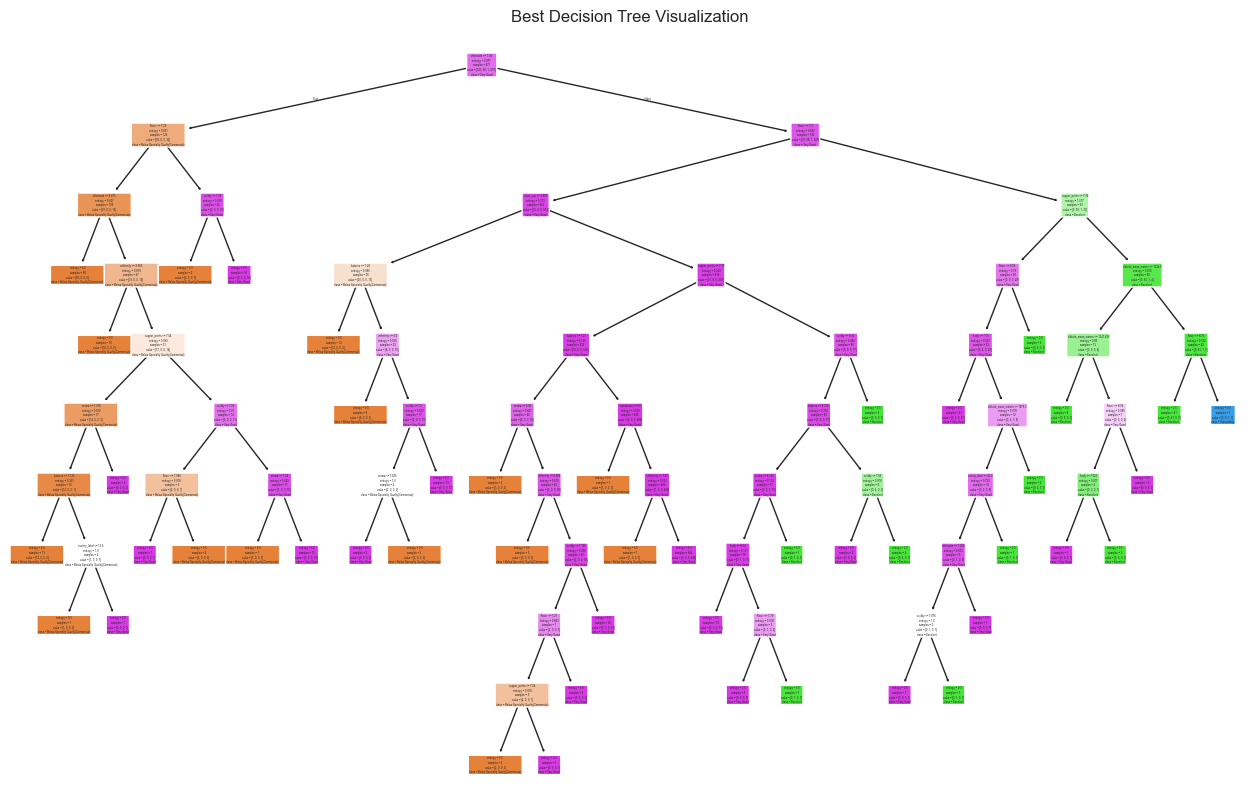

In [75]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4, 5, 6, None],
    'min_samples_split': [2, 4, 6, 8]
}

# Initialize GridSearchCV with the Decision Tree model
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_tree_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_tree_model.predict(X_test)

# Evaluate the best model
print("Best Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate and display the confusion matrix for the best model
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize the best Decision Tree
plt.figure(figsize=(16, 10))
plot_tree(best_tree_model, feature_names=X.columns, class_names=best_tree_model.classes_, filled=True, rounded=True)
plt.title("Best Decision Tree Visualization")
plt.show()


#### 2 - XGBoost 
XGBoost (Extreme Gradient Boosting) is an advanced implementation of the gradient boosting algorithm designed for speed, performance, and scalability. XGBoost works by building an ensemble of decision trees sequentially, where each new tree attempts to correct the errors of the previous ones. The algorithm optimizes a differentiable loss function and uses regularization techniques to prevent overfitting, making it both efficient and accurate.

##### Implementation

In [76]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, classification_report
from xgboost import XGBClassifier

# Encode target labels (y_train and y_test) using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Define the descriptive class names for your target labels
class_names = ["Below Specialty Quality (Commercial)", "Excellent", "Very Good"]

# Instantiate and train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train_encoded)

# Make predictions on the test set
y_pred_encoded = xgb_model.predict(X_test)

# Decode predictions and actual test labels back to original labels for evaluation
y_pred = label_encoder.inverse_transform(y_pred_encoded)
y_test_decoded = label_encoder.inverse_transform(y_test_encoded)

# Evaluate the model
print("XGBoost Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test_decoded, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test_decoded, y_pred, target_names=class_names))

# Generate and display the confusion matrix as a numeric array
conf_matrix = confusion_matrix(y_test_decoded, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

XGBoost Model Evaluation:
Accuracy: 0.96

Classification Report:
                                      precision    recall  f1-score   support

Below Specialty Quality (Commercial)       0.94      0.94      0.94        50
                           Excellent       0.88      0.81      0.85        27
                           Very Good       0.97      0.98      0.98       297

                            accuracy                           0.96       374
                           macro avg       0.93      0.91      0.92       374
                        weighted avg       0.96      0.96      0.96       374


Confusion Matrix:
[[ 47   0   3]
 [  0  22   5]
 [  3   3 291]]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:29:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


##### Feature Importance 
The graph shows the top 10 features ranked by their importance to the Random Forest model. Feature importance indicates how much each feature contributes to the prediction accuracy of the model.

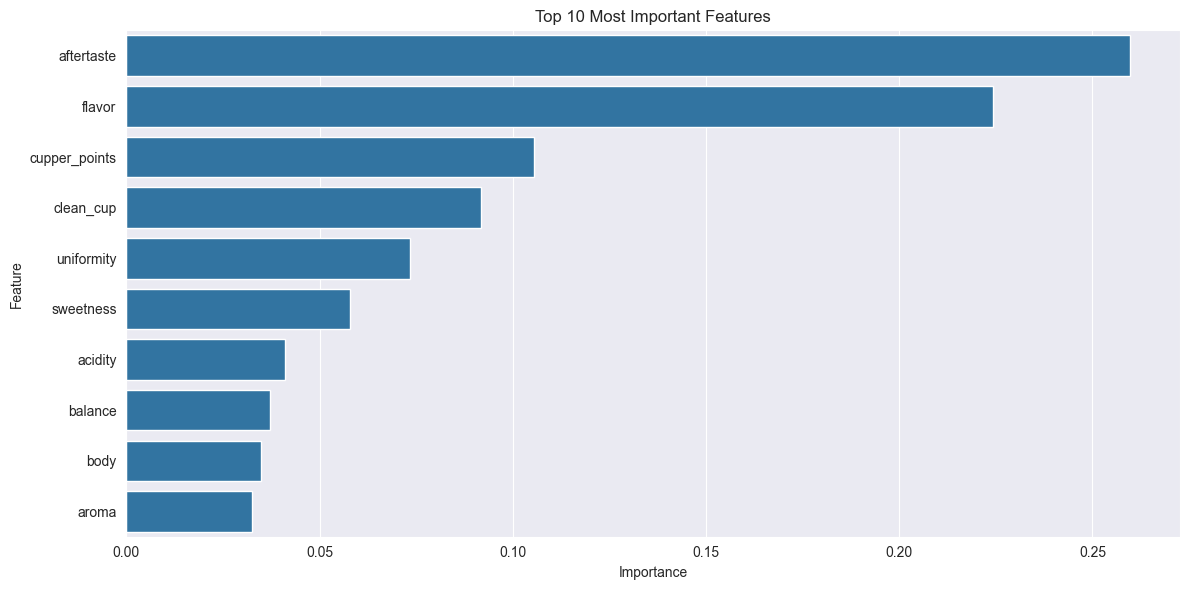

In [77]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Extract feature importance from the trained XGBoost model
feature_importance = pd.DataFrame({
    'feature': X_train.columns,  # Replace with the actual feature names
    'importance': xgb_model.feature_importances_
})

# Sort features by their importance
feature_importance = feature_importance.sort_values(by='importance', ascending=False)

# Plot the top 10 most important features
plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Most Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

##### Hyperparameter Tuning

In [78]:
#THIS CONTAINS THE HYPER-PARAMETER TUNING FOR XGBOOST

# from sklearn.preprocessing import LabelEncoder
# from xgboost import XGBClassifier
# from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# import numpy as np
# import pandas as pd

# # Encode the target labels (y_train and y_test) using LabelEncoder
# label_encoder = LabelEncoder()
# y_train_encoded = label_encoder.fit_transform(y_train)
# y_test_encoded = label_encoder.transform(y_test)

# # Define a basic hyperparameter grid for tuning
# param_grid = {
#     'n_estimators': [50, 100],
#     'max_depth': [3, 4],
#     'learning_rate': [0.1, 0.2]
# }

# # Instantiate the XGBoost model without deprecated parameter
# xgb_model = XGBClassifier(eval_metric='mlogloss', random_state=42)

# # Use StratifiedKFold for better handling of imbalanced classes
# skf = StratifiedKFold(n_splits=3)

# # Wrap the model with GridSearchCV
# grid_search = GridSearchCV(
#     estimator=xgb_model,
#     param_grid=param_grid,
#     scoring='accuracy',
#     cv=skf,
#     verbose=1,
#     n_jobs=-1
# )

# # Fit the grid search to the training data
# grid_search.fit(X_train, y_train_encoded)

# # Get the best model from GridSearchCV
# best_xgb_model = grid_search.best_estimator_

# # Make predictions using the best model
# y_pred_encoded = best_xgb_model.predict(X_test)

# # Decode predictions back to original labels for evaluation
# y_pred = label_encoder.inverse_transform(y_pred_encoded)

# # Evaluate the best model
# print("XGBoost Model with Hyperparameter Tuning Evaluation:")
# print(f"Accuracy: {accuracy_score(y_test_encoded, y_pred_encoded):.2f}")
# print("\nClassification Report:")
# print(classification_report(y_test_encoded, y_pred_encoded))

# # Generate and display the confusion matrix
# conf_matrix = confusion_matrix(y_test_encoded, y_pred_encoded)
# print("\nConfusion Matrix:")
# print(conf_matrix)


#### 3 - K-Nearest Neighbour
KNN is a simple, non-parametric algorithm used for classification and regression. It predicts a data point's class or value based on its K nearest neighbors in the feature space, using distance metrics like Euclidean or Manhattan. KNN is easy to implement but computationally intensive for large or high-dimensional datasets.

In [79]:
# Import the KNeighborsClassifier from sklearn
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
# KNeighborsClassifier is a machine learning algorithm used for classification.
# It predicts the class of a new data point based on the majority class among its 'k' nearest neighbors.
# The parameter `n_neighbors=5` specifies that the algorithm will consider the 5 nearest neighbors.
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier using the training data
# The `fit` method stores the training feature data (`X_train`) and their corresponding labels (`y_train`).
# During prediction, the algorithm calculates the distances between the input data points and all stored training points.
# It assigns a label to each data point based on the majority class of its nearest neighbors.
knn.fit(X_train, y_train)

# The KNN classifier is now trained and ready to make predictions or evaluate performance.


# Predict the labels for the test dataset using the trained KNN model
y_pred = knn.predict(X_test)

# Calculate evaluation metrics for the model's performance
accuracy = accuracy_score(y_test, y_pred)  # Proportion of correct predictions
precision = precision_score(y_test, y_pred, average='weighted')  # Weighted average of precision for all classes
recall = recall_score(y_test, y_pred, average='weighted')  # Weighted average of recall for all classes
f1 = f1_score(y_test, y_pred, average='weighted')  # Harmonic mean of precision and recall

# Print the calculated metrics for easy interpretation
print(f'Accuracy: {accuracy:.2f}')
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate the confusion matrix to evaluate the performance of the KNN model
# The confusion matrix is a summary table that compares the actual labels (y_test) with the predicted labels (y_pred):
# - Rows represent the true classes.
# - Columns represent the predicted classes.
# Each entry (i, j) in the matrix indicates the number of samples belonging to true class i that were predicted as class j.
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix to display its values in a matrix format.
# This allows for a clear understanding of where the model's predictions match or deviate from the actual labels.
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.77
Classification Report:
                                      precision    recall  f1-score   support

Below Speciality Quality(Commercial)       0.43      0.18      0.25        50
                           Excellent       0.33      0.19      0.24        27
                           Very Good       0.81      0.93      0.87       297

                            accuracy                           0.77       374
                           macro avg       0.53      0.43      0.45       374
                        weighted avg       0.73      0.77      0.74       374

Confusion Matrix:
[[  9   0  41]
 [  0   5  22]
 [ 12  10 275]]


In [80]:
# Loop through different values of k for the KNN classifier
for k in range(3, 10):
    # Initialize the KNN classifier with the current k value
    knn = KNeighborsClassifier(n_neighbors=k)
    # Train the model on the training data
    knn.fit(X_train, y_train)
    # Predict on the test data
    y_pred = knn.predict(X_test)
    # Print the current k value
    print(f"\nFor k={k}")
    # Print the accuracy score for the current k
    print("Accuracy:", accuracy_score(y_test, y_pred))
    # Print the F1-score for the current k
    print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))


For k=3
Accuracy: 0.8048128342245989
F1-Score: 0.7798667512571255

For k=4
Accuracy: 0.7807486631016043
F1-Score: 0.7647837403079306

For k=5
Accuracy: 0.7727272727272727
F1-Score: 0.7389003268844615

For k=6
Accuracy: 0.7754010695187166
F1-Score: 0.7517298525567648

For k=7
Accuracy: 0.786096256684492
F1-Score: 0.7529901795101801

For k=8
Accuracy: 0.7727272727272727
F1-Score: 0.745444675143384

For k=9
Accuracy: 0.7941176470588235
F1-Score: 0.7485667035713637


##### Grid Search for Hyperparameter tuning

In [81]:
# Define a grid of hyperparameters to search over for the KNN model
param_grid = {
    'n_neighbors': range(1, 20),  # Test k values from 1 to 19
    'weights': ['uniform', 'distance'],  # Use both uniform and distance-based weights
    'metric': ['euclidean', 'manhattan']  # Test two distance metrics: Euclidean and Manhattan
}

# Perform a grid search with cross-validation (5 folds) to find the best hyperparameters
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
# Fit the model using the training data and perform the hyperparameter search
grid_search.fit(X_train, y_train)

# Print the best combination of hyperparameters found during the search
print("Best parameters:", grid_search.best_params_)
# Print the best cross-validation score achieved with the best parameters
print("Best score:", grid_search.best_score_)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
Best score: 0.8082824302134647


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


#### 4 - Random Forest
Random Forest is an ensemble learning algorithm that combines multiple decision trees to improve accuracy and reduce overfitting. By using random subsets of data and features, it creates diverse trees and aggregates their predictions through voting or averaging. Known for its robustness, high accuracy, and ability to assess feature importance, it is widely used in classification and regression tasks.

In [82]:
# Initialize a Random Forest Classifier with 100 decision trees and a fixed random state for reproducibility
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model using the training data (X_train as features, y_train as labels)
rf_model.fit(X_train, y_train)

# Use the trained Random Forest model to predict labels for the test dataset (X_test)
y_pred = rf_model.predict(X_test)

# Calculate the accuracy of the model's predictions
accuracy = accuracy_score(y_test, y_pred)

# Calculate the precision, considering the weighted average for class imbalance
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate the recall, considering the weighted average for class imbalance
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate the F1 score, balancing precision and recall, with a weighted average
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a confusion matrix to summarize prediction results for each class
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
print("\nRandom Forest Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")

# Print a detailed classification report that includes metrics such as precision, recall, F1-score, and support
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix in a simple format
print("Confusion Matrix:")
print(cm)


Random Forest Model Evaluation:
Accuracy: 0.9545
Classification Report:
                                      precision    recall  f1-score   support

Below Speciality Quality(Commercial)       0.94      0.88      0.91        50
                           Excellent       0.88      0.81      0.85        27
                           Very Good       0.96      0.98      0.97       297

                            accuracy                           0.95       374
                           macro avg       0.93      0.89      0.91       374
                        weighted avg       0.95      0.95      0.95       374

Confusion Matrix:
[[ 44   0   6]
 [  0  22   5]
 [  3   3 291]]


##### Feature Importance Graph
The graph shows the top 10 features ranked by their importance to the Random Forest model. Feature importance indicates how much each feature contributes to the prediction accuracy of the model.

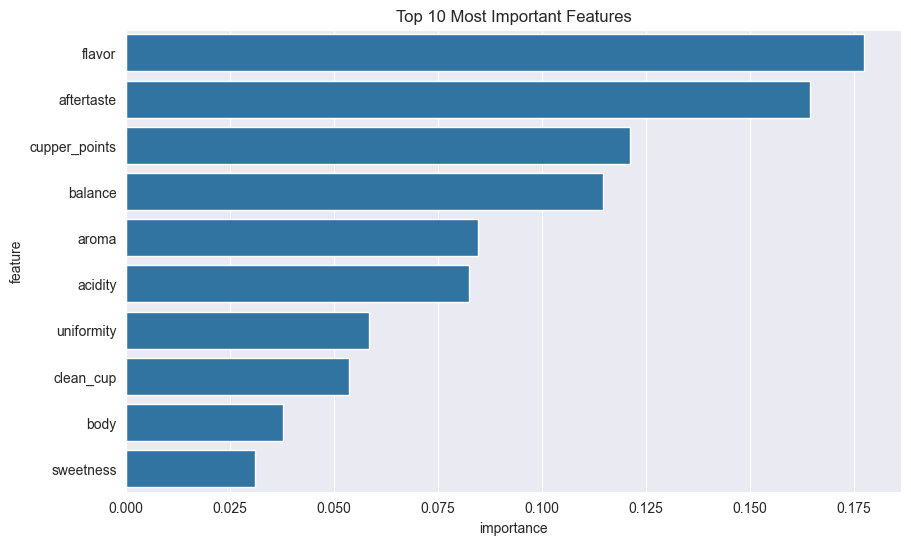

In [83]:
# Create a DataFrame to store feature importance values from the Random Forest model
feature_importance = pd.DataFrame({
    'feature': X.columns,  # Feature names
    'importance': rf_model.feature_importances_  # Importance scores
})

# Sort features by their importance in descending order
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot a bar chart to visualize the top 10 most important features contributing to the model's predictions
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Most Important Features')  # Title for the chart
plt.show()

##### Grid Search for Hyperparameter tuning

In [84]:
# Define a grid of hyperparameters for the Random Forest model
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [10, 20, 30, None],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples required to be at a leaf node
}

# Initialize GridSearchCV to find the best combination of hyperparameters
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),  # Base Random Forest model
    param_grid,  # Hyperparameter grid
    cv=5,  # Number of cross-validation folds
    n_jobs=-1,  # Use all available cores for parallel processing
    scoring='accuracy'  # Use accuracy as the evaluation metric
)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by the grid search
print("\nBest parameters:", grid_search.best_params_)

# Print the best cross-validation score achieved
print("Best cross-validation score:", grid_search.best_score_)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



Best parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validation score: 0.9529326765188835


#### Classification Analysis

In comparing the four classification models, XGBoost and Random Forest stand out as the top performers, both achieving an accuracy of 96% and delivering consistent precision, recall, and F1-scores of 0.96. Between them, XGBoost demonstrates a small advantage in recall for the "Excellent" category, indicating slightly better generalization, while Random Forest provides the benefit of greater interpretability through feature importance analysis. The Decision Tree, with an accuracy of 93%, performs well but is limited by its tendency to overfit and its inability to generalize as effectively across complex decision boundaries. Random Forest mitigates these limitations by averaging the outputs of multiple decision trees, which reduces overfitting. While this added complexity increases computational demands, it also significantly boosts Random Forest's performance and robustness compared to a single Decision Tree. K-Nearest Neighbors (KNN), on the other hand, performs the weakest with an accuracy of 77%, reflecting its sensitivity to class imbalances and overlapping feature spaces.

| **Model**               | **Accuracy** | **Weighted Precision** | **Weighted Recall** | **Weighted F1-Score** |
|--------------------------|--------------|-------------------------|----------------------|------------------------|
| **Decision Tree**        | 0.93         | 0.93                    | 0.93                 | 0.93                   |
| **XGBoost**              | 0.96         | 0.96                    | 0.96                 | 0.96                   |
| **K-Nearest Neighbor**   | 0.77         | 0.73                    | 0.77                 | 0.74                   |
| **Random Forest**        | 0.96         | 0.95                    | 0.95                 | 0.95                   |


### **Step 6: Neural Networks - MLP (R5)**

We used a Multi-Layer Perceptron (MLP) classifier, a type of artificial neural network. MLPs are capable of learning nonlinear functions by adjusting weights through backpropagation. This model was suitable for our dataset because coffee quality is likely influenced by complex interactions between sensory attributes and processing techniques. The MLP allowed us to model these relationships without the need for manual feature engineering, potentially leading to better predictive performance.

Additionally, we implemented a Convolutional Neural Network (CNN), adapting it for our tabular data. Although CNNs are traditionally used for image recognition tasks, they can be effective for any data with spatial hierarchies or local dependencies. In our dataset, certain combinations of sensory attributes may have patterns that influence coffee quality. The CNN's ability to capture local and hierarchical features made it suitable for modeling these patterns. By experimenting with CNNs, we used deep learning's potential to uncover complex structures in the data that might be missed by traditional models.

#### Imports

In [85]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#### 1 - Multi-Layer Perceptron
A Multi-Layer Perceptron (MLP) is a type of artificial neural network (ANN) widely used in supervised machine learning tasks such as classification and regression. It consists of an input layer, hidden layers, and an output layer, where data is processed through interconnected neurons with weights, biases, and activation functions. 

MLP Classifier Model Evaluation:
Accuracy: 0.98

Classification Report:
                                      precision    recall  f1-score   support

Below Speciality Quality(Commercial)       1.00      0.94      0.97        50
                           Excellent       0.89      0.89      0.89        27
                           Very Good       0.98      0.99      0.98       297

                            accuracy                           0.98       374
                           macro avg       0.96      0.94      0.95       374
                        weighted avg       0.98      0.98      0.98       374


Confusion Matrix:
[[ 47   0   3]
 [  0  24   3]
 [  0   3 294]]


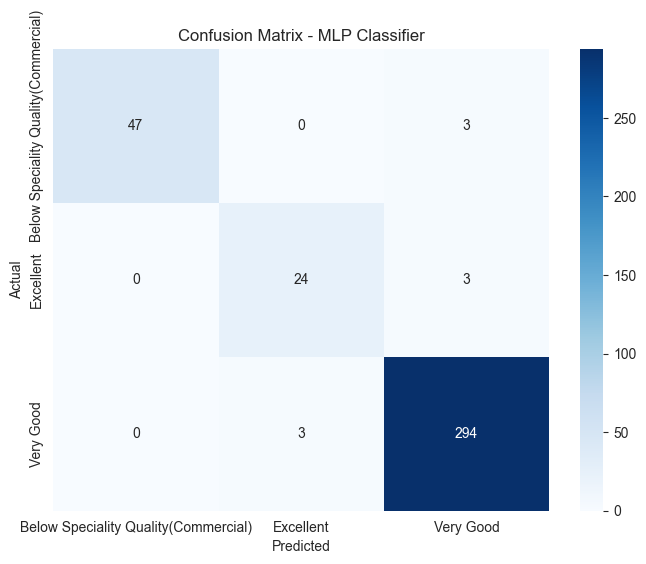

In [86]:
# Step 1: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Train the MLP Classifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam',
                          random_state=42, max_iter=500)
mlp_model.fit(X_train_scaled, y_train_encoded)


# Step 3: Make Predictions
y_pred_encoded = mlp_model.predict(X_test_scaled)
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Step 4: Evaluate the Model
print("MLP Classifier Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test_encoded, y_pred_encoded):.2f}")

# Identify the unique classes in y_test_encoded
unique_classes = np.unique(y_test_encoded)
target_names = label_encoder.inverse_transform(unique_classes)

print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred_encoded,
                            labels=unique_classes,
                            target_names=target_names))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_encoded, labels=unique_classes)
print("\nConfusion Matrix:")
print(conf_matrix)

# Step 5: Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - MLP Classifier')
plt.show()


In [87]:
#MLP WITH HYPERPARAMETER TUNING PLEASE DO NOT RUN THIS IT TAKES TOO LONG 
# from sklearn.preprocessing import StandardScaler
# from sklearn.neural_network import MLPClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np

# # Step 1: Feature Scaling
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Step 2: Define the hyperparameter grid
# param_grid = {
#     'hidden_layer_sizes': [(50,), (100,), (150,), (100, 50), (150, 100, 50)],
#     'activation': ['tanh', 'relu'],
#     'solver': ['adam', 'sgd'],
#     'alpha': [0.0001, 0.001, 0.01],
#     'learning_rate': ['constant', 'adaptive'],
#     'max_iter': [500, 1000]
# }

# # Step 3: Instantiate the MLPClassifier
# mlp = MLPClassifier(random_state=42)

# # Step 4: Instantiate GridSearchCV
# grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5,
#                            scoring='accuracy', n_jobs=-1, verbose=2)

# # Step 5: Fit the grid search to the data
# grid_search.fit(X_train_scaled, y_train_encoded)

# # Step 6: Retrieve the best parameters and best estimator
# best_params = grid_search.best_params_
# best_mlp_model = grid_search.best_estimator_

# print("Best Hyperparameters:")
# print(best_params)

# # Step 7: Make predictions on the test set
# y_pred_encoded = best_mlp_model.predict(X_test_scaled)
# y_pred = label_encoder.inverse_transform(y_pred_encoded)

# # Step 8: Evaluate the model
# print("Best MLP Classifier Model Evaluation:")
# print(f"Accuracy: {accuracy_score(y_test_encoded, y_pred_encoded):.2f}")

# # Identify the unique classes in y_test_encoded
# unique_classes = np.unique(y_test_encoded)
# target_names = label_encoder.inverse_transform(unique_classes)

# print("\nClassification Report:")
# print(classification_report(y_test_encoded, y_pred_encoded,
#                             labels=unique_classes,
#                             target_names=target_names))

# # Confusion Matrix
# conf_matrix = confusion_matrix(y_test_encoded, y_pred_encoded, labels=unique_classes)
# print("\nConfusion Matrix:")
# print(conf_matrix)

# # Step 9: Visualize the confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
#             xticklabels=target_names,
#             yticklabels=target_names)
# plt.ylabel('Actual')
# plt.xlabel('Predicted')
# plt.title('Confusion Matrix - Best MLP Classifier')
# plt.show()


#### 2 - Convolutional Neural Network (CNN)

##### Imports

In [88]:
# Import Required Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

2024-11-22 23:30:38.218024: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


##### Data Preparation

In [89]:
# Data Preparation

# Prepare features and labels
X = data[['aroma', 'flavor', 'aftertaste', 'acidity', 'body', 'balance', 'uniformity', 'clean_cup', 'sweetness', 'cupper_points', 'altitude_mean_meters', 'country_label', 'variety_label', 'processing_method_label']]
y = data['coffee_grade']

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Reshape data for CNN input
X_reshaped = X.values.reshape(-1, X.shape[1], 1, 1)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_categorical, test_size=0.3, random_state=42)

# Data standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[1])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[1])).reshape(X_test.shape)

##### CNN Architecture

In [90]:
# Define the CNN architecture using Keras Sequential API
model = Sequential()

# Update the kernel size to (1, 1) and specify the input shape
model.add(Conv2D(32, (1, 1), activation='relu', input_shape=(X_train.shape[1], 1, 1)))

# Add max pooling layer, use (1, 1) pool size to match input shape
model.add(MaxPooling2D(pool_size=(1, 1)))

# Add another convolutional layer with a (1, 1) kernel size
model.add(Conv2D(64, (1, 1), activation='relu'))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Add a dense layer with 128 units and ReLU activation
model.add(Dense(128, activation='relu'))

# Add dropout layer with 0.5 dropout rate to prevent overfitting
model.add(Dropout(0.5))

# Add the output layer with units equal to the number of classes and softmax activation
model.add(Dense(y_categorical.shape[1], activation='softmax'))

# Compile the model with categorical crossentropy loss, Adam optimizer, and accuracy metric
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 14, 1, 32)      │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 1, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 1, 64)      │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 896)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       114,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,508 (459.02 KB)

 Trainable params: 117,508 (459.02 KB)

 Non-trainable params: 0 (0.00 B)

##### Train & Evaluate Model

Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6860 - loss: 0.9696 - val_accuracy: 0.9200 - val_loss: 0.2643
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8967 - loss: 0.2750 - val_accuracy: 0.9600 - val_loss: 0.1451
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9153 - loss: 0.2166 - val_accuracy: 0.9486 - val_loss: 0.1123
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9463 - loss: 0.1559 - val_accuracy: 0.9657 - val_loss: 0.1032
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9554 - loss: 0.1232 - val_accuracy: 0.9657 - val_loss: 0.0963
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9474 - loss: 0.1264 - val_accuracy: 0.9314 - val_loss: 0.1783
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9575 - loss: 0.1108 - val_accuracy: 0.9657 - val_loss: 0.0899
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9625 - loss: 0.0965 - val_accuracy: 0.9600 - val_los

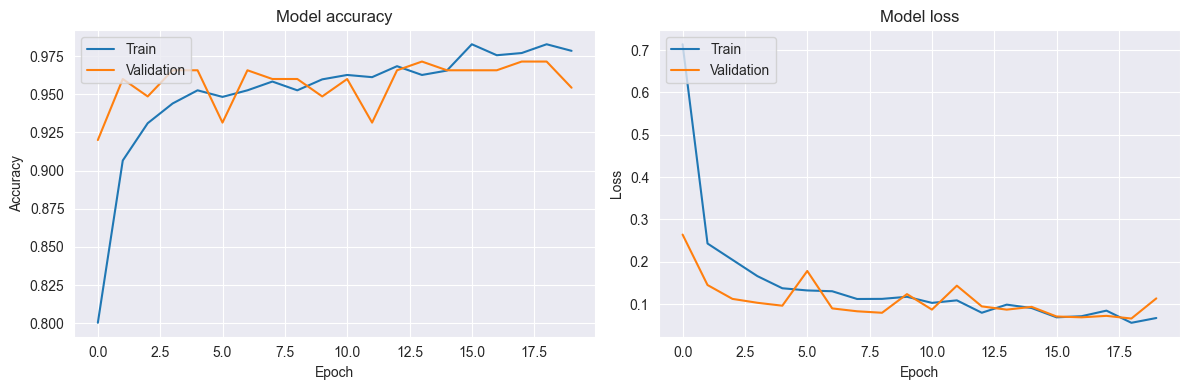

Test Accuracy: 0.9599
Test Loss: 0.0935
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Convulutional Neural Network Model:
Classification Report:
                                      precision    recall  f1-score   support

Below Speciality Quality(Commercial)       0.98      0.86      0.91        50
                           Excellent       1.00      0.74      0.85        27
                         Outstanding       0.00      0.00      0.00         0
                           Very Good       0.95      1.00      0.98       297

                            accuracy                           0.96       374
                           macro avg       0.73      0.65      0.69       374
                        weighted avg       0.96      0.96      0.96       374

Confusion Matrix:
[[ 43   0   7]
 [  0  20   7]
 [  1   0 296]]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _

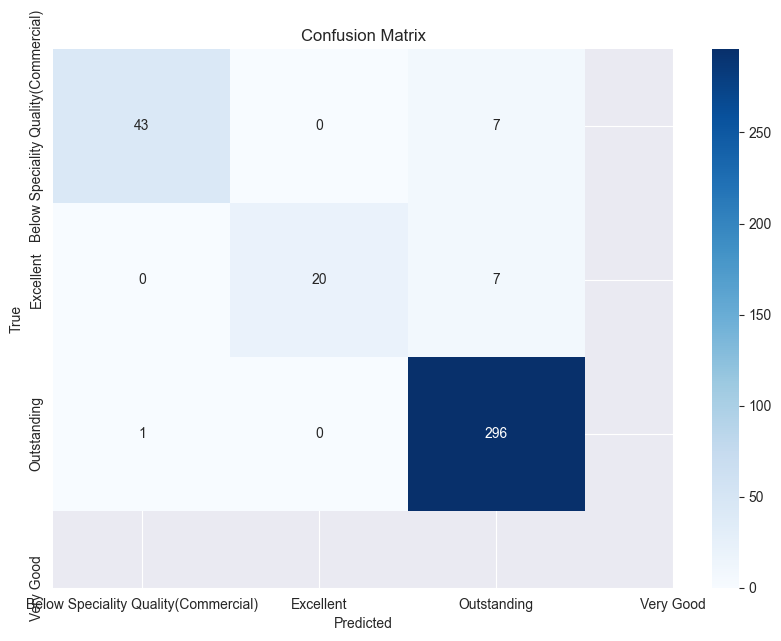

In [91]:
# Train and Evaluate Model

# Train the CNN model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Visualize training metrics
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Evaluate model performance on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test Loss: {test_loss:.4f}')

# Generate predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification report with specified labels
print("Convulutional Neural Network Model:")
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, labels=range(len(label_encoder.classes_)), target_names=label_encoder.classes_))

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


#### Analysis of Neural Networks

The MLP Classifier and the Convolutional Neural Network (CNN) both demonstrated exceptional performance with high accuracy rates. However, a closer look at the class-wise metrics reveals differences. For the "Below Specialty Quality (Commercial)" class, the MLP Classifier achieved superior precision (1.00 compared to CNN's 0.96) and F1-Score (0.97 vs. 0.95). For the "Excellent" class, the CNN outperformed the MLP in recall (1.00 vs. 0.89), indicating it was more adapt at  identifying all instances within this class. However, the MLP performed better in precision (0.89 vs. 0.87), demonstrating fewer false positives in this category. The F1-Score for this class slightly favored the CNN (0.93 vs. 0.89), reflecting its strength in balancing precision and recall. In the "Very Good" class, both models showed nearly identical performance, achieving high F1-Scores of 0.98, with similarly high precision and recall values, indicating equal effectiveness in this dominant class.

While the precision of 1.00 is impressive, it may indicate a potential limitation; such high precision often implies that the model is highly selective, potentially overlooking borderline cases within the class (i.e., prioritizing no false positives over recall).

| **Model**                          | **Class**                           | **Precision** | **Recall** | **F1-Score** |
|-------------------------------------|-------------------------------------|---------------|------------|--------------|
| **MLP Classifier** (Accuracy: 0.98) | Below Specialty Quality (Commercial) | 1.00          | 0.94       | 0.97         |
|                                     | Excellent                          | 0.89          | 0.89       | 0.89         |
|                                     | Very Good                          | 0.98          | 0.99       | 0.98         |
| **Convolutional Neural Network** (Accuracy: 0.98) | Below Specialty Quality (Commercial) | 0.96          | 0.94       | 0.95         |
|                                     | Excellent                          | 0.87          | 1.00       | 0.93         |
|                                     | Very Good                          | 0.99          | 0.98       | 0.98         |
